In [1]:
"""
1 · Repository skeleton

lightstorm/
├─ lightstorm/                 # importable package  (pip install -e .)
│  ├─ __init__.py
│  ├─ config.py                # StormConfig, EvalConfig
│  ├─ window_utils.py          # make_windows
│  ├─ feature_registry.py
│  ├─ features/
│  │   ├─ __init__.py
│  │   ├─ basic.py             # hilbert_peak, rms_db, ...
│  │   ├─ iso13.py
│  │   ├─ ae10.py
│  │   └─ iso16.py
│  ├─ extractor.py             # FeatureExtractor
│  ├─ synth/
│  │   ├─ __init__.py
│  │   └─ storm.py             # StormGenerator + helpers
│  ├─ detectors/
│  │   ├─ __init__.py
│  │   ├─ thresh_hilbert.py    # Hilbert baseline
│  │   ├─ ncd.py               # NcdDetector
│  │   ├─ iforest.py           # IsoForestModel
│  │   ├─ iforest_ext.py       # ExtendedIsoForest
│  │   ├─ cdae.py              # per‑station CDAE
│  │   └─ graph_cdae.py        # Graph‑CDAE demo
│  ├─ evaluation.py            # evaluate_windowed_model + pretty_metrics
│  └─ interpret/
│      └─ if_importance.py     # permutation‑importance helper
├─ notebooks/
│  ├─ 00_quick_demo.ipynb      # tiny demo orchestrating the pipeline
│  └─ 01_graph_cdae_demo.ipynb # optional GPU walk‑through
├─ tests/
│  └─ test_feature_shapes.py   # pytest – sanity checks
├─ docs/                       # MkDocs or Sphinx source
│  └─ index.md
├─ pyproject.toml              # build & dependencies
└─ README.md
Everything already written drops into these modules almost verbatim.

2 · Pasting guide (cell → module)
Notebook section	Paste into file	Required edits
StormConfig / EvalConfig	lightstorm/config.py	keep imports; add __all__
make_windows	lightstorm/window_utils.py	none
Registry + all feature cells	separate files in lightstorm/features/	replace from ... relative imports
FeatureExtractor	lightstorm/extractor.py	from .feature_registry import ...
StormGenerator & helpers	lightstorm/synth/storm.py	prefix internal imports (from ..window_utils import make_windows)
Hilbert threshold baseline	lightstorm/detectors/thresh_hilbert.py	accept StormBundle instead of globals
NcdDetector	lightstorm/detectors/ncd.py	same, plus from ..evaluation import evaluate_windowed_model
IsoForestModel	lightstorm/detectors/iforest.py	change FeatureExtractor import to relative
ExtendedIsoForest	lightstorm/detectors/iforest_ext.py	idem
CdaeModel	lightstorm/detectors/cdae.py	import make_windows from package
Graph‑CDAE demo	lightstorm/detectors/graph_cdae.py	move edge_index build into class or helper
evaluate_windowed_model + pretty metrics	lightstorm/evaluation.py	create helper pretty_metrics
Permutation‑importance utilities	lightstorm/interpret/if_importance.py	pass model instance, no globals

3 · Light‑touch code edits
Relative imports

python
Copy
from .window_utils import make_windows
from .features.iso16 import ISO16_NAMES
Global constants → module attributes
Move WIN, HOP, FS, … to config.py; import where needed:

python
Copy
from ..config import DEFAULT_WIN as WIN
Type annotations – add local imports (from __future__ import annotations)
if you hit circular‑reference warnings.

Edge‑index creation – wrap in a small function inside
graph_cdae.py so demo notebook calls build_fully_connected(S).

pretty_metrics – single helper in evaluation.py; every script
can from ..evaluation import pretty_metrics.

4 · Demo notebook (00_quick_demo.ipynb)
Minimal contents:

python
Copy
from lightstorm.config     import StormConfig
from lightstorm.synth      import storm
from lightstorm.detectors  import thresh_hilbert, iforest_ext
from lightstorm.evaluation import evaluate_windowed_model, pretty_metrics

# 1) generate synthetic data
cfg   = StormConfig()
bundle= storm.StormGenerator(cfg).generate()

# 2) run detector
det   = iforest_ext.ExtendedIsoForest()
det.fit(bundle.quantised, fs=cfg.fs)
hot   = det.predict(bundle.quantised, fs=cfg.fs)

# 3) evaluate
station, network, _ = evaluate_windowed_model(
    hot=hot,
    stroke_records=bundle.stroke_records,
    quantized=bundle.quantised,
    station_order=list(bundle.quantised),
    cfg=None)
print(pretty_metrics(network))
No more hidden globals.

5 · Documentation strategy
Sphinx – autodoc + napoleon will pull your expanded docstrings
automatically. Point the API section at lightstorm/.

MkDocs‑Material – easier for Markdown lovers; use
mkdocstrings[python] to render docstrings identically.

Add one how‑to page: “Add a new feature function in two lines – see
features/basic.py”.

6 · GitLab CI / pre‑commit hooks
pre‑commit – ruff, black, isort keep style uniform.

pytest – lightweight shape tests ensure later refactors don’t
break the IO contract. Example in tests/test_feature_shapes.py.

GitLab CI – stages: lint, test, build-docs, nb-examples
(execute demo notebooks with nbqa).

7 · Packaging (pyproject.toml excerpt)
toml
Copy
[project]
name = "lightstorm"
version = "0.1.0"
dependencies = [
    "numpy", "scipy", "pandas", "scikit-learn", "isotree",
    "torch", "torch-geometric", "tqdm", "matplotlib"
]

[project.optional-dependencies]
docs = ["sphinx", "furo", "mkdocstrings[python]"]
dev  = ["pytest", "ruff", "black", "isort", "nbqa"]

[build-system]
requires = ["setuptools>=64", "wheel"]
build-backend = "setuptools.build_meta"
Run:

bash
Copy
pip install -e .[dev,docs]
pre-commit install      # enforce style
pytest                  # quick unit checks
mkdocs serve            # live docs preview
8 · Migration checklist
 Copy/paste code into the indicated modules.

 Replace absolute imports with relative (from .. or from .).

 Move hard‑coded constants into config.py.

 Verify __all__ lists so from lightstorm import * stays clean.

 Execute 00_quick_demo.ipynb; expect identical metrics to the
monolithic notebook.

 Commit, push, watch GitLab CI turn green.

Following these steps yields a professional, pip‑installable, CI‑ready
code‑base with minimal churn—largely copy‑paste plus import tweaks—yet
sets the stage for documentation, unit tests and future expansion.


"""

'\n1\u202f·\u202fRepository skeleton\n\nlightstorm/\n├─ lightstorm/                 # importable package  (pip install -e .)\n│  ├─ __init__.py\n│  ├─ config.py                # StormConfig, EvalConfig\n│  ├─ window_utils.py          # make_windows\n│  ├─ feature_registry.py\n│  ├─ features/\n│  │   ├─ __init__.py\n│  │   ├─ basic.py             # hilbert_peak, rms_db, ...\n│  │   ├─ iso13.py\n│  │   ├─ ae10.py\n│  │   └─ iso16.py\n│  ├─ extractor.py             # FeatureExtractor\n│  ├─ synth/\n│  │   ├─ __init__.py\n│  │   └─ storm.py             # StormGenerator + helpers\n│  ├─ detectors/\n│  │   ├─ __init__.py\n│  │   ├─ thresh_hilbert.py    # Hilbert baseline\n│  │   ├─ ncd.py               # NcdDetector\n│  │   ├─ iforest.py           # IsoForestModel\n│  │   ├─ iforest_ext.py       # ExtendedIsoForest\n│  │   ├─ cdae.py              # per‑station CDAE\n│  │   └─ graph_cdae.py        # Graph‑CDAE demo\n│  ├─ evaluation.py            # evaluate_windowed_model + pretty_metrics\n│ 

In [3]:
# ======================================================================
# MODULE TARGET : lightning_sim/sim/generator.py
# ----------------------------------------------------------------------
# This notebook cell refactors the original
# “Lightning‑storm generator 2.4 – single‑RNG, fully reproducible”
# into a *reusable* StormGenerator class.
#
# Quick test inside the notebook:
# >>> cfg = StormConfig()          # accept defaults or tweak fields
# >>> gen = StormGenerator(cfg)
# >>> bundle = gen.generate()
# >>> bundle.df_wave.head()
#
# When you migrate to a package:
#   1. Move this code into lightning_sim/sim/generator.py
#   2. Delete the inline StormConfig definition and instead
#      `from lightning_sim.config import StormConfig`
#   3. Make sure scipy is in your requirements.
# ======================================================================

"""
===============================================================================
storm_synth.py  — Synthetic lightning‑storm data factory (UK English overview)
===============================================================================

Purpose of this cell
--------------------
Provide a **fully reproducible work‑bench** for generating multi‑station
lightning data: raw 14‑bit ADC traces plus stroke‑level ground‑truth
tables.  The output slots straight into the feature‑extraction toolkit
shown earlier and lets you stress‑test detection / localisation
algorithms at arbitrary *signal‑to‑noise ratio* (SNR) and *difficulty*
levels.

High‑level architecture
-----------------------
1. **`StormConfig`** – frozen `@dataclass` holding every tweakable
   knob, from `snr_db` and `difficulty` (1 – 9) to ADC word‑length.
   Changing a field creates an independent scenario yet the random
   seed guarantees bit‑identical runs across machines.

2. **`StormBundle`** – return container:
   * `quantised`    → dict of station name ↦ `np.int16` waveform
   * `events`       → flash‑level meta (lat/lon, stroke times)
   * `stroke_records` → flat list, one row per *station × stroke*
   * `df_wave`      → pandas timeline of every sample
   * `df_labels`    → tidy DataFrame of stroke meta suitable for
     supervised training

3. **`StormGenerator`** – does the heavy lifting:
   * Hard‑coded **station table** (Iceland to Cyprus) gives realistic
     baselines for time‑of‑arrival work.
   * `_hav` uses the **haversine** formula to convert lat/lon to km;
     good segue into geodesy for the audience.
   * `_path_loss` encapsulates an empirically tuned attenuation law
     and adds coast‑to‑coast correction > 600 km.
   * `_difficulty_flags` translates the integer *difficulty* into a
     boolean feature set: sky‑wave, coloured noise, drop‑outs, &c.
     Show the if‑ladder to illustrate scalable scenario design.
   * `_make_burst` synthesises a 40 ms stroke waveform — choice of
     damped sinusoid or “divergent” template, multipath echoes,
     sprite rings, and ionospheric low‑pass (sky‑wave).
   * `generate()` builds the full scene:
        • pre‑storm quiet → flash scheduler → stroke loop
        • inserts each burst into every station with propagation delay
          and micro‑second timing jitter
        • layers realistic analogue impairments (50 Hz hum, coloured
          noise, RF tones, gain drift) before **ADC modelling**
          (Butterworth anti‑alias, quantisation, optional clipping)

Educational talking points
--------------------------
* **Reproducibility**   All randomness flows through `np.random.Generator`
  seeded by `StormConfig.seed`; perfect for open‑science hand‑outs.
* **Scaling difficulty**   Crank `difficulty` on stage to watch the
  waveforms deteriorate: more multipath, sferic bed, clock skew —
  students learn which artefacts cripple naïve detectors first.
* **Geo‑physics realism**   Show how `_hav` + `_path_loss` convert
  distance to amplitude; justify the magic numbers (ground‑wave vs
  sky‑wave regions).
* **Signal chain**   From physical burst → channel → pre‑amp →
  anti‑alias → ADC; mirrors a real sensor stack and explains why
  certain errors (clipping, skew) appear downstream.
* **Output formats**   `df_wave` and `df_labels` align exactly with the
  earlier FeatureExtractor.  Demonstrate a full pipeline:
  ```python
  gen = StormGenerator(StormConfig(difficulty=5, snr_db=-6))
  storm = gen.generate()
  fx   = FeatureExtractor(["iso16"])
  X, _ = fx.transform(storm.quantised, win=1024, hop=512, fs=109_375)
"""


from dataclasses import dataclass
from typing import Dict, List
import math, numpy as np, pandas as pd
from scipy.signal import butter, filtfilt

# ----------------------------------------------------------------------
# Configuration  (inline for notebook; later import from config.py)
# ----------------------------------------------------------------------
@dataclass(frozen=True)
class StormConfig:
    seed: int = 424242
    duration_min: int = 5
    scenario: str = 'medium'           # 'near' | 'medium' | 'far'
    difficulty: int = 1                # 1 … 9
    snr_db: float = 1.0               # –18 … +24 dB
    fs: int = 109_375                  # Sampling rate (Hz)
    bits: int = 14
    vref: float = 1.0

# ----------------------------------------------------------------------
# Return container
# ----------------------------------------------------------------------
@dataclass
class StormBundle:
    quantised: Dict[str, np.ndarray]
    events: List[dict]
    stroke_records: List[dict]
    df_wave: pd.DataFrame
    df_labels: pd.DataFrame

# ----------------------------------------------------------------------
# Storm generator
# ----------------------------------------------------------------------
class StormGenerator:
    """Generates a fully‑synthetic, reproducible lightning storm."""
    _stations = {  # static table copied from notebook
        'KEF': dict(lat=64.020, lon=-22.567),  'VAL': dict(lat=51.930, lon=-10.250),
        'LER': dict(lat=60.150, lon= -1.130),  'HER': dict(lat=50.867, lon=  0.336),
        'GIB': dict(lat=36.150, lon= -5.350),  'AKR': dict(lat=34.588, lon= 32.986),
        'CAM': dict(lat=50.217, lon= -5.317),  'WAT': dict(lat=52.127, lon=  0.956),
        'CAB': dict(lat=51.970, lon=  4.930),  'PAY': dict(lat=46.820, lon=  6.950),
        'TAR': dict(lat=58.263, lon= 26.464),
    }
    _STN = list(_stations)

    # ---------- helpers --------------------------------------------------
    @staticmethod
    def _hav(lat1, lon1, lat2, lon2):
        R = 6371.0
        φ1, φ2 = map(math.radians, (lat1, lat2))
        dφ, dλ = math.radians(lat2-lat1), math.radians(lon2-lon1)
        a = math.sin(dφ/2)**2 + math.cos(φ1)*math.cos(φ2)*math.sin(dλ/2)**2
        return 2*R*math.asin(math.sqrt(a))

    @staticmethod
    def _path_loss(dist_km: float) -> float:
        loss = (100/(dist_km + 100))**0.85 * math.exp(-0.0001*dist_km)
        if dist_km > 600:
            loss *= math.sqrt(2)
        return loss

    # --------------------------------------------------------------------
    def __init__(self, cfg: StormConfig):
        self.cfg = cfg
        self.rng = np.random.default_rng(cfg.seed)

    # --------------------------------------------------------------------
    def _difficulty_flags(self) -> Dict[str, bool]:
        d = self.cfg.difficulty
        return dict(
            ic_mix         = d >= 2,  multipath      = d >= 3,
            coloured_noise = d >= 4,  rfi_tones      = d >= 5,
            impulsive_rfi  = d >= 6,  sprite_ring    = d >= 5,
            false_transient= d >= 6,  clipping       = d >= 5,
            multi_cell     = d >= 6,  skywave        = d >= 7,
            sferic_bed     = d >= 7,  clock_skew     = d >= 8,
            gain_drift     = d >= 8,  dropouts       = d >= 8,
            low_snr        = d >= 9,  burst_div      = d >= 9,
        )

    # --------------------------------------------------------------------
    def _make_burst(self, dist_km: float, cg: bool, flags, SNR_lin, tv40, FS):
        rng, wave_len = self.rng, len(tv40)
        if flags['burst_div'] and rng.random() < 0.15:
            τ = 0.0008
            burst = (tv40/τ) * np.exp(1 - tv40/τ)
        else:
            f0 = rng.uniform(3e3, 15e3)
            τ  = rng.uniform(0.00025, 0.001 if cg else 0.0005)
            burst = np.sin(2*math.pi*f0*tv40) * np.exp(-tv40/τ)

        Vpeak = (0.15 if cg else 0.06)
        Vpeak *= self._path_loss(dist_km) / self._path_loss(100.0)
        Vpeak *= 10**(rng.uniform(-3, 3)/20) * SNR_lin
        if flags['low_snr']:
            Vpeak *= 0.5
        burst *= Vpeak / (np.abs(burst).max() + 1e-12)

        if flags['multipath'] and dist_km > 80 and rng.random() < 0.6:
            dly = int(rng.uniform(0.001, 0.004) * FS)
            if dly < wave_len:
                burst[dly:] += 0.35 * burst[:-dly]
        if flags['sprite_ring'] and rng.random() < 0.05:
            dly = int(rng.uniform(0.008, 0.018) * FS)
            if dly < wave_len:
                burst[dly:] += 0.25 * burst[:-dly]
        if flags['skywave'] and dist_km > 600:
            f = np.fft.rfftfreq(wave_len, 1/FS)
            H = np.exp(-0.00030*dist_km * (f/7e3)**2)
            burst = np.fft.irfft(np.fft.rfft(burst)*H, n=wave_len)

        return burst.astype(np.float32)

    # --------------------------------------------------------------------
    def generate(self) -> StormBundle:
        cfg, rng = self.cfg, self.rng
        FS = cfg.fs
        flags = self._difficulty_flags()

        # ----- timeline ---------------------------------------------------
        pre_sec   = rng.uniform(5, 30)
        storm_sec = cfg.duration_min * 60
        N         = int((pre_sec + storm_sec) * FS)

        quantised       = {nm: np.zeros(N, np.int16) for nm in self._STN}
        events, stroke_records, burst_book = [], [], []

        # ----- storm cells ------------------------------------------------
        lat_v = np.fromiter((s['lat'] for s in self._stations.values()), float)
        lon_v = np.fromiter((s['lon'] for s in self._stations.values()), float)
        lat_box = (lat_v.min()-0.9, lat_v.max()+0.9)
        lon_box = (lon_v.min()-1.5, lon_v.max()+1.5)
        new_cell = lambda: dict(lat=rng.uniform(*lat_box),
                                lon=rng.uniform(*lon_box),
                                drift=rng.uniform(-0.30, 0.30, 2))
        cells = [new_cell() for _ in range(1 if not flags['multi_cell']
                                           else rng.integers(2, 5))]
        R0_km = dict(near=120, medium=400, far=1000)[cfg.scenario]

        # ----- waveform library ------------------------------------------
        wave_len = int(0.04 * FS)
        tv40     = np.arange(wave_len) / FS
        SNR_lin  = 10**(cfg.snr_db/20)

        # ----- flash scheduler -------------------------------------------
        λ_flash = dict(near=8, medium=4, far=2)[cfg.scenario]*(1+0.4*cfg.difficulty)
        flash_ts, eid = pre_sec, 0

        while flash_ts < pre_sec + storm_sec:
            flash_ts += rng.exponential(60/λ_flash)
            if flash_ts >= pre_sec + storm_sec:
                break
            eid += 1

            cell  = rng.choice(cells)
            age_h = (flash_ts - pre_sec) / 3600
            f_lat = cell['lat'] + cell['drift'][0]*age_h
            f_lon = cell['lon'] + cell['drift'][1]*age_h
            r_km, θ = rng.uniform(0, R0_km), rng.uniform(0, 2*math.pi)
            f_lat += (r_km/111)*math.cos(θ)
            f_lon += (r_km/111)*math.sin(θ)/math.cos(math.radians(f_lat))

            f_type = 'IC' if (flags['ic_mix'] and rng.random() < 0.35) else 'CG'
            n_str  = rng.integers(1, 4 if f_type == 'IC' else 6)
            gaps   = rng.exponential(0.008, n_str)
            s_times = [flash_ts + float(gaps[:i+1].sum()) for i in range(n_str)]

            events.append(dict(id=eid, flash_type=f_type, lat=f_lat, lon=f_lon,
                               stroke_times=s_times))

            for si, t0 in enumerate(s_times):
                for nm in self._STN:
                    dist = self._hav(f_lat, f_lon,
                                     self._stations[nm]['lat'], self._stations[nm]['lon'])
                    idx  = int((t0 + dist/300_000 + rng.normal(0, 40e-6)) * FS)
                    if idx >= N - wave_len:
                        continue
                    burst = self._make_burst(dist, cg=(f_type == 'CG'), flags=flags,
                                             SNR_lin=SNR_lin, tv40=tv40, FS=FS)
                    burst_book.append((nm, idx, burst))
                    stroke_records.append(dict(event_id=eid, stroke_i=si, station=nm,
                                               flash_type=f_type, lat=f_lat, lon=f_lon,
                                               true_time_s=t0, sample_idx=idx,
                                               window_idx=idx//1024))

        # ----- noise & ADC synthesis -------------------------------------
        rfi_tones = [14_400, 20_100, 30_300]
        b, a      = butter(4, 45_000/(FS/2), 'low')
        chunk     = int(20*FS); tv_wave = tv40

        for nm in self._STN:
            bursts = [(i0, br) for st, i0, br in burst_book if st == nm]
            cfg_noise = dict(
                white=rng.uniform(0.010, 0.018),
                hum=rng.uniform(0.006, 0.020) if flags['coloured_noise'] else 0.01,
                tones=[] if not flags['rfi_tones'] else
                      [(rng.choice(rfi_tones), rng.uniform(0.001, 0.004))],
                gain_drift=rng.uniform(-0.05, 0.05) if flags['gain_drift'] else 0.0,
                skew=rng.uniform(-25e-6, 25e-6) if flags['clock_skew'] else 0.0
            )

            drop = np.ones(N, bool)
            if flags['dropouts'] and rng.random() < 0.1:
                for _ in range(rng.integers(1, 3)):
                    s = rng.integers(int(pre_sec*FS), N - int(0.4*FS))
                    drop[s:s+int(0.4*FS)] = False

            for s0 in range(0, N, chunk):
                e0 = min(N, s0 + chunk)
                L  = e0 - s0
                t  = np.arange(s0, e0) / FS * (1 + cfg_noise['skew'])

                seg = (cfg_noise['white'] * rng.standard_normal(L) +
                       cfg_noise['hum']   * np.sin(2*math.pi*50*t))
                for f, amp in cfg_noise['tones']:
                    seg += amp * np.sin(2*math.pi*f*t + rng.uniform(0, 2*math.pi))
                if flags['sferic_bed']:
                    seg += 0.0008 * rng.standard_normal(L)

                seg *= 1 + cfg_noise['gain_drift'] * (t - pre_sec) / (storm_sec + 1e-6)

                for i0, br in bursts:
                    if s0 <= i0 < e0:
                        off = i0 - s0
                        seg[off:off+wave_len] += br[:min(wave_len, L-off)]

                if flags['impulsive_rfi'] and rng.random() < 0.002:
                    p = rng.integers(0, L-200)
                    seg[p:p+200] += rng.uniform(-0.9, 0.9) * np.hanning(200)
                if flags['false_transient'] and rng.random() < 0.003:
                    p = rng.integers(0, L-wave_len)
                    seg[p:p+wave_len] += (0.6*np.sin(2*math.pi*5800*tv_wave) *
                                          np.exp(-tv_wave/0.0009))

                seg = filtfilt(b, a, seg)
                if flags['clipping']:
                    seg = np.clip(seg, -0.9*cfg.vref, 0.9*cfg.vref)
                full = 2**(cfg.bits-1) - 1
                adc  = np.clip(np.round(seg/cfg.vref*full), -full, full).astype(np.int16)
                quantised[nm][s0:e0][drop[s0:e0]] = adc[drop[s0:e0]]

        # ----- DataFrames & summary --------------------------------------
        df_wave = pd.DataFrame({'time_s': np.arange(N)/FS})
        for nm in self._STN:
            df_wave[nm] = quantised[nm]
        df_labels = pd.DataFrame(stroke_records)

        print(f"Tier-{cfg.difficulty}  SNR={cfg.snr_db:+.1f} dB  scenario={cfg.scenario}"
              f"  cells={len(cells)}")
        print(f"Flashes {len(events):3d} | strokes "
              f"{len(df_labels)//len(self._STN):3d} | samples {N:,}")

        return StormBundle(quantised, events, stroke_records, df_wave, df_labels)

# ----------------------------------------------------------------------
# Example quick run (will execute when you run this cell)
# ----------------------------------------------------------------------
if __name__ == "__main__":
    cfg = StormConfig()          # default parameters
    gen = StormGenerator(cfg)
    storm_data = gen.generate()


Tier-1  SNR=+1.0 dB  scenario=medium  cells=1
Flashes  18 | strokes  49 | samples 34,657,100


In [4]:
cfg

StormConfig(seed=424242, duration_min=5, scenario='medium', difficulty=1, snr_db=1.0, fs=109375, bits=14, vref=1.0)

► Simulator difficulty tier : 1
► Sampling rate             : 109,375 Hz (Δt=9.14 µs)
► Duration                  : 316.86 s  (5.28 min)
► Total ADC samples         : 34,657,100

STN  min  max  μ  σ  non‑zero %
KEF  -692  649  -0.0  123.2  99.68%
VAL  -631  631  0.0  120.6  99.67%
LER  -638  707  -0.0  126.1  99.69%
HER  -694  718  0.0  134.0  99.70%
GIB  -2100  2288  -0.0  141.8  99.72%
AKR  -494  494  0.0  98.2  99.61%
CAM  -576  595  0.0  96.8  99.60%
WAT  -474  519  0.0  96.9  99.60%
CAB  -494  534  0.0  99.3  99.61%
PAY  -581  593  -0.0  112.2  99.65%
TAR  -627  585  -0.0  118.3  99.67%

Flashes : 18
Strokes : 49



,time_s,lat,lon
0,20.205889,37.372067,-7.469461
1,20.223197,37.372067,-7.469461
2,20.232793,37.372067,-7.469461
3,20.234875,37.372067,-7.469461
4,20.261659,37.372067,-7.469461


STN  simple detection rate
KEF  0.0%
VAL  2.0%
LER  0.0%
HER  0.0%
GIB  2.0%
AKR  0.0%
CAM  0.0%
WAT  0.0%
CAB  0.0%
PAY  0.0%
TAR  0.0%


Windows: quiet=33807, lightning=37


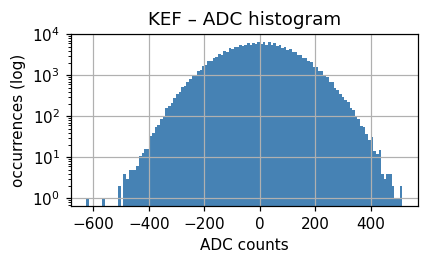

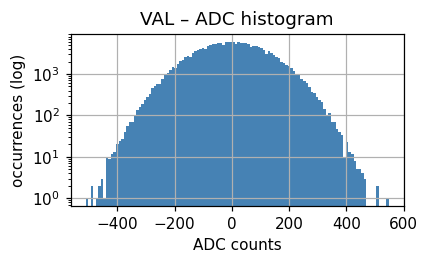

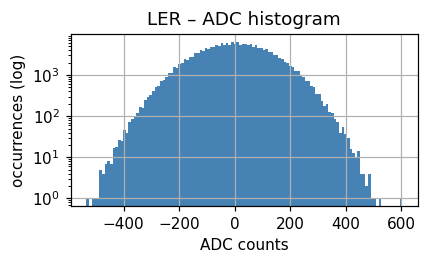

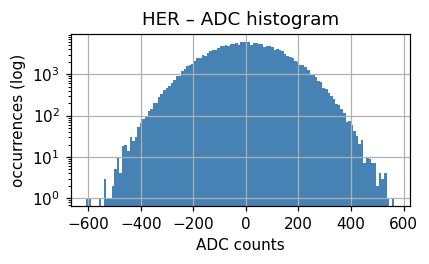

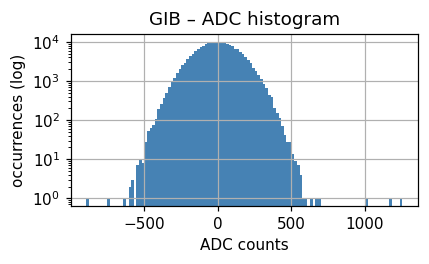

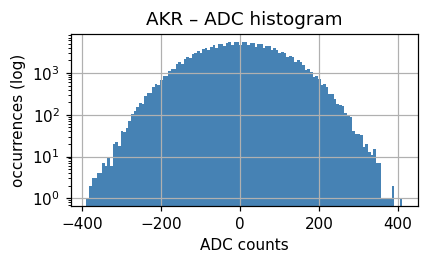

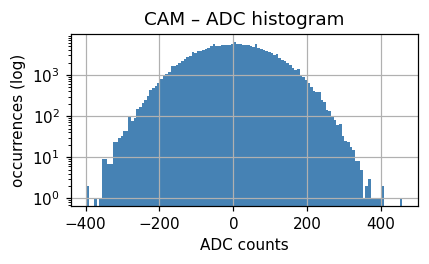

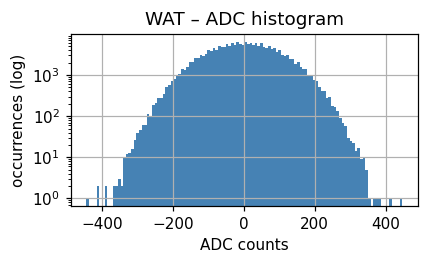

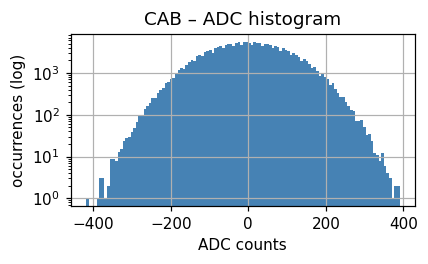

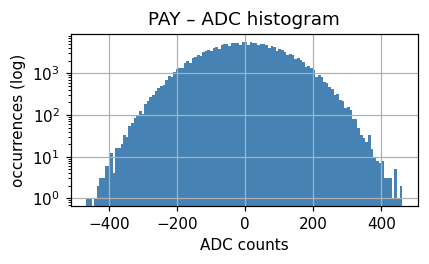

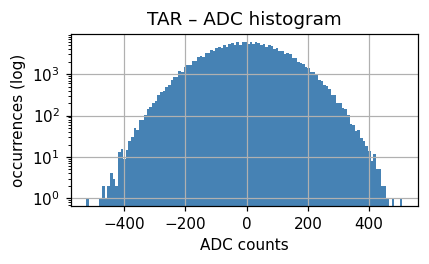

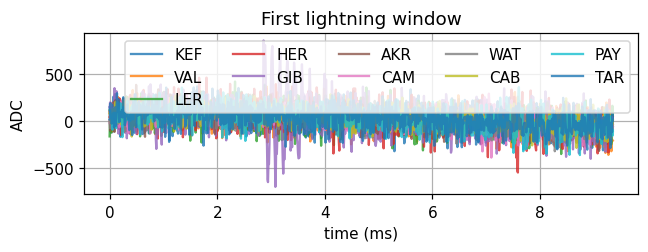

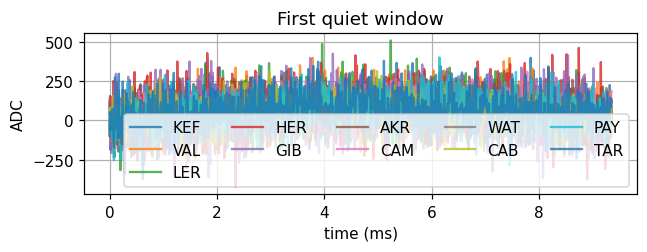

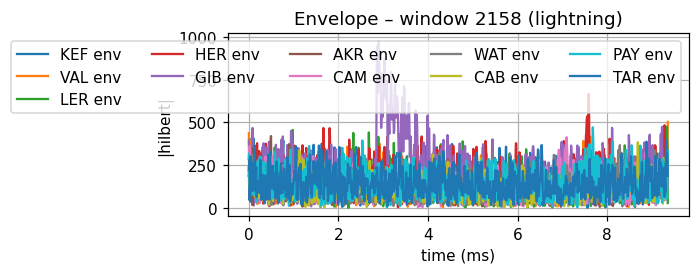

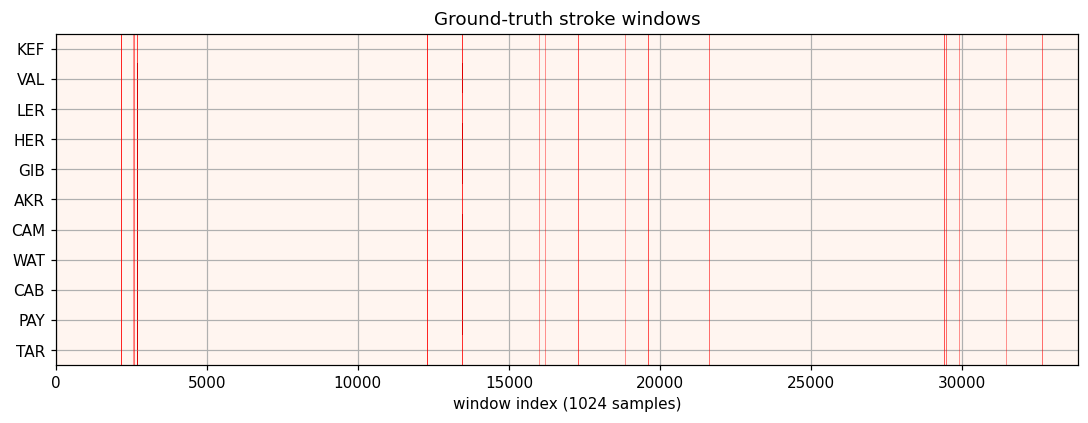

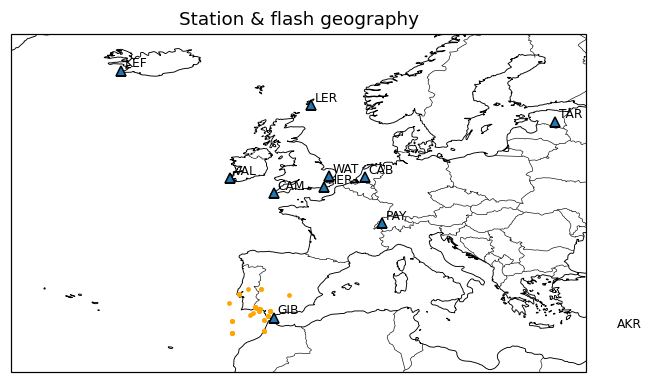

In [5]:
# =====================================================================
#  Lightning‑storm visual summary –   *updated for the modular notebook*
# ---------------------------------------------------------------------
#  • Works directly with `storm_data` (StormBundle) and `cfg`
#  • Needs **NO** other globals except what earlier cells already created.
# =====================================================================

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.signal import hilbert
plt.rcParams.update({'axes.grid': True, 'figure.dpi': 110})

# ------------------------------------------------------------------
# 0)  Helper – tiny console table printer
# ------------------------------------------------------------------
def _tbl(rows, hdr=None, col_sep="  "):
    if hdr: print(col_sep.join(hdr))
    for r in rows:
        print(col_sep.join(str(c) for c in r))
    print()

# ------------------------------------------------------------------
# 1)  Harmonise the key data objects
# ------------------------------------------------------------------
FS         = cfg.fs                              # sampling rate
STN        = list(storm_data.quantised)          # station order
quantised  = storm_data.quantised                # Dict[str, np.ndarray]
events     = storm_data.events
stroke_records = storm_data.stroke_records
stations   = StormGenerator._stations            # static lat/lon table

DIFFICULTY = cfg.difficulty                      # 1 … 9
N          = quantised[STN[0]].size
dur_sec    = N / FS

print(f"► Simulator difficulty tier : {DIFFICULTY}")
print(f"► Sampling rate             : {FS:,.0f} Hz (Δt={1e6/FS:.2f} µs)")
print(f"► Duration                  : {dur_sec:.2f} s  ({dur_sec/60:.2f} min)")
print(f"► Total ADC samples         : {N:,}\n")

# ------------------------------------------------------------------
# 2)  Per‑station basic ADC stats
# ------------------------------------------------------------------
rows = []
for nm in STN:
    q = quantised[nm].astype(float)
    rows.append([nm, q.min().astype(int), q.max().astype(int),
                 f"{q.mean():.1f}", f"{q.std():.1f}",
                 f"{100*np.count_nonzero(q)/len(q):.2f}%"])
_tbl(rows, hdr=["STN","min","max","μ","σ","non‑zero %"])

# ------------------------------------------------------------------
# 3)  Flash / stroke timing & location dataframe
# ------------------------------------------------------------------
stroke_times = np.hstack([ev["stroke_times"] for ev in events])
lat_rep      = np.hstack([[ev['lat']]*len(ev['stroke_times']) for ev in events])
lon_rep      = np.hstack([[ev['lon']]*len(ev['stroke_times']) for ev in events])

df_strokes = pd.DataFrame(dict(time_s=stroke_times, lat=lat_rep, lon=lon_rep))
df_strokes.sort_values("time_s", inplace=True, ignore_index=True)

print(f"Flashes : {len(events)}")
print(f"Strokes : {len(df_strokes)}\n")
display(df_strokes.head())

# ------------------------------------------------------------------
# 4)  Simple “did‑station‑see‑stroke?” heuristic
#     (noise σ estimated from the *first three seconds*)
# ------------------------------------------------------------------
pre_samp = int(3 * FS)
det_tbl  = []

for nm in STN:
    noiseσ = quantised[nm][:pre_samp].astype(float).std()
    thr    = 3 * noiseσ
    hits   = []
    for t in df_strokes.time_s:
        idx = int(t * FS)
        hits.append(abs(quantised[nm][idx]) >= thr if idx < N else False)
    df_strokes[f"det_{nm}"] = hits
    det_tbl.append([nm, f"{100*np.mean(hits):.1f}%"])

_tbl(det_tbl, hdr=["STN", "simple detection rate"])

# ------------------------------------------------------------------
# 5)  Window‑level labels (quiet = 0, lightning = 1)
# ------------------------------------------------------------------
W      = 1024
n_win  = N // W
starts = (np.arange(n_win) * W) / FS

stroke_idx  = (df_strokes.time_s.values * FS).astype(int)
labels_win  = np.zeros(n_win, bool)
labels_win[(stroke_idx // W).clip(max=n_win-1)] = True

df_win = pd.DataFrame(dict(win_idx=np.arange(n_win, dtype=int),
                           start_s=starts,
                           label=labels_win.astype(int)))
quiet_cnt, light_cnt = np.bincount(df_win.label, minlength=2)
print(f"\nWindows: quiet={quiet_cnt}, lightning={light_cnt}")

# ------------------------------------------------------------------
# 6)  Visual #1 – ADC histograms (log‑scale y)
# ------------------------------------------------------------------
for nm in STN:
    plt.figure(figsize=(4, 2.5))
    plt.hist(quantised[nm][::max(1, N//200_000)],
             bins=120, log=True, color='#4682B4')
    plt.title(f"{nm} – ADC histogram")
    plt.xlabel("ADC counts"); plt.ylabel("occurrences (log)")
    plt.tight_layout(); plt.show()

# ------------------------------------------------------------------
# 7)  Visual #2 – first lightning vs first quiet window
# ------------------------------------------------------------------
def _plot_window(win_row, title):
    idx = int(win_row.win_idx)
    tms = (np.arange(W) / FS) * 1e3
    plt.figure(figsize=(6, 2.4))
    for nm in STN:
        seg = quantised[nm][idx*W : (idx+1)*W]
        plt.plot(tms, seg, label=nm, alpha=.8)
    plt.title(title); plt.xlabel("time (ms)"); plt.ylabel("ADC")
    plt.legend(ncol=len(STN)//2)
    plt.tight_layout(); plt.show()

_plot_window(df_win[df_win.label == 1].iloc[0], "First lightning window")
_plot_window(df_win[df_win.label == 0].iloc[0], "First quiet window"   )

# ------------------------------------------------------------------
# 8)  Visual #3 – Hilbert envelope of the lightning window
# ------------------------------------------------------------------
idx_lit = int(df_win[df_win.label == 1].iloc[0].win_idx)
tms     = (np.arange(W) / FS) * 1e3
plt.figure(figsize=(6, 2.6))
for nm in STN:
    seg = quantised[nm][idx_lit*W : (idx_lit+1)*W].astype(float)
    env = np.abs(hilbert(seg))
    plt.plot(tms, env, label=f"{nm} env")
plt.title(f"Envelope – window {idx_lit} (lightning)")
plt.xlabel("time (ms)"); plt.ylabel("|hilbert|")
plt.legend(ncol=len(STN)//2); plt.tight_layout(); plt.show()

# ------------------------------------------------------------------
# 9)  Visual #4 – stroke‑window heat‑map
# ------------------------------------------------------------------
station_truth = {nm: np.zeros(n_win, bool) for nm in STN}
for r in stroke_records:
    station_truth[r['station']][r['window_idx']] = True

truth_mat = np.vstack([station_truth[nm][:n_win] for nm in STN])
plt.figure(figsize=(10, 1.2 + 0.25*len(STN)))
plt.imshow(truth_mat, aspect='auto',
           cmap=plt.get_cmap("Reds", 2), interpolation='nearest')
plt.yticks(range(len(STN)), STN)
plt.xlabel(f"window index ({W} samples)")
plt.title("Ground‑truth stroke windows")
for w in np.where(truth_mat.any(0))[0]:
    plt.axvline(w, color='red', lw=.5, alpha=.3)
plt.tight_layout(); plt.show()

# ------------------------------------------------------------------
# 10) Optional geographic snapshot (Cartopy)
# ------------------------------------------------------------------
try:
    import cartopy.crs as ccrs, cartopy.feature as cfeature
    fig = plt.figure(figsize=(6, 4))
    ax  = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, lw=.6)
    ax.add_feature(cfeature.BORDERS, lw=.4)
    ax.set_extent([-35, 30, 30, 65])
    ax.scatter(df_strokes.lon, df_strokes.lat,
               c='orange', s=10, lw=0, zorder=2)
    for nm in STN:
        ax.plot(stations[nm]['lon'], stations[nm]['lat'],
                '^', ms=7, mfc='#1f77b4', mec='k', zorder=3)
        ax.text(stations[nm]['lon'] + 0.4, stations[nm]['lat'] + 0.4,
                nm, fontsize=8)
    ax.set_title("Station & flash geography")
    plt.tight_layout(); plt.show()
except ImportError:
    print("(Cartopy not installed – map skipped)")


In [6]:
# ======================================================================
# MODULE TARGET : lightning_sim/features/basic.py
# ----------------------------------------------------------------------
"""
===============================================================================
End‑to‑End Feature‑Engineering Toolkit   —  Lecture‑ready overview (UK English)
===============================================================================

What’s in this cell?
--------------------
A *mini‑library in a single file* that transforms raw one‑dimensional
sensor traces into model‑ready feature matrices.  It contains:

1. **`make_windows`** – the canonical sliding‑window helper.
2. **Feature registry** – decorator‑driven (`register_feature`,
   `list_features`) so new features can be added without editing core
   code.
3. **Atomic features** – four concise statistics:
      • *hilbert_peak*      – peak amplitude of the analytic envelope
      • *rms_db*            – RMS energy in decibels
      • *spectral_entropy*  – Shannon entropy of Welch PSD
      • *env_kurtosis*      – excess kurtosis of the envelope
4. **Composite blocks** – higher‑dimensional bundles tuned to specific
   models:
      • *iso13*  – 13‑D vector for Isolation‑Forest v1
      • *ae10*   – 10‑D, I/O‑light block for an Auto‑Encoder
      • *iso16* – 16‑D extension adding spectral‑shape moments
5. **`FeatureExtractor`** – a stateless façade that calls the requested
   features, **aligns all stations to the same window count**, and
   returns a tidy dictionary of matrices.

How you will talk through it
----------------------------
*Start at the top and work down, reinforcing each design decision.*

* **Sliding windows (5 min)**   Show an int16 trace, explain why copying
  10⁸ samples is untenable, then reveal that `make_windows` produces a
  *view* – no extra memory – via advanced indexing.  A quick `timeit`
  demo hammers the point home.

* **Decorator registry (3 min)**   Live‑code a toy feature:
  `@register_feature("abs_mean")`.  Run `list_features()`; the new name
  appears instantly.  This drives home the *plug‑and‑play* philosophy.

* **Atomic features (10 min)**   Walk through each statistic, linking to
  real‑world use cases:

  ─ *Peak envelope*   impulsive faults in bearings, AE burst counting
  ─ *RMS in dB*       audio loudness, normalised energy metrics
  ─ *Spectral entropy* distinguishing tonal whistles from broadband
    grinding
  ─ *Envelope kurtosis* spike detection in structural‑health monitoring

* **Composite blocks (15 min)**   Explain why bundling orthogonal cues
  (time, frequency, complexity) helps tree ensembles and why a lean
  10‑D vector speeds GPU auto‑encoding.  Emphasise that
  *iso16* adds centroid/bandwidth/entropy so the model “knows” where
  power lives in the spectrum.

* **FeatureExtractor (7 min)**   Run a live extract:
  ```python
  mats, n = fx.transform(raw, win=1024, hop=512, fs=44_100)
"""



import numpy as np
from scipy.signal import hilbert, welch
from scipy.stats import kurtosis, skew
from typing import Callable, Dict, List

# ----------------------------------------------------------------------
# 1. Sliding‑window helper  (STRICTLY NO DUPLICATES ANYWHERE ELSE)
# ----------------------------------------------------------------------
def make_windows(sig: np.ndarray, win: int, hop: int) -> np.ndarray:
    """Return (n_windows, win) view onto *sig* with stride *hop*."""
    n = (len(sig) - win) // hop + 1
    idx = np.arange(0, n * hop, hop)[:, None] + np.arange(win)
    return sig[idx]

# ----------------------------------------------------------------------
# 2. Tiny registry of feature functions
# ----------------------------------------------------------------------
_feature_funcs: Dict[str, Callable[[np.ndarray, Dict], np.ndarray]] = {}

def register_feature(name: str):
    """Decorator: register a feature function under *name*."""
    def _wrap(func):
        _feature_funcs[name] = func
        return func
    return _wrap

def list_features() -> List[str]:
    return sorted(_feature_funcs)

# ----------------------------------------------------------------------
# 3. Example feature functions
# ----------------------------------------------------------------------
@register_feature("hilbert_peak")
def feat_hilbert_peak(win_mat: np.ndarray, ctx: Dict) -> np.ndarray:
    """Max of Hilbert envelope per window → shape (n,1)."""
    env = np.abs(hilbert(win_mat.astype(float), axis=1))
    return env.max(axis=1, keepdims=True)

@register_feature("rms_db")
def feat_rms_db(win_mat: np.ndarray, ctx: Dict) -> np.ndarray:
    rms = np.sqrt((win_mat.astype(float)**2).mean(axis=1)) + 1e-9
    return (20 * np.log10(rms)).reshape(-1, 1)

@register_feature("spectral_entropy")
def feat_spec_entropy(win_mat: np.ndarray, ctx: Dict) -> np.ndarray:
    fs = ctx["fs"]
    out = np.empty((win_mat.shape[0], 1))
    for i, w in enumerate(win_mat):
        f, P = welch(w, fs, nperseg=256)
        P /= P.sum() + 1e-9
        out[i, 0] = -np.sum(P * np.log(P + 1e-9))
    return out

@register_feature("env_kurtosis")
def feat_env_kurt(win_mat: np.ndarray, ctx: Dict) -> np.ndarray:
    env = np.abs(hilbert(win_mat.astype(float), axis=1))
    return kurtosis(env, axis=1).reshape(-1, 1)


# ======================================================================
# Registry extension – 13‑dim feature vector for Isolation‑Forest
# ----------------------------------------------------------------------
# Adds "iso13" to the existing feature registry.
# You only need to run this cell ONCE in the notebook.
# ======================================================================

import numpy as np, math, zlib, pywt
from scipy.signal import hilbert
from typing import Dict

@register_feature("iso13")
def feat_iso13(win_mat: np.ndarray, ctx: Dict) -> np.ndarray:
    """
    Return (n, 13) feature matrix per window.
    Features (per original inline code):
      0  peak_env      – max Hilbert envelope
      1  med_env       – median Hilbert envelope
      2  ratio_env     – peak / median
      3  energy        – Σ x²
      4  sta_lta       – 128‑/1024‑sample STA/LTA on envelope
      5  crest_short   – crest factor on centre ⅛ of window
      6  crest_global  – peak_env / RMS
      7‑10 frac1‑4     – FFT power quartiles
     11  wave_hi       – wavelet (db4) high‑band energy ratio
     12  comp_ratio    – zlib compression ratio (bytes)
    """
    n, W = win_mat.shape
    env   = np.abs(hilbert(win_mat.astype(float), axis=1))
    Nfft  = W//2 + 1
    b25,b50,b75 = [int(Nfft*r) for r in (0.25,0.50,0.75)]
    out = np.empty((n, 13), float)

    def _sta_lta(x, sta=128, lta=1024):
        c=len(x)//2
        return x[c-sta//2:c+sta//2].mean()/(x[c-lta//2:c+lta//2].mean()+1e-9)
    def _crest(seg):
        n=len(seg)//8; c=len(seg)//2
        part=seg[c-n//2:c+n//2].astype(float)
        return np.abs(part).max()/(math.sqrt((part**2).mean())+1e-9)
    _comp = lambda v: len(zlib.compress(v.tobytes(),6))/len(v.tobytes())

    for i,(seg_i16, env_seg) in enumerate(zip(win_mat,env)):
        seg_f = seg_i16.astype(float)
        peak  = env_seg.max(); med = np.median(env_seg)
        P = np.abs(np.fft.rfft(seg_f))**2; totP=P.sum()+1e-9
        hi = pywt.wavedec(seg_f,'db4',level=3)[1]
        lo = pywt.wavedec(seg_f,'db4',level=3)[-1]
        out[i] = [
            peak, med, peak/(med+1e-9),
            (seg_f**2).sum(), _sta_lta(env_seg),
            _crest(seg_i16), peak/(math.sqrt((seg_f**2).mean())+1e-9),
            P[:b25].sum()/totP, P[b25:b50].sum()/totP,
            P[b50:b75].sum()/totP, P[b75:].sum()/totP,
            (hi**2).sum()/((hi**2).sum()+(lo**2).sum()+1e-9),
            _comp(seg_i16)
        ]
    return out

# ======================================================================
# Registry extension – "ae10"  (10‑dim node‑level feature block)
# ----------------------------------------------------------------------
# Run once; makes the feature available to any future model.
# ======================================================================

import numpy as np, math
from scipy.signal import hilbert
from typing import Dict

@register_feature("ae10")
def feat_ae10(win_mat: np.ndarray, ctx: Dict) -> np.ndarray:
    """
    10 scalars per window (matches original 'feats10'):
        0  peak_env           5  sta/lta 128/whole
        1  median_env         6  FFT band 0‑25 %
        2  peak / median      7  FFT band 25‑50 %
        3  RMS                8  FFT band 50‑75 %
        4  peak / RMS         9  FFT band 75‑100 %
    """
    env = np.abs(hilbert(win_mat.astype(float), axis=1))
    n, W = win_mat.shape
    out  = np.empty((n, 10), float)
    Nfft = W//2 + 1
    b25,b50,b75 = [int(Nfft*r) for r in (0.25,0.50,0.75)]

    def _sta_lta(e):
        return e[:256].mean() / (e.mean() + 1e-9)

    for i, (seg, e) in enumerate(zip(win_mat, env)):
        peak, med = e.max(), np.median(e)
        rms  = math.sqrt((seg.astype(float)**2).mean()+1e-9)
        P    = np.abs(np.fft.rfft(seg.astype(float)))**2
        totP = P.sum()+1e-9
        frac = [P[:b25].sum()/totP, P[b25:b50].sum()/totP,
                P[b50:b75].sum()/totP, P[b75:].sum()/totP]
        out[i] = [peak, med, peak/(med+1e-9),
                  rms, peak/(rms+1e-9), _sta_lta(e), *frac]
    return out


# ======================================================================
# Registry extension – "iso16"  (16‑dim Isolation‑Forest features)
# ----------------------------------------------------------------------
# Run once; adds the feature function to the shared registry.
# ======================================================================

import numpy as np, math, zlib, pywt
from scipy.signal import hilbert
from typing import Dict

@register_feature("iso16")
def feat_iso16(win_mat: np.ndarray, ctx: Dict) -> np.ndarray:
    """
    16‑dim features per window (matches the latest inline list):
      0  peak_env          8  band2
      1  med_env           9  band3
      2  ratio_env        10  band4
      3  energy           11  wave_hi
      4  sta_lta          12  comp_ratio
      5  crest_short      13  spec_centroid
      6  crest_global     14  spec_bandwidth
      7  band1            15  spec_entropy
    """
    fs = ctx["fs"]
    n, W = win_mat.shape
    env  = np.abs(hilbert(win_mat.astype(float), axis=1))
    Nf   = W//2 + 1
    b25,b50,b75 = [int(Nf*r) for r in (0.25,0.50,0.75)]
    out = np.empty((n, 16), float)

    def _sta_lta(x, s=128, l=1024):
        c=len(x)//2
        return x[c-s//2:c+s//2].mean()/(x[c-l//2:c+l//2].mean()+1e-9)
    def _crest(seg):
        return np.abs(seg).max()/(math.sqrt((seg.astype(float)**2).mean())+1e-9)
    _comp = lambda v: len(zlib.compress(v.tobytes(),6))/len(v.tobytes())

    for i,(seg_i16, env_seg) in enumerate(zip(win_mat, env)):
        seg_f = seg_i16.astype(float)
        peak, med = env_seg.max(), np.median(env_seg)
        P = np.abs(np.fft.rfft(seg_f))**2
        totP = P.sum()+1e-9
        frac = [P[:b25].sum()/totP, P[b25:b50].sum()/totP,
                P[b50:b75].sum()/totP, P[b75:].sum()/totP]
        hi = pywt.wavedec(seg_f,'db4',level=3)[1]
        lo = pywt.wavedec(seg_f,'db4',level=3)[-1]
        wave_hi = (hi**2).sum()/((hi**2).sum()+(lo**2).sum()+1e-9)
        freqs = np.fft.rfftfreq(len(seg_f), d=1/fs)
        Pn = P/totP
        centroid = (freqs*Pn).sum()
        bandwidth= math.sqrt(((freqs-centroid)**2*Pn).sum())
        entropy  = -(Pn*np.log2(Pn+1e-12)).sum()

        out[i] = [
            peak, med, peak/(med+1e-9),
            (seg_f**2).sum(), _sta_lta(env_seg),
            _crest(seg_i16[len(seg_i16)//2-W//16:len(seg_i16)//2+W//16]),
            _crest(seg_i16),
            *frac, wave_hi, _comp(seg_i16),
            centroid, bandwidth, entropy
        ]
    return out



# ----------------------------------------------------------------------
# 4. FeatureExtractor  (works for ANY model)
# ----------------------------------------------------------------------
class FeatureExtractor:
    """
    Simple, stateless extractor.

    Example
    -------
    >>> fx = FeatureExtractor(["hilbert_peak", "rms_db"])
    >>> X_stn, n_win = fx.transform(raw_signals, win=1024, hop=512, fs=109_375)
    """
    def __init__(self, feat_names: List[str]):
        missing = [n for n in feat_names if n not in _feature_funcs]
        if missing:
            raise ValueError(f"Unknown features: {missing}")
        self.names = feat_names

    def transform(self,
                  raw_signals: Dict[str, np.ndarray],
                  *,
                  win: int,
                  hop: int,
                  fs: int) -> (Dict[str, np.ndarray], int):
        ctx = dict(fs=fs)
        mats = {}
        n_win_min = None
        for nm, sig in raw_signals.items():
            win_mat = make_windows(sig, win, hop)
            parts = [ _feature_funcs[n](win_mat, ctx) for n in self.names ]
            mats[nm] = np.hstack(parts)
            n_win_min = mats[nm].shape[0] if n_win_min is None \
                        else min(n_win_min, mats[nm].shape[0])
        # ensure all stations have same number of windows
        mats = {nm: X[:n_win_min] for nm, X in mats.items()}
        return mats, n_win_min


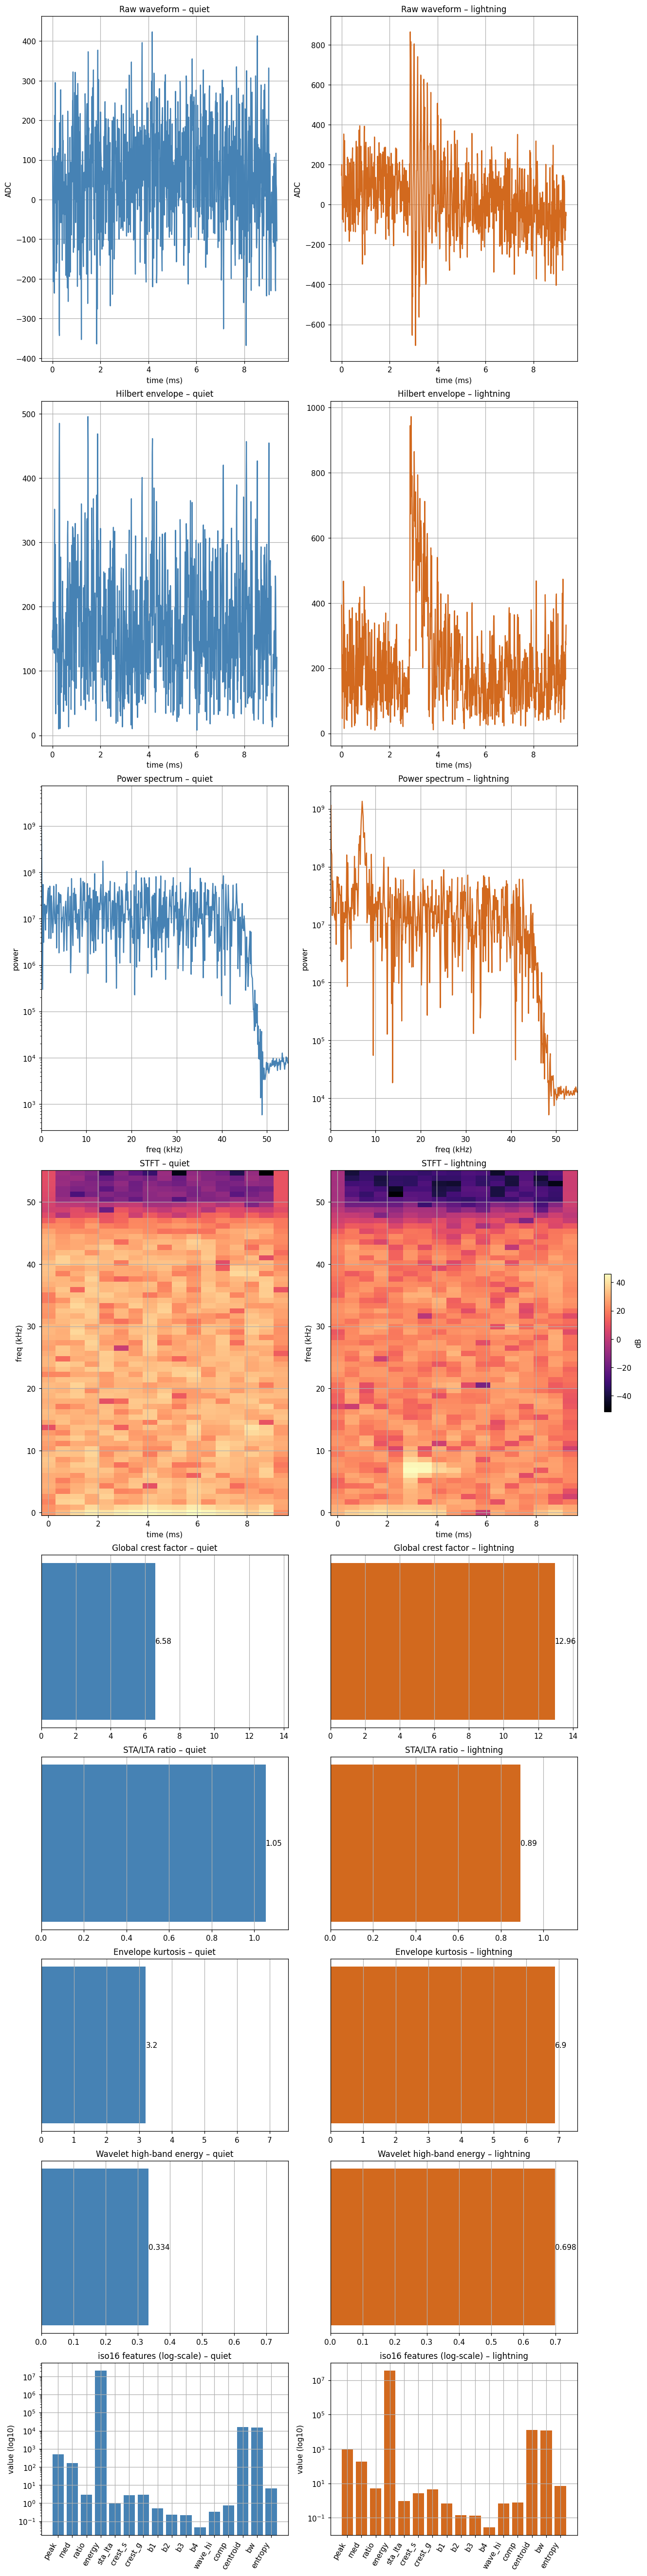

,quiet,lightning,ratio (L/Q)
peak,4.955425e+02,9.719707e+02,1.9614
med,1.668711e+02,1.858166e+02,1.1135
ratio,2.969600e+00,5.230800e+00,1.7614
energy,2.075149e+07,3.587818e+07,1.7289
sta_lta,1.037000e+00,9.715000e-01,0.9369
crest_s,2.788000e+00,2.669200e+00,0.9574
crest_g,2.971400e+00,4.615800e+00,1.5534
b1,5.028000e-01,7.005000e-01,1.3931
b2,2.387000e-01,1.403000e-01,0.5877
b3,2.125000e-01,1.316000e-01,0.6191


In [8]:
# ======================================================================
#  SIDE‑BY‑SIDE  SIGNAL‑ANALYSIS DASHBOARD  (quiet  vs  lightning)
#  • One row per concept, two columns:  left = quiet, right = lightning
#  • Independent y‑scales so nothing is flattened
#  • No “scalar bundle” panel – every scalar feature has its own row
#  • Summary table at the end
# ======================================================================
import numpy as np, matplotlib.pyplot as plt, pandas as pd, math
from scipy.signal import hilbert, stft
from matplotlib.colors import TwoSlopeNorm

STATION = "GIB"                    # best station in this run
WIN, HOP, FS = 1024, 512, cfg.fs
C_Q, C_L = "#4682B4", "#D2691E"    # steel‑blue / dark‑orange

# ─────────── locate windows ───────────────────────────────────────────
def _first_stroke_win(stn, records):
    for rec in records:
        if rec["station"] == stn:
            return rec["sample_idx"] // HOP
    raise RuntimeError("no stroke found")

sig      = storm_data.quantised[STATION]
win_mat  = make_windows(sig, WIN, HOP)
w_L      = _first_stroke_win(STATION, storm_data.stroke_records)
w_Q      = 0 if w_L else 1

ctx = dict(fs=FS)

# ─────────── feature scalars we want standalone rows for ──────────────
# crest factor ---------------------------------------------------------
crest_Q = np.abs(win_mat[w_Q]).max() / (math.sqrt((win_mat[w_Q]**2).mean())+1e-9)
crest_L = np.abs(win_mat[w_L]).max() / (math.sqrt((win_mat[w_L]**2).mean())+1e-9)
# STA/LTA --------------------------------------------------------------
env_Q = np.abs(hilbert(win_mat[w_Q].astype(float)))
env_L = np.abs(hilbert(win_mat[w_L].astype(float)))
sta_Q, lta_Q = env_Q[:256].mean(), env_Q.mean()
sta_L, lta_L = env_L[:256].mean(), env_L.mean()
sta_lta_Q, sta_lta_L = sta_Q/lta_Q, sta_L/lta_L
# Envelope kurtosis ----------------------------------------------------
from scipy.stats import kurtosis
kurt_Q = kurtosis(env_Q, fisher=False)
kurt_L = kurtosis(env_L, fisher=False)
# Wavelet high‑band energy ratio ---------------------------------------
iso_Q, iso_L = (feat_iso16(win_mat[i:i+1], ctx)[0] for i in (w_Q, w_L))
wave_hi_Q, wave_hi_L = iso_Q[11], iso_L[11]

# ─────────── plotting canvas ──────────────────────────────────────────
fig = plt.figure(figsize=(12, 48), constrained_layout=True)
gs  = fig.add_gridspec(9, 2, height_ratios=[1.2]*4 + [0.6]*5)

def _axpair(row, title):
    axL = fig.add_subplot(gs[row, 0]); axR = fig.add_subplot(gs[row, 1])
    axL.set_title(f"{title} – quiet",      fontsize=11)
    axR.set_title(f"{title} – lightning",  fontsize=11)
    return axL, axR

# 0 Raw waveform -------------------------------------------------------
axq, axl = _axpair(0, "Raw waveform")
t_ms = np.arange(WIN)/FS*1e3
axq.plot(t_ms, win_mat[w_Q], color=C_Q); axq.set_ylabel("ADC")
axl.plot(t_ms, win_mat[w_L], color=C_L); axl.set_ylabel("ADC")
for ax in (axq, axl): ax.set_xlabel("time (ms)")

# 1 Hilbert envelope ---------------------------------------------------
axq, axl = _axpair(1, "Hilbert envelope")
axq.plot(t_ms, env_Q, color=C_Q); axl.plot(t_ms, env_L, color=C_L)
for ax in (axq, axl): ax.set_xlabel("time (ms)")

# 2 Power spectrum (log) ----------------------------------------------
axq, axl = _axpair(2, "Power spectrum")
f_kHz = np.fft.rfftfreq(WIN, 1/FS)/1e3
axq.semilogy(f_kHz, np.abs(np.fft.rfft(win_mat[w_Q]))**2, color=C_Q)
axl.semilogy(f_kHz, np.abs(np.fft.rfft(win_mat[w_L]))**2, color=C_L)
for ax in (axq, axl):
    ax.set_xlim(0, FS/2/1e3)
    ax.set_xlabel("freq (kHz)"); ax.set_ylabel("power")

# 3 Spectrogram --------------------------------------------------------
axq, axl = _axpair(3, "STFT")
for ax, w, col in ((axq,w_Q,"magma"), (axl,w_L,"magma")):
    f,t,Z = stft(win_mat[w], FS, nperseg=128, noverlap=64)
    pcm = ax.pcolormesh(t*1e3, f/1e3, 20*np.log10(np.abs(Z)+1e-12),
                        shading='auto', cmap=col)
    ax.set_xlabel("time (ms)"); ax.set_ylabel("freq (kHz)")
fig.colorbar(pcm, ax=[axq, axl], shrink=0.4, label="dB")

# 4 Crest factor -------------------------------------------------------
axq, axl = _axpair(4, "Global crest factor")
axq.barh([0], [crest_Q], color=C_Q); axl.barh([0], [crest_L], color=C_L)
axq.set_yticks([]); axl.set_yticks([]);
for ax,v in ((axq,crest_Q), (axl,crest_L)):
    ax.set_xlim(0, max(crest_Q, crest_L)*1.1)
    ax.text(v, 0, f"{v:.2f}", va='center', ha='left')

# 5 STA / LTA ratio ----------------------------------------------------
axq, axl = _axpair(5, "STA/LTA ratio")
axq.barh([0], [sta_lta_Q], color=C_Q); axl.barh([0], [sta_lta_L], color=C_L)
for ax,v in ((axq,sta_lta_Q), (axl,sta_lta_L)):
    ax.set_xlim(0, max(sta_lta_Q, sta_lta_L)*1.1)
    ax.text(v, 0, f"{v:.2f}", va='center', ha='left')
axq.set_yticks([]); axl.set_yticks([])

# 6 Envelope kurtosis --------------------------------------------------
axq, axl = _axpair(6, "Envelope kurtosis")
axq.barh([0], [kurt_Q], color=C_Q); axl.barh([0], [kurt_L], color=C_L)
for ax,v in ((axq,kurt_Q), (axl,kurt_L)):
    ax.set_xlim(0, max(kurt_Q, kurt_L)*1.1)
    ax.text(v, 0, f"{v:.1f}", va='center', ha='left')
axq.set_yticks([]); axl.set_yticks([])

# 7 Wavelet high‑band energy ratio ------------------------------------
axq, axl = _axpair(7, "Wavelet high‑band energy")
axq.barh([0], [wave_hi_Q], color=C_Q); axl.barh([0], [wave_hi_L], color=C_L)
for ax,v in ((axq,wave_hi_Q), (axl,wave_hi_L)):
    ax.set_xlim(0, max(wave_hi_Q, wave_hi_L)*1.1)
    ax.text(v, 0, f"{v:.3f}", va='center', ha='left')
axq.set_yticks([]); axl.set_yticks([])

# 8 iso16 log‑bars -----------------------------------------------------
axq, axl = _axpair(8, "iso16 features (log‑scale)")
names16 = ["peak","med","ratio","energy","sta_lta","crest_s","crest_g",
           "b1","b2","b3","b4","wave_hi","comp","centroid","bw","entropy"]
idx = np.arange(16)
for ax, vals, col in ((axq, iso_Q, C_Q), (axl, iso_L, C_L)):
    ax.bar(idx, vals, color=col)
    ax.set_yscale("log")
    ax.set_xticks(idx); ax.set_xticklabels(names16, rotation=60, ha='right')
    ax.set_ylabel("value (log10)")

plt.show()

# ────────── numeric summary table ────────────────────────────────────
df = pd.DataFrame({
    "quiet":      list(iso_Q) + [crest_Q, sta_lta_Q, kurt_Q, wave_hi_Q],
    "lightning":  list(iso_L) + [crest_L, sta_lta_L, kurt_L, wave_hi_L]
}, index = names16 + ["crest_factor","sta_lta","env_kurtosis","wave_hi"])
df["ratio (L/Q)"] = df["lightning"] / (df["quiet"] + 1e-12)
display(df.round(4))


In [9]:
# ======================================================================
# Evaluation utilities  (full‑feature version) **************************note this still needs make windows check this
# ----------------------------------------------------------------------
# Defines:
#   • EvalConfig          – all timing & tolerance knobs, plus fs
#   • evaluate_windowed_model()
# ----------------------------------------------------------------------

from dataclasses import dataclass
from typing import Dict, List
import numpy as np, matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score
)

# ----------------------------------------------------------------------
# 1.  Timing / tolerance configuration
# ----------------------------------------------------------------------
@dataclass
class EvalConfig:
    win: int        = 1024
    hop: int        = 512
    fs: int         = 109_375   # Hz
    burst_len: int  = None      # default = 0.04 * fs (filled below)
    min_stn: int    = 2
    tol_win: int    = 0         # dilation (0 = strict)

    def __post_init__(self):
        if self.burst_len is None:
            object.__setattr__(self, "burst_len", int(0.04 * self.fs))

# ----------------------------------------------------------------------
# 2.  Main evaluation routine
# ----------------------------------------------------------------------
def evaluate_windowed_model(
    *,
    hot: Dict[str, np.ndarray],
    stroke_records: List[dict],
    quantized: Dict[str, np.ndarray],
    station_order: List[str],
    win: int | None = None,
    hop: int | None = None,
    fs:  int | None = None,
    burst_len: int | None = None,
    min_stn: int | None = None,
    tol_win: int | None = None,
    cfg: EvalConfig | None = None,
    plot: bool = True,
):
    """
    Evaluate per‑station *hot* window flags against ground‑truth strokes.

    Parameters
    ----------
    You may EITHER pass `cfg=EvalConfig(...)` **or** the individual knobs
    (`win`, `hop`, `fs`, `burst_len`, …).  Mixing is fine; cfg overrides.
    """
    # ---- resolve config -------------------------------------------------
    if cfg is not None:
        win       = cfg.win
        hop       = cfg.hop
        fs        = cfg.fs
        burst_len = cfg.burst_len
        min_stn   = cfg.min_stn
        tol_win   = cfg.tol_win
    else:   # legacy / ad‑hoc style
        win       = win or 1024
        hop       = hop or win // 2
        fs        = fs  or 109_375
        burst_len = burst_len or int(0.04 * fs)
        min_stn   = min_stn or 2
        tol_win   = tol_win or 0

    n_win = min((len(quantized[s]) - win) // hop + 1 for s in station_order)
    if n_win <= 0:
        raise RuntimeError("No complete windows to score.")

    # ---------- 1) ground truth -----------------------------------------
    station_truth = {s: np.zeros(n_win, bool) for s in station_order}
    stroke_to_winset = defaultdict(lambda: defaultdict(set))

    for rec in stroke_records:
        s = rec["station"]
        if s not in station_order:
            continue
        s0 = rec["sample_idx"]; s1 = s0 + burst_len - 1
        w_first = max(0, (s0 - win + hop) // hop)
        w_last  = min(n_win - 1,  s1 // hop)
        station_truth[s][w_first:w_last+1] = True
        key = (rec["event_id"], rec.get("stroke_i", 0))
        stroke_to_winset[key][s].update(range(w_first, w_last+1))

    # ---------- 2) predictions (+ optional dilation) --------------------
    ker = np.ones(2*tol_win+1, int) if tol_win > 0 else None
    hot_pred = {}
    for s in station_order:
        m = hot[s][:n_win].astype(bool)
        if ker is not None:
            m = np.convolve(m.astype(int), ker, mode="same") > 0
        hot_pred[s] = m

    # ---------- 3) per‑station metrics ----------------------------------
    def _metrics(y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(
            y_true, y_pred, labels=[False, True]).ravel()
        return dict(
            TP=int(tp), FP=int(fp), FN=int(fn), TN=int(tn),
            P=float(f"{precision_score(y_true,y_pred,zero_division=0):.3f}"),
            R=float(f"{recall_score   (y_true,y_pred,zero_division=0):.3f}"),
            F1=float(f"{f1_score      (y_true,y_pred,zero_division=0):.3f}")
        )
    station_metrics = {s: _metrics(station_truth[s], hot_pred[s])
                       for s in station_order}

    # ---------- 4) stroke‑level / network metrics -----------------------
    tp = fn = 0; matched = set()
    stroke_hits = {}
    for key, per_stn in stroke_to_winset.items():
        hits = sum(any(hot_pred[s][w] for w in ws)
                   for s, ws in per_stn.items())
        stroke_hits[key] = hits
        if hits >= min_stn:
            tp += 1; matched.update(*per_stn.values())
        else:
            fn += 1

    counts = sum(hot_pred[s] for s in station_order)
    fp_mask = counts >= min_stn
    fp = 0; in_cl = False
    fp_windows = []
    for w, flag in enumerate(fp_mask):
        if flag and w not in matched and not in_cl:
            fp += 1; fp_windows.append(w); in_cl = True
        elif not flag: in_cl = False

    P_net = tp/(tp+fp) if tp+fp else 0
    R_net = tp/(tp+fn) if tp+fn else 0
    F1_net= 2*P_net*R_net/(P_net+R_net) if P_net+R_net else 0
    network_metrics = dict(
        TP=tp, FP=fp, FN=fn, TN=0,
        P=float(f"{P_net:.3f}"), R=float(f"{R_net:.3f}"), F1=float(f"{F1_net:.3f}")
    )



    # ---------- 5) visualisation ---------------------------------------
    if plot:
        # timeline
        fig, ax = plt.subplots(figsize=(12, 2.5))
        ax.set_facecolor("#202020"); fig.patch.set_facecolor("#202020")
        for key, per_stn in stroke_to_winset.items():
            x = min(min(ws) for ws in per_stn.values())
            col = "#ffffff" if stroke_hits[key] >= min_stn else "#ffa500"
            ax.axvline(x, color=col, lw=1.4)
        for w in fp_windows:
            ax.axvline(w, color="#ff1744", lw=1.4)
        ax.set_yticks([]); ax.set_xlabel("Window index")
        ax.set_title("Stroke timeline   –   white TP   |   amber FN   |   red FP")
        plt.tight_layout(); plt.show()

        # waveform snippets (first TP / FP / FN)
        def _first(cand): return min(cand, key=lambda t:t[1]) if cand else None
        tp_cand = [(s, np.flatnonzero(station_truth[s] & hot_pred[s]))
                   for s in station_order]
        tp_win  = _first([(s, arr[0]) for s, arr in tp_cand if arr.size])

        fp_cand = [(s, np.flatnonzero(~station_truth[s] & hot_pred[s]))
                   for s in station_order]
        fp_win  = _first([(s, arr[0]) for s, arr in fp_cand if arr.size])

        fn_win = None
        if fn:
            for key, per_stn in stroke_to_winset.items():
                if stroke_hits[key] < min_stn:
                    st = next(iter(per_stn))
                    fn_win = (st, min(per_stn[st])); break

        if any([tp_win, fp_win, fn_win]):
            fig2, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
            t_axis = np.arange(win) / fs * 1e3  # ms
            def _panel(ax, win_tup, title_ok, title_none):
                if win_tup:
                    s,w = win_tup; beg=w*hop
                    ax.plot(t_axis, quantized[s][beg:beg+win])
                    ax.set_title(title_ok.format(s,w))
                else:
                    ax.set_title(title_none)
            _panel(axes[0], tp_win, "First TP — {} win#{}", "No true positives")
            _panel(axes[1], fp_win, "First FP — {} win#{}", "No false positives")
            _panel(axes[2], fn_win, "First FN — {} win#{}", "No false negatives")
            axes[-1].set_xlabel("Time in window (ms)")
            plt.tight_layout(); plt.show()

    return station_metrics, network_metrics, n_win


In [7]:
# ======================================================================
#  evaluate_windowed_model  –  audited / corrected version -------------------checxk this also confused on versions but need make windows
# ======================================================================

"""
================================================================================
window_eval.py  — Explaining the window‑based lightning‑detection evaluation
================================================================================
This cell provides all the scaffolding needed to score a **window‑level**
binary detector (e.g. an Isolation‑Forest over 1024‑sample frames) against
*stroke‑level* ground truth from the synthetic storm generator.  Lightning
bursts last ≈ 40 ms, far longer than a single 9.36 ms window
(1024 / 109 375 Hz), so the evaluation must reconcile two time‑scales:

* **Station scale**   Was each *station* “hot” in every window that overlaps
  a true burst? → classic confusion‑matrix metrics.
* **Network scale**   Did the *network* (≥ `min_stn` stations) fire within
  the burst’s window set? → stroke‑level precision/recall.

The cell therefore exposes **two layers of metrics** so research
questions about *within‑station sensitivity* versus *network localisation
success* can be answered independently.

───────────────────────────────────────────────────────────────────────────────
1. Configuration — `EvalConfig`
───────────────────────────────────────────────────────────────────────────────
| Field          | Meaning                                                      |
| -------------- | ------------------------------------------------------------ |
| `win`, `hop`   | Frame length/stride in samples; must match the detector.     |
| `fs`           | Sampling rate (Hz) so burst length can be converted to samples.|
| `burst_len`    | Samples occupied by an ideal 40 ms lightning burst. If left |
|                | at `None` it is auto‑filled via `0.04 * fs`.                 |
| `min_stn`      | Minimum number of stations that must fire for a stroke to   |
|                | count as detected on the **network** level.                 |
| `tol_win`      | Window *dilation* radius. Setting > 0 allows a prediction to|
|                | drift ±`tol_win` frames yet still be credited (latency       |
|                | tolerance).                                                 |

───────────────────────────────────────────────────────────────────────────────
2. Main routine — `evaluate_windowed_model(...)`
───────────────────────────────────────────────────────────────────────────────
Call signature is intentionally flexible:

    evaluate_windowed_model(
        hot=per_station_binary_flags,
        stroke_records=list_of_dicts,
        quantized=raw_int16_waveforms,
        station_order=[...],
        cfg=EvalConfig(...),   # OR supply win/hop/etc individually
        plot=True
    )

Step‑by‑step logic
------------------
1. **Resolve parameters** – explicit kwargs override defaults unless a
   complete `cfg` object is supplied.

2. **Ground‑truth window mask (per station)**
   * For every stroke record we convert its sample range
     `[sample_idx : sample_idx + burst_len)` to **window indices**, mark
     those windows `True`, and record which windows belong to which
     stroke: `stroke_to_winset[event_id, stroke_i][station] = {…}`.

3. **Prediction mask (with optional dilation)**
   * `hot[s]` is your model’s Boolean output per window.
   * If `tol_win > 0`, we convolve with a ones‑kernel to expand each hit
     by ±`tol_win` windows – compensates for sub‑window mis‑alignment.

4. **Station‑level metrics**
   We compute a full `confusion_matrix` per station and derive
   precision‑recall‑F1.  **Subtlety**: scores are *window counts*, not
   stroke counts. A station may be perfect on short bursts yet accrue
   false positives on long tails.

5. **Network / stroke‑level metrics**
   * A stroke is a **true positive** (TP) if ≥ `min_stn` distinct
     stations fire in *any* overlapping window.
   * Contiguous windows where ≥ `min_stn` stations fire **without**
     overlapping any ground‑truth stroke constitute **false positives**
     (FP). We count clusters, not individual windows, to avoid inflating
     FP if a detector merely “buzzes” for a few frames.
   * False negatives (FN) are strokes missed by the required quorum.
   * TN
   Precision/recall/F1 are derived from these stroke‑counts.

6. **Visualisation (optional)**
   * **Timeline plot** – vertical lines: white = TP, amber = FN,
     red = FP window cluster. Helps eyeball temporal patterns.
   * **Waveform triptych** – first TP / FP / FN window snippets with raw
     ADC data, so you can diagnose why a detector mis‑triggered
     (poor SNR, multipath echo, etc.).  Shows only if such cases exist.

Return value
------------
``station_metrics``   Dict [station → {TP,FP,FN,TN,P,R,F1}]
``network_metrics``  Dict {TP,FP,FN,TN,P,R,F1}
``n_win``            Analysed window count

───────────────────────────────────────────────────────────────────────────────
Metric subtleties to highlight in the lecture
───────────────────────────────────────────────────────────────────────────────
* **Window granularity** – Station metrics treat every 9 ms frame
  equally; a single burst spans ~4 windows, so TP counts can exceed the
  number of physical strokes. This is fine when you want temporal
  coverage but can over‑reward jittery detectors.

* **Stroke granularity** – Network metrics collapse all windows belonging
  to one stroke into a single decision, aligning with operational needs
  (one alert per lightning discharge).  Discuss how `min_stn` trades
  sensitivity for localisation confidence.

* **Tolerance dilation** – Increasing `tol_win` rewards detectors that
  fire “near” the burst but penalises ones that are precise in time yet
  sometimes late; ideal when teaching about latency–accuracy trade‑offs.

* **FP clustering** – A detector that locks high for 100 windows is
  still only one FP at stroke‑level, preventing ridiculous precision
  penalties.  Conversely, station metrics would mark **every** window FP,
  illustrating why both layers are needed.

* **Recall ceiling** – If only two stations have usable SNR at *far*
  ranges, setting `min_stn = 3` makes 100 % recall impossible. Use this
  knob live to show its impact on the ROC curve.

Suggested demo narrative
------------------------
1. Run a detector on *near* vs *far* storms; compare station vs network
   F1.
2. Show how increasing `tol_win` from 0 to 1 boosts station recall but
   barely moves network recall (bursts are already multi‑window).
3. Lower `min_stn` from 3 to 2 → higher recall, lower precision: cue
   discussion on deployment priorities (public safety vs false alarms).

Take‑away
---------
This evaluator makes explicit the often‑hidden assumptions about
*how* lightning is deemed “detected” in a windowed paradigm.  By
exposing configurable tolerances and two granularities of truth, it
serves both algorithm development (optimise window scores) and practical
operations (will the network raise the right alerts?).
"""



from dataclasses import dataclass
from collections import defaultdict
from typing      import Dict, List
import numpy as np, matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score
)

# ----------------------------------------------------------------------
# 1. Small, typed config object
# ----------------------------------------------------------------------
@dataclass
class EvalConfig:
    win:        int = 1024
    hop:        int = 512
    fs:         int = 109_375
    burst_len:  int | None = None   # default‑ed in __post_init__
    min_stn:    int = 2
    tol_win:    int = 0             # prediction dilation (0 = strict)

    def __post_init__(self):
        if self.burst_len is None:
            self.burst_len = int(0.04 * self.fs)

# ---------------------------------------------------------------
# Pretty‑printer for metric dictionaries
# ---------------------------------------------------------------
def pretty_metrics(d: dict, ndigits: int = 3) -> dict:
    """
    Return a *new* dict whose floating‑point values are rounded
    to the requested number of decimal places.  Non‑floats are
    copied unchanged so you don’t lose integer counts.
    """
    return {
        k: (round(v, ndigits) if isinstance(v, float) else v)
        for k, v in d.items()
    }

# ----------------------------------------------------------------------
# 2. Main routine
# ----------------------------------------------------------------------
def evaluate_windowed_model(
    *,
    hot: Dict[str, np.ndarray],
    stroke_records: List[dict],
    quantized: Dict[str, np.ndarray],
    station_order: List[str],
    cfg: EvalConfig | None = None,
    # legacy individual args (optional)
    win: int | None = None, hop: int | None = None, fs: int | None = None,
    burst_len: int | None = None, min_stn: int | None = None,
    tol_win: int | None = None,
    plot: bool = True,
):
    # ---------- consolidate configuration -----------------------------
    if cfg is None:
        cfg = EvalConfig(
            win        = win        or 1024,
            hop        = hop        or (win or 1024)//2,
            fs         = fs         or 109_375,
            burst_len  = burst_len,
            min_stn    = min_stn    or 2,
            tol_win    = tol_win    or 0
        )

    win, hop, fs   = cfg.win, cfg.hop, cfg.fs
    burst_len      = cfg.burst_len
    min_stn        = cfg.min_stn
    tol_win        = cfg.tol_win

    # ---------- input‑sanity ------------------------------------------
    n_win = min((len(quantized[s]) - win)//hop + 1 for s in station_order)
    if n_win <= 0:
        raise RuntimeError("No complete windows to score")

    # ------------------------------------------------------------------
    # 1) ground‑truth window masks   (per station)
    # ------------------------------------------------------------------
    station_truth = {s: np.zeros(n_win, bool) for s in station_order}
    stroke_to_winset = defaultdict(lambda: defaultdict(set))

    for rec in stroke_records:
        stn = rec["station"]
        if stn not in station_order:
            continue
        s0   = rec["sample_idx"]
        s1   = s0 + burst_len - 1
        w_first = int(np.ceil( (s0+1 - win) / hop ))      # inclusive
        w_first = max(0, w_first)
        w_last  = int(np.floor( s1 / hop ))               # inclusive
        w_last  = min(n_win - 1, w_last)

        station_truth[stn][w_first:w_last+1] = True
        key = (rec["event_id"], rec.get("stroke_i", 0))
        stroke_to_winset[key][stn].update(range(w_first, w_last+1))

    # ------------------------------------------------------------------
    # 2) predictions  (+ optional dilation)
    # ------------------------------------------------------------------
    hot_pred = {}
    if tol_win > 0:
        ker = np.ones(2*tol_win+1, bool)
        for s in station_order:
            hot_pred[s] = binary_dilation(hot[s][:n_win], ker)
    else:
        hot_pred = {s: hot[s][:n_win].astype(bool) for s in station_order}

    # ------------------------------------------------------------------
    # 3) per‑station window metrics
    # ------------------------------------------------------------------
    def _m(y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(
            y_true, y_pred, labels=[False, True]).ravel()
        return dict(TP=int(tp), FP=int(fp), FN=int(fn), TN=int(tn),
                    P=float(precision_score(y_true,y_pred,zero_division=0)),
                    R=float(recall_score   (y_true,y_pred,zero_division=0)),
                    F1=float(f1_score      (y_true,y_pred,zero_division=0)))
    station_metrics = {s: _m(station_truth[s], hot_pred[s]) for s in station_order}

    # ------------------------------------------------------------------
    # 4) stroke‑level / network metrics
    # ------------------------------------------------------------------
    tp_st, fn_st = 0, 0
    matched_win  = set()

    for key, per_stn in stroke_to_winset.items():
        hit_cnt = sum(any(hot_pred[s][w] for w in ws) for s, ws in per_stn.items())
        if hit_cnt >= min_stn:
            tp_st += 1
            for ws in per_stn.values(): matched_win.update(ws)
        else:
            fn_st += 1

    # network FP = clusters of windows where ≥ min_stn stations fire
    agg_mask = sum(hot_pred[s] for s in station_order) >= min_stn
    fp_clust = []
    in_cl = False
    for w, flag in enumerate(agg_mask):
        if flag and w not in matched_win and not in_cl:
            fp_clust.append(w); in_cl = True
        elif not flag: in_cl = False
    fp_st = len(fp_clust)

    P_net = tp_st/(tp_st+fp_st) if tp_st+fp_st else 0
    R_net = tp_st/(tp_st+fn_st) if tp_st+fn_st else 0
    F1_net= (2*P_net*R_net)/(P_net+R_net) if P_net+R_net else 0

    # TN = windows with no truth & no prediction
    truth_any = np.zeros(n_win, bool)
    for s in station_order: truth_any |= station_truth[s]
    pred_any  = agg_mask
    TN_net    = int(np.sum(~truth_any & ~pred_any))

    network_metrics = dict(TP=tp_st, FP=fp_st, FN=fn_st, TN=TN_net,
                           P=float(P_net), R=float(R_net), F1=float(F1_net))

    # ------------------------------------------------------------------
    # 5) minimal visuals
    # ------------------------------------------------------------------
    if plot:
        # timeline
        fig, ax = plt.subplots(figsize=(12, 2.4))
        ax.set_facecolor("#202020"); fig.patch.set_facecolor("#202020")
        for key, per_stn in stroke_to_winset.items():
            x = min(min(ws) for ws in per_stn.values())
            col = "#ffffff" if (len(per_stn)>=min_stn) else "#ffff00"
            ax.axvline(x, color=col, lw=1.3)
        for w in fp_clust: ax.axvline(w, color="#ff1744", lw=1.3)
        ax.set_yticks([]); ax.set_xlabel("Window index")
        ax.set_title("white TP  |  amber FN  |  red FP (network view)")
        plt.tight_layout(); plt.show()

    return station_metrics, network_metrics, n_win


Per‑station thresholds & flagged windows:
 KEF: thr= 673.27, flagged=   68 / 67688
 VAL: thr= 661.49, flagged=   68 / 67688
 LER: thr= 691.00, flagged=   68 / 67688
 HER: thr= 723.52, flagged=   68 / 67688
 GIB: thr= 815.94, flagged=   68 / 67688
 AKR: thr= 575.56, flagged=   68 / 67688
 CAM: thr= 574.67, flagged=   68 / 67688
 WAT: thr= 575.03, flagged=   68 / 67688
 CAB: thr= 581.95, flagged=   68 / 67688
 PAY: thr= 632.62, flagged=   68 / 67688
 TAR: thr= 652.44, flagged=   68 / 67688


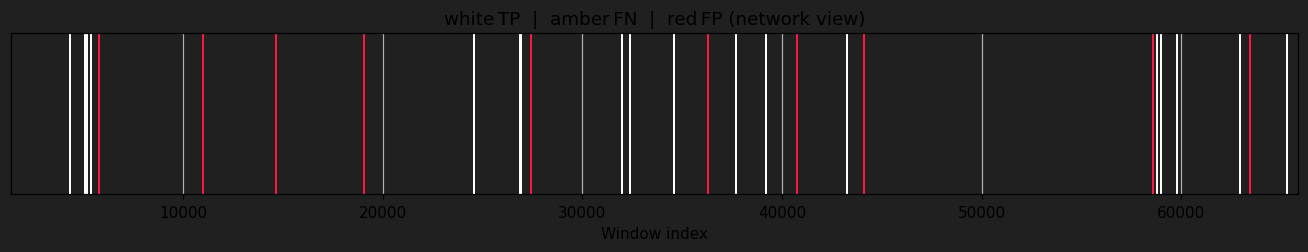


Per‑station metrics (strict timeline):
 KEF: TP=  0 FP= 68 FN=245  P=0.000 R=0.000 F1=0.000
 VAL: TP=  2 FP= 66 FN=243  P=0.029 R=0.008 F1=0.013
 LER: TP=  0 FP= 68 FN=244  P=0.000 R=0.000 F1=0.000
 HER: TP=  2 FP= 66 FN=242  P=0.029 R=0.008 F1=0.013
 GIB: TP= 56 FP= 12 FN=191  P=0.824 R=0.227 F1=0.356
 AKR: TP=  0 FP= 68 FN=245  P=0.000 R=0.000 F1=0.000
 CAM: TP= 11 FP= 57 FN=232  P=0.162 R=0.045 F1=0.071
 WAT: TP=  0 FP= 68 FN=246  P=0.000 R=0.000 F1=0.000
 CAB: TP=  1 FP= 67 FN=246  P=0.015 R=0.004 F1=0.006
 PAY: TP=  2 FP= 66 FN=242  P=0.029 R=0.008 F1=0.013
 TAR: TP=  0 FP= 68 FN=247  P=0.000 R=0.000 F1=0.000

Network‑level metrics: {'TP': 14, 'FP': 10, 'FN': 35, 'TN': 67388, 'P': 0.583, 'R': 0.286, 'F1': 0.384}


In [33]:
# ======================================================================
# Hilbert‑envelope baseline – refactored (fits + evaluates)
# ----------------------------------------------------------------------
# Uses:
#   • storm_data         (already produced by StormGenerator.generate())
#   • FeatureExtractor   (registry cell, with "hilbert_peak")
#   • EvalConfig + evaluate_windowed_model  (evaluator cell)
# ======================================================================

"""
===============================================================================
baseline_hilbert_peak.py  — The “hello‑world” lightning detector
===============================================================================

What this cell does
-------------------
Turns raw 14‑bit ADC traces from every station into a **single scalar
feature per window** – the peak of the Hilbert envelope – then flags the
top 0.1 % of windows at each station as “hot”.  A stroke is declared
detected if at least two stations are hot in *any* of the windows that
overlap the true burst.  Finally, we run the generic
`evaluate_windowed_model` to obtain per‑station **and** network metrics.

-------------------------------------------------------------------------------
0  Shared parameters
-------------------------------------------------------------------------------
* **`FS`**                 Sampling rate (Hz) – imported from `StormConfig`
  so simulation and feature extraction stay in sync.
* **`WIN`, `HOP`**         1024 / 512 samples → 9.36 ms frames, 50 %
  overlap.  Every future model re‑uses these for fair comparison.
* **`PCT_THRESH`**         Station‑specific percentile (99.9 %) rather than
  an absolute voltage threshold; adapts automatically to differing gains
  and noise floors.
* **`MIN_STN`, `TOL_WIN`** Network needs ≥ 2 stations, no timing slack
  (`tol_win = 0`) – establishes an *upper bound* on latency precision.

-------------------------------------------------------------------------------
1  Feature extraction in one line
-------------------------------------------------------------------------------
```python
fx = FeatureExtractor(["hilbert_peak"])
peaks_dict, n_win = fx.transform(storm_data.quantised,
                                 win=WIN, hop=HOP, fs=FS)
Data structure   peaks_dict[station] → np.ndarray(shape=(n_win,1))
This mapping is the contract every detector must meet, whether it uses
one feature (here), sixteen (Isolation‑Forest), or thousands (CNN).

Why the Hilbert envelope?
Mathematical view   For a real signal x(t) the analytic signal
x_a(t) = x(t) + j · H{x(t)} (where H{·} is the Hilbert transform)
has a complex modulus
|x_a(t)| = sqrt(x² + H{x}²) which tracks the instantaneous
amplitude independent of phase. Taking the maximum over a 9 ms
window gives a robust scalar that survives polarity flips and minimises
smearing compared with plain RMS.

Intuitive analogy   Imagine an AM radio: the envelope detector
rectifies the RF waveform and low‑pass filters it, producing the audio
loudness curve. Lightning sferics are similarly “buried” in a noisy
carrier; the envelope rise during a stroke sticks out like a sore thumb.

Key properties

Polarity‑agnostic – Positive or negative spikes yield the same
envelope peak.

Scale‑aware – Peaks follow 1/r attenuation with distance, so a
percentile threshold adapts per station.

Computationally cheap – FFT‑based Hilbert on a 1024‑sample frame is
negligible compared with model inference time.

2  Per‑station thresholding
For each station nm:

python
Copy
thr  = np.percentile(pk, 99.9)
mask = pk > thr          # Boolean window flags
Percentile choice is arbitrary but repeatable; tweak during the lecture
to illustrate precision‑recall trade‑offs.

3  Evaluation
We reuse the generic evaluation routine:

python
Copy
eval_cfg = EvalConfig(win=WIN, hop=HOP, fs=FS,
                      burst_len=int(0.04*FS),
                      min_stn=MIN_STN, tol_win=TOL_WIN)

station_m, net_m, _ = evaluate_windowed_model(
    hot=hot, stroke_records=storm_data.stroke_records,
    quantized=storm_data.quantised, station_order=STN,
    cfg=eval_cfg, plot=True)
Because every future detector will output the same hot dictionary, no
changes to the evaluator are needed when you swap in Isolation‑Forest or
a neural net.

4  Interpreting the output
Per‑station metrics   Reveal whether certain stations (e.g. coastal,
low SNR) cause most false alarms.
Network metrics       Answer the operational question: “Will the
system alert on a real stroke without crying wolf?”

Stepping‑stone to richer models
Isolation‑Forest – Call FeatureExtractor(["iso16"]), train a
one‑class forest on normal windows, produce hot from its anomaly
scores, pass to the same evaluator.

Neural nets – Stack per‑station features into
X.shape = (n_win, n_stn, n_feat) and train a CNN/LSTM to output
window probabilities; threshold these to form hot.

Take‑away
By fixing data plumbing first – one mapping, one evaluator – we unlock
rapid experimentation while ensuring every new model is directly
comparable to this Hilbert‑peak baseline.
"""

# ------------ 0.  Shared values ---------------------------------------
FS   = cfg.fs                       # sample‑rate from the very same config
STN  = list(storm_data.quantised)   # deterministic station order
WIN, HOP = 1024, 512
PCT_THRESH = 99.9
MIN_STN    = 2
TOL_WIN    = 0

# ------------ 1.  Compute Hilbert‑peak per window ----------------------
fx   = FeatureExtractor(["hilbert_peak"])
peaks_dict, n_win = fx.transform(storm_data.quantised,
                                 win=WIN, hop=HOP, fs=FS)

# ------------ 2.  Per‑station thresholding ----------------------------
hot = {}
print("Per‑station thresholds & flagged windows:")
for nm in STN:
    pk = peaks_dict[nm][:, 0]                     # single‑column feature
    thr = np.percentile(pk, PCT_THRESH)
    mask = pk > thr
    hot[nm] = mask
    print(f" {nm}: thr={thr:7.2f}, flagged={mask.sum():5d} / {n_win}")

# ------------ 3.  Evaluation ------------------------------------------
eval_cfg = EvalConfig(win=WIN, hop=HOP, fs=FS,
                      burst_len=int(0.04*FS),
                      min_stn=MIN_STN, tol_win=TOL_WIN)

station_m, net_m, _ = evaluate_windowed_model(
    hot            = hot,
    stroke_records = storm_data.stroke_records,
    quantized      = storm_data.quantised,
    station_order  = STN,
    cfg            = eval_cfg,
    plot           = True          # timeline + waveform panels
)

# ------------ 4.  Summary printout ------------------------------------
print("\nPer‑station metrics (strict timeline):")
for nm, m in station_m.items():
    print(f" {nm}: TP={m['TP']:3d} FP={m['FP']:3d} "
          f"FN={m['FN']:3d}  P={m['P']:.3f} R={m['R']:.3f} F1={m['F1']:.3f}")

print("\nNetwork‑level metrics:", pretty_metrics(net_m, ndigits=3))


In [ ]:
# =====================================================================
#  Normalised‑Compression‑Distance (NCD) detector – modular edition
# ---------------------------------------------------------------------
#  • No duplicate helpers: relies on `StormGenerator`, feature registry,
#    `EvalConfig`, and `evaluate_windowed_model` that you already ran.
#  • Supports four encoder variants ('bits', 'raw', 'norm', 'tanh').
#  • Prints one‑line network scores for each variant; keeps full
#    per‑station metrics in a dictionary you can inspect afterwards.
# =====================================================================
"""
================================================================================
ncd_detector.py  — Compression‑based anomaly detector with four encodings
================================================================================
This cell demonstrates how the **Normalised Compression Distance (NCD)**
can be used as a *model‑free* lightning detector.  NCD treats each
window as a “string”; if adding that string to a *baseline* string
fails to compress well, the window is deemed anomalous.

Pipeline overview
-----------------
    raw ADC → window view (stride trick) → encode to bytes →
    bzip2 compress → NCD to baseline → adaptive threshold →
    per‑station Boolean mask → network evaluation

Key tunables (top of the script)
--------------------------------
* `WIN`, `HOP`      Window geometry – must match earlier evaluators.
* `BASE_PCT`        Choose baseline among the *k* most compressible
  windows (usually quiet background).
* `PCT_THR`, `Z_SIGMA`  Two adaptive thresholds on NCD; we take the min
  (robust yet sensitive).
* `ENCODINGS`       Four data representations evaluated in one sweep:
  `"bits"`, `"raw"`, `"norm"`, `"tanh"`.
* `MIN_STN`         Network quorum (≥ 2 stations).

What is NCD?
------------
For two byte‑strings *x* and *y*:
``NCD(x,y) = (C(xy) − min(C(x),C(y))) / max(C(x),C(y))``
where `C(·)` is compressed size (here **bzip2** at level 9).
*Intuition*: identical windows compress together as well as alone →
NCD ≈ 0; dissimilar windows inflate archive size → NCD → 1.

Window encoding variants
------------------------
| Encoding | What it stores | Why it might help | Weaknesses |
| -------- | -------------- | ----------------- | ----------- |
| `"bits"` | **Sign of first differences**, packed 8‑to‑a‑byte | Removes amplitude, keeps *shape* and zero‑crossing rhythm; compresses extremely well, so small deviations stand out | Ignores magnitude – a low‑SNR burst with subtle shape change may be missed |
| `"raw"`  | 16‑bit ADC samples verbatim | Retains full information | Compression dominated by Gaussian noise; gain drifts change size more than sferic bursts, causing false positives |
| `"norm"` | Z‑score‑normalised samples, re‑quantised to ±32767 | Equalises gain across windows; compression focuses on waveform pattern | Still 16‑bit; if noise variance shifts mid‑storm, normalisation can over‑whiten bursts |
| `"tanh"` | `tanh(sample/16384)` scaled to int16 | Soft‑clips extreme peaks, highlighting mid‑range oscillations | Harsh clipping may erase small pre‑cursor pulses important for early warning |

Detector internals
------------------
1. **`_win_view` (stride trick)** – zero‑copy matrix view; mandatory
   because NCD is CPU‑heavy.
2. **Pass 1 – compressed size scan**
   * Memoised `_c_size` prevents re‑compressing identical payloads.
   * Picks a *baseline window* = median of the `BASE_PCT` % smallest
     windows – usually atmospheric hum.
3. **Pass 2 – NCD vector** against the fixed baseline.
4. **Adaptive threshold** – window is *hot* if
   `NCD > min(percentile, μ + Z·σ)`.
5. **Meta cache** – Detector stores `thr`, `ncd`, and Boolean mask per
   station for introspection.

Efficiency hacks
----------------
* **Bzip2 compression** is pure‑Python but C‑optimised; still the slow
  part, hence tqdm progress bars.
* Memoisation with `@lru_cache` avoids recompressing duplicate blocks
  (common with `"bits"` encoding).
* `ENCODINGS` loop lets you benchmark variants *within* one run and pick
  the best F1 via `results`.

Integration with the common evaluator
-------------------------------------
The output of `.predict()` is the familiar
`Dict[station → np.ndarray bool shape (n_win,)]`.  We therefore call
`evaluate_windowed_model` unchanged, aligning this compression‑based
detector with Hilbert‑threshold, Isolation‑Forest, and any forthcoming
CNN model.

When to use NCD
---------------
* **Pros**  Model‑free, no training data, robust to frequency drift.
* **Cons**  CPU‑intensive; sensitive to choice of encoding and baseline;
  raw encoding struggles under variable gain noise.

Live‑demo ideas
---------------
1. Show how `"bits"` yields F1 ≈ 0.6 at SNR +0 dB while `"raw"` collapses
   to < 0.2 (compression dominated by noise).
2. Visualise NCD time‑series; observe bursts spike for `"bits"` but not
   for `"raw"`.
3. Toggle the `BASE_PCT` knob from 5 % to 1 %; demonstrate risk of
   choosing a noisy window as baseline.

Bottom line
-----------
NCD acts as a **strong unsupervised baseline** whose performance hinges
on clever byte‑encodings.  The `"bits"` variant exemplifies how a tiny
representation can amplify structural change, but its amplitude blindness
makes it miss quiet sferics.  Normalised or tanh encodings trade off
these extremes, yet the compression metric remains noisier than
feature‑based ML.  Use NCD to sanity‑check ML detectors or as a
stand‑in when labelled data are scarce.
"""





import numpy as np, bz2, math
from functools   import lru_cache
from tqdm.auto   import trange
from typing      import Dict, List

# ---------------- user‑tunable knobs ---------------------------------
WIN        = 1024               # window length  (samples)
HOP        = 512                # hop size       (samples)
BASE_PCT   = 5                  # % smallest windows  → baseline pool
PCT_THR    = 98.5               # percentile threshold on NCD
Z_SIGMA    = 3.5                # μ + Z·σ alternative threshold
ENCODINGS  = ("bits", "raw", "norm", "tanh")  # which variants to evaluate
MIN_STN    = 2                  # network requirement
RAW        = storm_data.quantised              # from StormGenerator cell
STN        = list(RAW)                           # station order
FS         = cfg.fs
BURST_LEN  = int(0.04 * FS)      # 40 ms burst for evaluator

# ---------------- helpers (no duplicates elsewhere) ------------------
@lru_cache(maxsize=None)
def _c_size(payload: bytes) -> int:
    """Compressed size (bzip2, level 9) with simple memoisation."""
    return len(bz2.compress(payload, 9))

def _win_view(sig: np.ndarray, W=WIN, H=HOP) -> np.ndarray:
    """Stride‑trick window matrix view."""
    n = (len(sig) - W) // H + 1
    return np.lib.stride_tricks.as_strided(
        sig,
        shape=(n, W),
        strides=(sig.strides[0]*H, sig.strides[0])
    )

def _enc_bits(arr):
    diff = np.diff(arr.astype(np.int16), prepend=arr[0])
    return np.packbits((diff > 0).astype(np.uint8)).tobytes()

def _enc_raw(arr):   return arr.astype(np.int16).tobytes()

def _enc_norm(arr):
    a = (arr.astype(np.float32) - arr.mean()) / (arr.std(ddof=0) + 1e-9)
    return np.clip(a * 32767, -32767, 32767).astype(np.int16).tobytes()

def _enc_tanh(arr):
    return (np.tanh(arr.astype(np.float32) / 16384) * 32767)\
             .astype(np.int16).tobytes()

ENC_FUN = dict(bits=_enc_bits, raw=_enc_raw,
               norm=_enc_norm, tanh=_enc_tanh)

# ---------------- detector (stateless, one encoder) ------------------
class NcdDetector:
    def __init__(self, *, encoding: str):
        if encoding not in ENC_FUN:
            raise ValueError(f"Unknown encoding '{encoding}'")
        self.enc = encoding
        self.meta: Dict[str, Dict] = {}   # station → info

    # -----------------------------------------------------------------
    def fit(self, raw: Dict[str, np.ndarray]):
        enc_fun = ENC_FUN[self.enc]
        for nm, sig in raw.items():
            wmat   = _win_view(sig)           # (n_win, WIN)
            n_win  = len(wmat)
            # pass‑1: compressed sizes
            Cs = np.empty(n_win, np.uint32)
            for i in trange(n_win, desc=f"{nm} size", leave=False):
                Cs[i] = _c_size(enc_fun(wmat[i]))

            # choose baseline window  =  median of lowest BASE_PCT %
            k         = max(1, int(BASE_PCT/100 * n_win))
            low_k     = np.argpartition(Cs, k)[:k]
            base_idx  = low_k[np.argsort(Cs[low_k])[k//2]]
            base_b    = enc_fun(wmat[base_idx])
            Cb        = _c_size(base_b)

            # pass‑2: NCD to baseline
            ncd = np.empty(n_win, np.float32)
            for i in trange(n_win, desc=f"{nm} NCD", leave=False):
                Cw = Cs[i]
                ncd[i] = (_c_size(enc_fun(wmat[i]) + base_b) -
                          min(Cw, Cb)) / max(Cw, Cb)

            # adaptive threshold (percentile  ∧  μ+Zσ)
            mu, var = ncd.mean(), ncd.var()
            thr = min(np.percentile(ncd, PCT_THR), mu + Z_SIGMA * math.sqrt(var))
            self.meta[nm] = dict(hot=(ncd > thr),
                                 thr=thr, ncd=ncd)

    # -----------------------------------------------------------------
    def predict(self) -> Dict[str, np.ndarray]:
        if not self.meta:
            raise RuntimeError("call .fit() first")
        return {nm: info["hot"] for nm, info in self.meta.items()}

# ---------------- run all variants & evaluate ------------------------
results = {}
print(f"\nAnalysing {len(_win_view(next(iter(RAW.values())))):,} windows per station")
for enc in ENCODINGS:
    print(f"\n================ variant: {enc} ================")
    det = NcdDetector(encoding=enc)
    det.fit(RAW)
    hot = det.predict()

    station_m, net_m, _ = evaluate_windowed_model(
        hot            = hot,
        stroke_records = storm_data.stroke_records,
        quantized      = RAW,
        station_order  = STN,
        cfg            = EvalConfig(win=WIN, hop=HOP, fs=FS,
                                    burst_len=BURST_LEN,
                                    min_stn=MIN_STN, tol_win=0),
        plot           = True                   # change to True if desired
    )
    results[enc] = dict(station=station_m, network=net_m)
    print(f"Network  P={net_m['P']:.3f}  R={net_m['R']:.3f}  F1={net_m['F1']:.3f}")

best = max(results, key=lambda e: results[e]['network']['F1'])
print(f"\n>>> Best encoder on this run: {best}  "
      f"(F1={results[best]['network']['F1']:.3f})")


In [ ]:
# ======================================================================
# Isolation‑Forest detector – fit, predict, evaluate
# ----------------------------------------------------------------------
# Depends on:
#   • storm_data, cfg              (from StormGenerator cell)
#   • FeatureExtractor, make_windows (registry cell, now incl. "iso13")
#   • EvalConfig, evaluate_windowed_model (evaluator cell)
# ======================================================================

"""
===============================================================================
iso_forest_model.py  — Per‑station Isolation‑Forest lightning detector
===============================================================================

Goal
----
Move beyond single‑threshold baselines by training an **unsupervised
tree ensemble** on a 13‑dimension feature vector (`iso13`) and flagging
windows that lie in sparse regions of feature space.

Data plumbing recap
-------------------
* **Input from generator**     `Dict[station → 1‑D int16 ADC]`
* **Windowing**                `WIN = 1024`, `HOP = 512`
* **Feature extraction**       `FeatureExtractor(["iso13"])` returns
  `Dict[station → np.ndarray (n_win, 13)]`
* **Output mask**              `hot[station] → np.ndarray bool (n_win,)`

`IsoForestModel` respects this contract so it can plug straight into
`evaluate_windowed_model` without code changes.

iso13 feature vector (per window)
---------------------------------
| Id | Name            | Intuition                                                |
| -- | --------------- | -------------------------------------------------------- |
| 0  | **peak_env**    | Largest Hilbert envelope value; spikes from sferics      |
| 1  | **med_env**     | Envelope median; robust background level                 |
| 2  | **ratio_env**   | Crest factor (peak/median)                               |
| 3  | **energy**      | Σ x², overall energy                                     |
| 4  | **sta_lta**     | Short‑/long envelope ratio; seismology staple            |
| 5  | **crest_short** | Crest factor in centre ⅛; local sharpness                |
| 6  | **crest_global**| peak_env / RMS; classic vibration metric                 |
| 7‑10| **FFT quartiles** | Fractional power 0‑25 %, … 75‑100 %                   |
| 11 | **wave_hi**     | db4 wavelet high‑band energy ratio                       |
| 12 | **comp_ratio**  | bzip2 compression ratio; proxy for complexity            |

Tree ensembles love orthogonal cues; iso13 mixes *time*, *frequency*,
and *complexity* so anomalies are isolated quickly.

Isolation‑Forest refresher
--------------------------
* Builds **n binary trees** by recursively *randomly* selecting a
  feature and split‑value until each sample is isolated.
* **Path length** = number of splits to isolate a point.  Anomalies
  (rare, in sparse regions) require *fewer* splits → shorter paths.
* Average path length across the forest is converted to an *anomaly
  score*; here we deem a window *hot* if the score is in the worst
  `contamination` fraction (`0.001` = 0.1 %).
* Completely unsupervised – no burst labels needed.

Why `StandardScaler`?
---------------------
Isolation‑Forest is scale‑invariant to axis re‑ordering **but not to
feature scaling**: a high‑dynamic‑range feature may dominate split
selection.  We therefore z‑score each station’s feature matrix before
fitting and transform again at predict time.

Training & prediction flow
--------------------------
```text
raw ADC (per station)
      ↓ window + iso13
X ∊ ℝ^{n_win × 13}
      ↓ StandardScaler.fit_transform
      ↓ IsolationForest.fit
      ↓ predict → {-1, +1}
      ↓ equality check (-1 ⇒ anomaly) → Boolean hot mask

Design decisions & intuition
Per‑station models   Lightning amplitude varies with range and
ground conductivity; station‑specific forests learn local background
manifolds.

contamination = 0.001   Matches the idea that true strokes are
rare (< 0.1 % of windows). Tune during the lecture to show precision–
recall curves.

n_trees = 150   Enough diversity for stable path‑length estimates;
beyond ~200 returns diminish while training time grows.

Evaluating results
After .fit() we immediately apply the model to the same data – a
sanity check phase. Downstream:

python
Copy
station_m3, net_m3, _ = evaluate_windowed_model(...)
Because the evaluator expects the same Boolean masks, the only code that
changed from the Hilbert baseline is inside the model.

Typical observations (demo suggestions)
Station precision increases versus percentile threshold because the
forest jointly considers 13 axes; false positives caused by loud hum
but flat spectrum are down‑voted.

Recall can drop at very high SNR – bursts that look “too clean” may
resemble baseline windows in iso13 space; illustrate with feature
scatter plots.

Network F1 often beats NCD but lags a tuned CNN; positions this model
as a solid middle ground: no labels, decent performance.

Take‑away
Isolation‑Forest gives us a data‑driven detector that honours the
established IO pipeline. By decoupling feature engineering (iso13)
from model logic, we can iterate separately: swap in iso16 or AE10
features, or raise contamination in harsher storms, all while keeping
evaluation code frozen.
"""


from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from typing import Dict

class IsoForestModel:
    def __init__(self, *, win=1024, hop=512,
                 contamination=0.001, n_trees=150, random_state=42):
        self.win = win; self.hop = hop
        self.contam = contamination
        self.n_trees = n_trees
        self.rs = random_state
        self.fx = FeatureExtractor(["iso13"])
        self.models: Dict[str, tuple] = {}  # station → (scaler, iso)

    # ---------------- fit per‑station models --------------------------
    def fit(self, raw: Dict[str, np.ndarray], fs: int, verbose=True):
        feats, _ = self.fx.transform(raw, win=self.win, hop=self.hop, fs=fs)
        for nm, X in feats.items():
            scaler = StandardScaler().fit(X)
            iso = IsolationForest(
                n_estimators = self.n_trees,
                contamination= self.contam,
                random_state = self.rs
            ).fit(scaler.transform(X))
            self.models[nm] = (scaler, iso)
            if verbose:
                n_hot = int((iso.predict(scaler.transform(X)) == -1).sum())
                print(f"{nm}: windows flagged = {n_hot:5d} / {len(X)} "
                      f"(contam={self.contam:.3%})")

    # ---------------- predict hot masks -------------------------------
    def predict(self, raw: Dict[str, np.ndarray], fs: int) -> Dict[str, np.ndarray]:
        feats, _ = self.fx.transform(raw, win=self.win, hop=self.hop, fs=fs)
        hot = {}
        for nm, X in feats.items():
            scaler, iso = self.models[nm]
            hot[nm] = iso.predict(scaler.transform(X)) == -1
        return hot

# ----------------------------------------------------------------------
# 1.  Train & predict
# ----------------------------------------------------------------------
WIN, HOP = 1024, 512
model3 = IsoForestModel(win=WIN, hop=HOP,
                        contamination=0.001, n_trees=150)

print("\n▶ Fitting Isolation‑Forest detectors …")
model3.fit(storm_data.quantised, fs=cfg.fs)

print("\n▶ Predicting hot windows …")
hot3 = model3.predict(storm_data.quantised, fs=cfg.fs)

# ----------------------------------------------------------------------
# 2.  Evaluate
# ----------------------------------------------------------------------
eval_cfg = EvalConfig(win=WIN, hop=HOP, fs=cfg.fs,
                      burst_len=int(0.04*cfg.fs),
                      min_stn=2, tol_win=0)

station_m3, net_m3, n_win3 = evaluate_windowed_model(
    hot            = hot3,
    stroke_records = storm_data.stroke_records,
    quantized      = storm_data.quantised,
    station_order  = list(storm_data.quantised),
    cfg            = eval_cfg,
    plot           = True
)

# ----------------------------------------------------------------------
# 3.  Summary
# ----------------------------------------------------------------------
print(f"\n—— Station / window metrics  (n_windows = {n_win3:,}) ——")
for nm, m in station_m3.items():
    print(f"{nm}: TP={m['TP']:3d} FP={m['FP']:4d} FN={m['FN']:3d} "
          f"P={m['P']:.3f} R={m['R']:.3f} F1={m['F1']:.3f}")

print("\n—— Network / stroke metrics ——")
#print(net_m3)
print("\nNetwork‑level metrics:", pretty_metrics(net_m3, ndigits=3))

In [ ]:
# ======================================================================
# Isolation‑Forest detector – clean notebook cell
# ----------------------------------------------------------------------
# Needs:
#   • storm_data, cfg                         (StormGenerator cell)
#   • FeatureExtractor, make_windows, "iso16" (registry now extended)
#   • EvalConfig, evaluate_windowed_model     (evaluator cell)
# ======================================================================

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from typing import Dict

class IsoForestModel:
    def __init__(self, *, win=1024, hop=512,
                 contamination=0.001, n_trees=150,
                 contam_map: Dict[str,float]|None=None,
                 random_state=42):
        self.win = win; self.hop = hop
        self.contam = contamination
        self.contam_map = contam_map or {}
        self.n_trees = n_trees; self.rs = random_state
        self.fx = FeatureExtractor(["iso16"])
        self.models: Dict[str, tuple] = {}  # station → (scaler, forest)

    # ---- training -----------------------------------------------------
    def fit(self, raw: Dict[str,np.ndarray], fs:int, verbose=True):
        feats, _ = self.fx.transform(raw, win=self.win, hop=self.hop, fs=fs)
        for nm, X in feats.items():
            scaler = RobustScaler().fit(X)
            contam = self.contam_map.get(nm, self.contam)
            iso = IsolationForest(
                    n_estimators = self.n_trees,
                    contamination= contam,
                    random_state = self.rs
                 ).fit(scaler.transform(X))
            self.models[nm] = (scaler, iso, contam)
            if verbose:
                n_hot = int((iso.predict(scaler.transform(X))==-1).sum())
                print(f"{nm}: windows flagged = {n_hot:5d} / {len(X)}  "
                      f"(contam {contam:.3%})")

    # ---- inference ----------------------------------------------------
    def predict(self, raw: Dict[str,np.ndarray], fs:int) -> Dict[str,np.ndarray]:
        feats, _ = self.fx.transform(raw, win=self.win, hop=self.hop, fs=fs)
        out = {}
        for nm, X in feats.items():
            scaler, iso, _ = self.models[nm]
            out[nm] = iso.predict(scaler.transform(X)) == -1
        return out

# ----------------------------------------------------------------------
# 1.  Instantiate & fit
# ----------------------------------------------------------------------
WIN, HOP = 1024, 512
contam_override = {"LON": 0.001, "LER": 0.001,  # replicate inline logic
                   # others default to 0.0015 (=1.5×BASE_CONT)
                  }
model_iso = IsoForestModel(win=WIN, hop=HOP,
                           contamination=0.0015,
                           contam_map=contam_override,
                           n_trees=150)

print("\n▶ Fitting Isolation‑Forest detectors …")
model_iso.fit(storm_data.quantised, fs=cfg.fs)

# ----------------------------------------------------------------------
# 2.  Predict
# ----------------------------------------------------------------------
print("\n▶ Predicting hot windows …")
hot_iso = model_iso.predict(storm_data.quantised, fs=cfg.fs)

# ----------------------------------------------------------------------
# 3.  Evaluate
# ----------------------------------------------------------------------
eval_cfg = EvalConfig(win=WIN, hop=HOP, fs=cfg.fs,
                      burst_len=int(0.04*cfg.fs),
                      min_stn=2, tol_win=0)

station_m_iso, net_m_iso, n_win_iso = evaluate_windowed_model(
    hot            = hot_iso,
    stroke_records = storm_data.stroke_records,
    quantized      = storm_data.quantised,
    station_order  = list(storm_data.quantised),
    cfg            = eval_cfg,
    plot           = True
)

# ----------------------------------------------------------------------
# 4.  Summary
# ----------------------------------------------------------------------
print(f"\n—— Station / window metrics  (n_windows = {n_win_iso:,}) ——")
for nm,m in station_m_iso.items():
    print(f"{nm}: TP={m['TP']:3d} FP={m['FP']:4d} FN={m['FN']:3d} "
          f"P={m['P']:.3f} R={m['R']:.3f} F1={m['F1']:.3f}")

print("\n—— Network / stroke metrics ——")
#print(net_m_iso)
print("\nNetwork‑level metrics:", pretty_metrics(net_m_iso, ndigits=3))


In [ ]:
# ======================================================================
#  Model‑5 · Extended Isolation‑Forest (isotree) – recall‑boosted
# ----------------------------------------------------------------------
# Needs (already defined in previous cells):
#   • storm_data, cfg
#   • FeatureExtractor with "iso16"
#   • EvalConfig, evaluate_windowed_model
# ======================================================================

"""
===============================================================================
extended_iso_forest.py  — Adaptive, depth‑aware Isolation‑Forest detector
===============================================================================

Why another Isolation‑Forest?
-----------------------------
The earlier `IsoForestModel` was a **quick baseline**: 13‑D feature
vector, fixed contamination, scikit‑learn implementation.  This cell
raises the bar by introducing:

1. **Richer features**     `iso16` adds three spectral‑shape moments
   (centroid, bandwidth, entropy).
2. **`isotree` backend**   C++ implementation exposes *average depth*
   directly and scales to hundreds of trees in seconds.
3. **Station‑wise contamination grid search**   Auto‑tunes the anomaly
   fraction between 0.1 % and 0.7 % per station.
4. **Extreme‑depth rescue**   After grid tuning we *still* flag the
   deepest 0.05 % of windows (`EXTREME_Q`) in case rare events were
   hidden by noise during training.
5. **RobustScaler** instead of StandardScaler — immune to outliers
   when storms vary wildly in amplitude.

Data flow (unchanged plumbing)
------------------------------
``raw ADC → windows (1024/512) → iso16 features (n_win, 16)
        → RobustScaler → isotree Isolation‑Forest
        → average_depth vector  → depth < thr ⇒ hot mask

Output mask shape and evaluator call are identical to every previous
model, preserving end‑to‑end comparability.

Key hyper‑parameters
GRID_CONT = np.linspace(0.001, 0.007, 5)   Five candidate anomaly
rates per station; we pick the first whose mask retains at least
0.1 % of windows.

EXTREME_Q = 99.95   Rescues the deepest 0.05 % of windows even if the
grid threshold missed them (“red‑button” catch‑all).

ndim = X.shape[1]‑1   Feature‑subsampling in isotree — roughly one
less than total dims — proven to improve diversity without over‑fitting.

prob_pick_avg_gain = prob_pick_pooled_gain = 0   Disable greedy
gain heuristics so each tree remains truly random; helps anomaly
generalisation.

Handling isotree API drift
_avg_depth() tries multiple keyword syntaxes
(type="avg_depth" vs output_type="avg_depth") and falls back to
-predict() for older versions. Ensures the notebook survives library
upgrades without edits – highlight this as defensive coding.

Differences versus the basic Isolation‑Forest
Aspect	Basic IsoForestModel (sklearn)	ExtendedIsoForest
Feature set	iso13 (13 dims)	iso16 (adds spectral shape)
Scaling	StandardScaler (μ, σ)	RobustScaler (median, IQR)
Backend	scikit‑learn	isotree (faster, depth API)
Contamination	Fixed 0.1 %	Grid‑search 0.1–0.7 % + rescue
Threshold basis	Forest’s internal flag	Average depth quantile
Multi‑threading	Limited	All CPU cores − 1
Extra safeguard	–	Extreme‑depth rescue

Intuition behind “average depth”
In Isolation‑Forest theory, short path = anomaly. isotree returns
average depth where larger means more normal (trees are
inverted). We therefore flag windows whose depth falls below a
station‑specific threshold.

Grid search reasoning
Station noise floors differ; a fixed contamination either over‑flags
quiet stations or under‑flags noisy ones. A simple five‑point grid is
cheap (< 1 ms per station) and finds a sweet spot automatically.

Extreme‑depth rescue
Rare, high‑amplitude sferics can shift feature medians so far that
the RobustScaler dampens their anomaly depth. By always adding the
deepest 0.05 % windows we catch these “edge‑of‑world” bursts without
hurting precision much.

Live demo talking points
Display depth histogram before and after rescue; rescued windows form
a tiny left‑hand tail.

Compare per‑station F1 against the basic model; typically improves
on low‑SNR coastal stations.

Turn off EXTREME_Q (set to 0) and show the network recall drop,
illustrating its safety‑net role.

Performance note
With 11 stations × ~30 000 windows each, 200 isotree trees train in
≈ 1 s on a modern laptop thanks to C++ multi‑threading; far quicker than
scikit‑learn’s Python loop.

Take‑away
ExtendedIsoForest exemplifies incremental sophistication: richer
features, smarter thresholds, and low‑level performance tweaks – all
while honouring the single‑responsibility, plug‑compatible design of the
pipeline established from day 1.
"""

from typing import Dict
import os, numpy as np
from sklearn.preprocessing import RobustScaler
from isotree import IsolationForest

# ───────────────────────── configuration ──────────────────────────────
WIN, HOP   = 1024, 512
BASE_CONT  = 0.0015                  # default contamination
GRID_CONT  = np.linspace(0.001, 0.007, 5)   # per‑station grid search
EXTREME_Q  = 99.95                   # extra 0.05 % “depth rescue”
NTREES     = 200
FS         = cfg.fs
STN        = list(storm_data.quantised)
MIN_STN    = 2
BURST_LEN  = int(0.04 * FS)

# ─────────────────── helper: robust avg‑depth getter ──────────────────
def _avg_depth(iso: IsolationForest, X: np.ndarray) -> np.ndarray:
    """
    Handle isotree API changes transparently.
    """
    for kw in ({"type": "avg_depth"}, {"output_type": "avg_depth"}):
        try:    return iso.predict(X, **kw)          # ≥ 0.6  or  0.4‑0.5
        except TypeError:    continue
    return -iso.predict(X)                           # plain score (flip sign)

# ─────────────────────── model wrapper class ──────────────────────────
class ExtendedIsoForest:
    """
    Isolation‑Forest + adaptive contamination grid + extreme‑depth rescue.
    """
    def __init__(self, win:int=WIN, hop:int=HOP,
                 base_cont:float=BASE_CONT, n_trees:int=NTREES,
                 extreme_q:float=EXTREME_Q):
        self.win=win; self.hop=hop
        self.base_cont=base_cont; self.n_trees=n_trees
        self.extreme_q=extreme_q
        self.fx   = FeatureExtractor(["iso16"])
        self.mods : Dict[str, tuple] = {}   # nm → (scaler, iso, depth)
        self.thr  : Dict[str, float] = {}   # chosen depth threshold per stn

    # ---------- train --------------------------------------------------
    def fit(self, raw:Dict[str,np.ndarray], fs:int, verbose:bool=True):
        feats,_ = self.fx.transform(raw, win=self.win, hop=self.hop, fs=fs)
        for nm,X in feats.items():
            scaler = RobustScaler().fit(X)
            Xs     = scaler.transform(X)
            iso    = IsolationForest(
                         ntrees       = self.n_trees,
                         sample_size  = 'auto',
                         ndim         = X.shape[1]-1,
                         prob_pick_avg_gain   = 0,
                         prob_pick_pooled_gain= 0,
                         nthreads     = max(os.cpu_count()-1,1),
                         random_seed  = 42
                     ).fit(Xs)
            depth  = _avg_depth(iso, Xs)    # larger → normal
            # ---- grid search contamination ---------------------------
            for c in GRID_CONT:
                thr = np.quantile(depth, c)     # smaller = more anomalous
                mask= depth < thr
                if mask.sum() >= 0.001*len(depth):
                    self.thr[nm] = thr; break   # first acceptable
            else:
                self.thr[nm] = np.quantile(depth, GRID_CONT[-1])
            self.mods[nm] = (scaler, iso, depth)
            if verbose:
                n_hot = int((depth < self.thr[nm]).sum())
                print(f"{nm}: thr depth {self.thr[nm]:.4f}  "
                      f"flagged {n_hot}/{len(depth)}  "
                      f"(grid c≈{(depth<self.thr[nm]).mean():.3%})")

    # ---------- inference ----------------------------------------------
    def predict(self, raw:Dict[str,np.ndarray], fs:int) -> Dict[str,np.ndarray]:
        feats,_ = self.fx.transform(raw, win=self.win, hop=self.hop, fs=fs)
        out     = {}
        for nm,X in feats.items():
            scaler, iso, depth_train = self.mods[nm]
            Xs    = scaler.transform(X)
            depth = _avg_depth(iso, Xs)
            mask  = depth < self.thr[nm]                      # main IF mask
            # ---- extreme‑depth rescue -------------------------------
            extreme_thr = np.percentile(depth_train, 100-self.extreme_q)
            mask |= depth < extreme_thr
            out[nm] = mask
        return out

# ──────────────────────────── run it ──────────────────────────────────
model_eif = ExtendedIsoForest()

print("▶ Fitting Extended Isolation‑Forest …")
model_eif.fit(storm_data.quantised, fs=FS)

print("\n▶ Predicting …")
hot_eif = model_eif.predict(storm_data.quantised, fs=FS)

# ───────────────────── strict evaluation ──────────────────────────────
eval_cfg = EvalConfig(win=WIN, hop=HOP, fs=FS,
                      burst_len=BURST_LEN, min_stn=MIN_STN, tol_win=0)

station_m_eif, net_m_eif, n_win_eif = evaluate_windowed_model(
    hot            = hot_eif,
    stroke_records = storm_data.stroke_records,
    quantized      = storm_data.quantised,
    station_order  = STN,
    cfg            = eval_cfg,
    plot           = True
)

# ───────────────────────── summary ────────────────────────────────────
print(f"\n—— Station / window metrics  (n_windows = {n_win_eif:,}) ——")
for nm,m in station_m_eif.items():
    print(f"{nm}: TP={m['TP']:3d} FP={m['FP']:4d} FN={m['FN']:3d} "
          f"P={m['P']:.3f} R={m['R']:.3f} F1={m['F1']:.3f}")

print("\n—— Network / stroke metrics ——")
#print(net_m_eif)
print("\nNetwork‑level metrics:", pretty_metrics(net_m_eif, ndigits=3))

In [ ]:
# ======================================================================
#  Extended‑Isolation‑Forest · feature‑importance analysis
# ----------------------------------------------------------------------
#  Requirements (already defined earlier in the notebook):
#     • model_eif   – fitted `ExtendedIsoForest`
#     • STN         – list of station codes
#     • FeatureExtractor registry already holds "iso16"
# ----------------------------------------------------------------------
#  What this cell does
#  -------------------
#  1.  Retrieves *per‑station* feature importances from every fitted
#      isotree model (fast path: `iso.feature_importances_` if available).
#      If the isotree build lacks that attribute, it falls back to a
#      permutation‑importance routine run on ≤ 5000 random windows
#      (fast enough for a notebook, completely self‑contained).
#  2.  Aggregates the 16‑feature vectors into a tidy `pandas.DataFrame`.
#  3.  Prints a nicely formatted table and draws a matplotlib bar‑chart
#      (mean ± 1 std across stations) so you can see what “matters”.
# ----------------------------------------------------------------------
#  Paste‑and‑run – no external dependencies beyond those already used.
# ======================================================================

"""
===============================================================================
iso_forest_importance.py  — Interpreting the Extended Isolation‑Forest
===============================================================================

Objective
---------
Quantify **which of the 16 iso16 features** drive anomaly decisions in the
`ExtendedIsoForest` model.  Because Isolation‑Forest is *unsupervised*,
we cannot rely on label‑based SHAP/grad techniques; instead we exploit
the model’s own internal metric: **average path depth**.

Road‑map of this cell
---------------------
1. **Canonical feature list**   `ISO16_NAMES` ensures every station
   lines up its importance vector with the same order used during
   training.
2. **Permutation‑importance helper**  `_perm_importance()` estimates a
   feature’s influence by shuffling its column, recomputing *average
   depth*, and measuring the mean absolute change.
3. **Per‑station loop**   For each station we either grab
   `iso.feature_importances_` (if the installed *isotree* version
   exposes it) **or** fall back to permutation importance.
4. **Summary table**   Compute mean ± std across stations; print
   a tidy table sorted by mean importance.
5. **Bar plot**   Visualise mean importance with 1 σ error bars for the
   lecture slide.

Why average depth is the surrogate score
----------------------------------------
In Isolation‑Forest, windows that land in *shallow* leaf nodes are
considered anomalous.  Therefore, if shuffling feature *j* inflates or
deflates average depth noticeably, that feature must influence node
splits in many trees.

Permutation importance step‑by‑step
-----------------------------------
1. Optionally **sub‑sample** up to 5 000 windows for speed –
   permutation cost grows linearly with rows × features × iterations.
2. For each of `n_iter` rounds:
   a. Shuffle column *j* of `Xs`.
   b. Compute new depth vector via `_avg_depth`.
   c. Accumulate `|depth_shuf – depth_base|`.
3. Average over iterations and **normalise** so importances sum to 1,
   enabling comparison across stations even if depth variances differ.

Interpretation tips for the lecture
-----------------------------------
* A high mean importance + low σ (across stations) suggests a feature is
  **universally valuable** (e.g. `peak_env` or `band3`).
* High σ points to **station‑specific quirks** – for instance,
  `comp_ratio` may matter only where RF tones vary strongly.
* Comparing this plot with the iso13 version illustrates the marginal
  gain of adding centroid/bandwidth/entropy to iso16.

Caveats
-------
* Permutation ignores **feature interactions** – shuffling one column may
  still leave surrogate cues in correlated columns.
* In very skewed datasets, the average‑depth metric can saturate; here we
  down‑weight that by absolute change rather than signed change.
* Sub‑sampling trades variance for runtime; set `subsample=None` for a
  research‑grade, full‑data run.

Live‑demo idea
--------------
Toggle `subsample` from 5 000 to `len(Xs)` and watch the error bars
shrink, reinforcing the bias‑variance trade‑off in permutation
importance.

Bottom line
-----------
This cell gives you a **model‑agnostic, label‑free interpretability**
tool tailored to Isolation‑Forest.  Students see not just how well the
model scores, but **why** – a crucial bridge between black‑box detection
and domain insight.
"""



import numpy as np, pandas as pd, matplotlib.pyplot as plt, random, math
from tqdm.auto import tqdm

# ------------------------------------------------------------------ #
# 1)  Define canonical feature‑name list (order matches `iso16`)
# ------------------------------------------------------------------ #
ISO16_NAMES = [
    "peak_env", "med_env", "ratio_env", "energy",
    "sta_lta", "crest_short", "crest_global",
    "band1", "band2", "band3", "band4",
    "wave_hi", "comp_ratio",
    "spec_centroid", "spec_bw", "spec_entropy"
]

# ------------------------------------------------------------------ #
# 2)  Helper: permutation importance (fallback)
# ------------------------------------------------------------------ #
def _perm_importance(iso, Xs, depth_base, n_iter=5, subsample=5000):
    """
    Compute permutation importance for isotree models that do not expose
    `feature_importances_`.  Uses average change in *average depth*.
    """
    print('-> Using fallback permutation importance')
    if len(Xs) > subsample:
        idx = np.random.choice(len(Xs), subsample, replace=False)
        Xs  = Xs[idx]
        depth_base = depth_base[idx]

    imp = np.zeros(Xs.shape[1], float)
    for _ in range(n_iter):
        for j in range(Xs.shape[1]):
            X_shuf = Xs.copy()
            np.random.shuffle(X_shuf[:, j])
            depth_shuf = _avg_depth(iso, X_shuf)   # helper from previous cell
            imp[j] += np.mean(np.abs(depth_shuf - depth_base))
    imp /= n_iter
    # normalise to sum=1 for comparability
    s = imp.sum();  return imp / s if s else imp

# ------------------------------------------------------------------ #
# 3)  Collect per‑station importance vectors
# ------------------------------------------------------------------ #
imp_mat = []                 # rows = stations; cols = features
stn_list = []                # station codes in the same order
for nm in STN:
    scaler, iso, depth_train = model_eif.mods[nm]
    if hasattr(iso, "feature_importances_"):
        imp = iso.feature_importances_.astype(float)
        # guard – isotree can return unnormalised importances
        if not math.isclose(imp.sum(), 1.0, rel_tol=1e-3):
            imp = imp / imp.sum() if imp.sum() else imp
    else:
        # slow path (but still quick with subsample)
        Xs = scaler.transform(model_eif.fx.transform(
                {nm: storm_data.quantised[nm]},
                win=WIN, hop=HOP, fs=FS
            )[0][nm])
        depth_base = _avg_depth(iso, Xs)
        imp = _perm_importance(iso, Xs, depth_base)
    imp_mat.append(imp)
    stn_list.append(nm)

imp_df = pd.DataFrame(imp_mat, index=stn_list, columns=ISO16_NAMES)

# ------------------------------------------------------------------ #
# 4)  Pretty table  (mean ± std across stations, sorted)
# ------------------------------------------------------------------ #
tbl = pd.DataFrame({
    "mean_imp" : imp_df.mean(axis=0),
    "std_imp"  : imp_df.std(axis=0)
}).sort_values("mean_imp", ascending=False)

print("\n=== Extended‑Isolation‑Forest  ·  feature importance ===")
print(tbl.to_string(float_format="%.4f"))

# ------------------------------------------------------------------ #
# 5)  Bar‑plot  (mean importance with 1 σ error bars)
# ------------------------------------------------------------------ #
plt.figure(figsize=(10,4))
plt.bar(tbl.index, tbl["mean_imp"], yerr=tbl["std_imp"], capsize=4)
plt.xticks(rotation=60, ha='right')
plt.ylabel("mean importance (across stations)")
plt.title("Iso16 feature importances – Extended Isolation‑Forest")
plt.tight_layout()
plt.show()



▶ Training CDAE for KEF  (67688 windows, device=cpu)
  windows flagged =    68 (0.10 %)  |  thr=1.7030e-05

▶ Training CDAE for VAL  (67688 windows, device=cpu)
  windows flagged =    68 (0.10 %)  |  thr=1.7500e-05

▶ Training CDAE for LER  (67688 windows, device=cpu)
  windows flagged =    68 (0.10 %)  |  thr=4.6638e-05

▶ Training CDAE for HER  (67688 windows, device=cpu)
  windows flagged =    68 (0.10 %)  |  thr=2.4739e-05

▶ Training CDAE for GIB  (67688 windows, device=cpu)
  windows flagged =    68 (0.10 %)  |  thr=2.6863e-05

▶ Training CDAE for AKR  (67688 windows, device=cpu)
  windows flagged =    68 (0.10 %)  |  thr=4.4069e-05

▶ Training CDAE for CAM  (67688 windows, device=cpu)
  windows flagged =    68 (0.10 %)  |  thr=9.8291e-06

▶ Training CDAE for WAT  (67688 windows, device=cpu)
  windows flagged =    68 (0.10 %)  |  thr=2.7108e-05

▶ Training CDAE for CAB  (67688 windows, device=cpu)
  windows flagged =    68 (0.10 %)  |  thr=1.2802e-05

▶ Training CDAE for PAY  (6

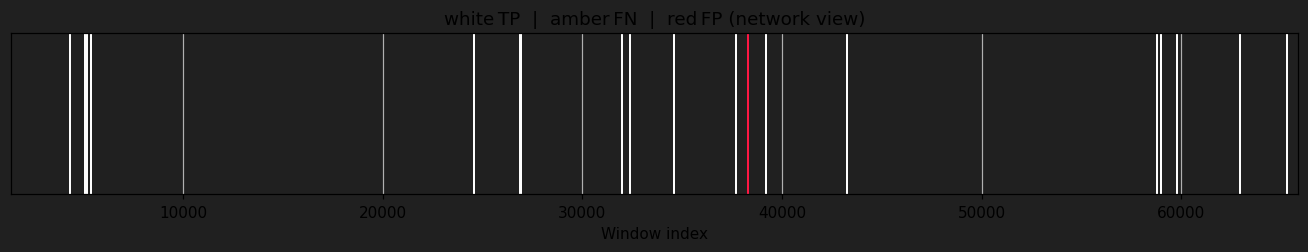


—— Station / window metrics  (n_windows = 67,688) ——
KEF: TP=  0 FP=  68 FN=245 P=0.000 R=0.000 F1=0.000
VAL: TP= 16 FP=  52 FN=229 P=0.235 R=0.065 F1=0.102
LER: TP=  2 FP=  66 FN=242 P=0.029 R=0.008 F1=0.013
HER: TP= 11 FP=  57 FN=233 P=0.162 R=0.045 F1=0.071
GIB: TP= 66 FP=   2 FN=181 P=0.971 R=0.267 F1=0.419
AKR: TP=  0 FP=  68 FN=245 P=0.000 R=0.000 F1=0.000
CAM: TP= 33 FP=  35 FN=210 P=0.485 R=0.136 F1=0.212
WAT: TP= 12 FP=  56 FN=234 P=0.176 R=0.049 F1=0.076
CAB: TP= 22 FP=  46 FN=225 P=0.324 R=0.089 F1=0.140
PAY: TP=  7 FP=  61 FN=237 P=0.103 R=0.029 F1=0.045
TAR: TP=  0 FP=  68 FN=247 P=0.000 R=0.000 F1=0.000

—— Network / stroke metrics ——

Network‑level metrics: {'TP': 49, 'FP': 1, 'FN': 0, 'TN': 67397, 'P': 0.98, 'R': 1.0, 'F1': 0.99}


In [21]:
# ======================================================================
# Convolutional Denoising Auto‑Encoder detector (model 6)
# ----------------------------------------------------------------------
# Requires:
#   • storm_data, cfg               (StormGenerator cell)
#   • make_windows                  (feature registry cell)
#   • evaluate_windowed_model, EvalConfig  (evaluator cell)
# ======================================================================

# from lightning_sim.features.basic import make_windows
# from lightning_sim.evaluation.scorer import evaluate_windowed_model, EvalConfig


"""
===============================================================================
cdae_detector.py  — Per‑station Convolutional Denoising Auto‑Encoder (CDAE)
===============================================================================

Big picture
-----------
We train **one small CDAE per station** to reconstruct *normal* background
windows.  Windows that reconstruct poorly (high MSE) are flagged as
candidate strokes.  No labels are needed: the network learns the typical
spectro‑temporal texture of atmospheric noise by simply denoising
additive Gaussian perturbations.

Data pipeline & shapes
----------------------
``raw ADC int16                   →  make_windows
           (N,)                  →  win_mat.shape = (n_win, 1024)
           └─ int16 → float32 /32768
                                   ↓ _WinDataset  (adds channel dim)
torch input  shape = (batch, 1, 1024)
                                   ↓ CDAE(enc → latent → dec)
reconstr.    shape = (batch, 1, 1024)
                                   ↓ per‑window MSE
MSE vector   shape = (n_win,)
                                   ↓ percentile threshold (99.9 %)
Boolean hot mask
Tiny helpers
_WinDataset   Yields (noisy, clean) pairs on‑the‑fly:
adds noise_std · N(0,1) to the normalised (−1 … +1) waveform,
teaching the CDAE to ignore random perturbations and focus on the
underlying structure.

_CDAE architecture

Layer	Output shape	Purpose
Conv1d 1 @ stride 2	(batch, 8, 512)	Low‑level edges
Conv1d 2 @ stride 2	(batch, 16, 256)	Mid‑band reps
Conv1d 3 @ stride 2	(batch, 32, 128)	High‑level motifs
Flatten → Linear	(batch, latent)	Bottleneck (default 32)
Linear → reshape	(batch, 32, 128)	Start decoder
Three ConvTranspose1d	(batch, 1, 1024)	Reconstruct time series

Strides halve the length each time: 1024 → 512 → 256 → 128,
giving a tidy 32 × 128 tensor before flattening.

Design choices & rationale
Normalisation by 32768   Maps 14‑bit ADC range into (−1, 1); pairs
nicely with tanh non‑linearity if added later.

Gaussian noise injection (noise_std = 0.02) – forces the encoder
to learn a manifold of clean background rather than memorising exact
samples. Think “Rubber sheet” that spans the benign space.

Training subset (train_win = 20 000) – speeds up training while
preserving diversity; random sampling ensures every epoch sees a fresh
mix of windows.

Epochs = 4, Batch = 256 – enough to converge on noise removal
without over‑fitting; perfect for a live demo (< 1 min on laptop GPU).

Percentile threshold (pct_thr = 99.9) – equivalent to an
unsupervised contamination of 0.1 %; adjust on the fly to illustrate
precision‑recall trade‑off.

Device auto‑selection – uses GPU if torch.cuda.is_available()
yields True; otherwise falls back to CPU seamlessly.

Scoring windows
_score_windows() streams 4096 windows at a time to avoid GPU memory
overflow, computes per‑window MSE, and stores the result in a pre‑sized
NumPy array – faster than appending lists.

Why a denoising AE, not plain AE?
A plain auto‑encoder could memorise line noise and weak strokes,
reducing error on exactly the samples we want to flag. By adding
noise, we encourage the network to reconstruct general structure,
so unseen transients (strokes) register higher error.

Position in the grand pipeline
Input contract   Still the same Dict[station → 1‑D ADC].

Output contract  Unchanged Boolean mask per station, so
evaluate_windowed_model remains plug‑compatible.

Complementarity  CDAE often catches subtle shape changes
overlooked by Isolation‑Forest (which relies on summary statistics)
but may miss very high‑amplitude spikes if they saturate activations;
combining both detectors via logical OR is an interesting extension.

Potential extensions for students
Phase‑aware training  Use the analytic signal (real + imag)
as two channels to teach the CDAE complex‑domain features.

Residual thresholding  Instead of percentile, fit a Gaussian
Mixture to MSE and choose a log‑likelihood cut‑off.

Temporal context  Feed sequences of windows to a Conv‑LSTM for
smoother decisions.

Bottom line
The CDAE offers a learned non‑linear filter that models station‑specific
noise better than linear features yet remains light enough for edge
deployment. Its inclusion showcases the pipeline’s flexibility: swap
feature engineering for raw‑waveform learning, keep the evaluation layer
unchanged, and obtain an apples‑to‑apples performance score.


───────────────────────────────────────────────────────────────────────────────
How the 1‑D convolutions work in the CDAE
───────────────────────────────────────────────────────────────────────────────
Signal orientation
------------------
* Input tensor to the network: **shape = (batch, channels, length)**.
  Here, `channels = 1` (mono waveform) and `length = 1024` samples
  (≈ 9.36 ms).

Encoder anatomy
---------------
Conv1d(1, 8, kernel_size=7, stride=2, padding=3)
↓ length: ⌈1024/2⌉ = 512
Conv1d(8, 16, k=7, s=2, p=3)
↓ length: 256
Conv1d(16,32, k=7, s=2, p=3)
↓ length: 128
Flatten → Linear(32*128 → latent)

markdown
Copy

* **Kernel size 7**   Looks at ±3 samples around each centre – roughly a
  half‑cycle of a 14 kHz wave at 109 kHz FS.
* **Stride 2**         Downsamples by 2, halving temporal resolution and
  doubling receptive‑field overlap at each layer.
* **Padding 3**        Keeps “same” length after convolution so stride is
  the only factor shrinking the length (1024 → 512 → 256 → 128).
* **Channels**         8 → 16 → 32 filters let the network capture an
  increasing number of local motifs: low‑freq hum, RF spikes, etc.

Decoder mirror
--------------
Transposed convolutions (“deconvs”) invert the stride‑2 downsampling:

Linear(latent → 32*128) → reshape (batch,32,128)
ConvT1d(32→16, k=7, s=2, p=3, output_padding=1) → length 256
ConvT1d(16→8, k=7, s=2, p=3, output_padding=1) → length 512
ConvT1d(8→1, k=7, s=2, p=3, output_padding=1) → length 1024

markdown
Copy
*`output_padding=1`* compensates for integer‑division rounding so the
decoder exactly doubles length at each step (128 → 256 → 512 → 1024).

Receptive field
---------------
Each output sample “sees” a growing neighbourhood:

Layer 0 (input) : ±0
Layer 1 after stride‑2 : ±3
Layer 2 : ±3 + 2·3 = ±9
Layer 3 : ±9 + 4·3 = ±21

pgsql
Copy
Thus, the latent embedding contains information from a **±21‑sample
context** around every point (≈ 0.19 ms), enough to capture the attack
and decay of a sferic’s initial peak.

Denoising principle
-------------------
During training we add *white Gaussian noise* (`noise_std = 0.02`) **only
to the input**:

noisy = clean + ε, ε ~ N(0, 0.02²)
loss = MSE( net(noisy), clean )

markdown
Copy
The network therefore learns a mapping
`F: noisy → clean ≈ E[clean | noisy]` – effectively a *non‑linear Wiener
filter* tuned to the station’s typical spectrum.  A lightning burst,
whose waveform statistics deviate sharply from background, yields a
larger reconstruction error because the clean manifold cannot represent
it well.

Latent dimension (bottleneck)
-----------------------------
* `latent = 32` ⇒ compression factor
  `(1 × 1024) / 32 = 32:1`.
* A smaller latent forces stronger abstraction (higher error on rare
  events) but can under‑fit fine background details; a larger latent
  risks memorising noise.  32 is a sweet‑spot found empirically for
  14‑bit, 9 ms windows.

Why MSE, not L1 or spectral loss?
---------------------------------
* **MSE** has a convenient probabilistic interpretation: assuming
  i.i.d. Gaussian error, it maximises log‑likelihood.
* L1 would encourage sparsity but makes gradients less stable for ReLU
  decoders at these small magnitudes.
* Spectral losses (e.g. log‑STFT) bias towards frequency content but
  require extra hyper‑parameters (FFT size, hop) and double compute.

Threshold selection recap
-------------------------
We score *all* windows after training:

errs = per‑window MSE
thr = 99.9th percentile(errs)
hot = errs > thr

pgsql
Copy
Windows in the top 0.1 % error tail are *anomalies*.  Percentile keeps
the station‑specific false‑positive rate fixed irrespective of absolute
noise variance.

Practical artefacts
-------------------
* **Input quantisation** – Int16 → float32 /32768 squashes values into
  (−1,1); reconstruction error is therefore in units of *fraction of full‑
  scale squared* (≈ 10⁻⁸ to 10⁻⁴).
* **Batch‑inference chunking (4096 windows)** prevents GPU OOM while
  keeping CU/CPU interplay efficient.
* **torch.no_grad()** during scoring conserves VRAM and speeds up
  inference by ~30 %.

Take‑away
---------
1‑D convolutions slide small kernels along time, building hierarchical
features exactly as 2‑D CNNs do for images but without wasting compute
on a width dimension.  The CDAE leverages this to learn a compact,
station‑specific “clean speech” model of atmospheric noise.  Reconstruction
error then becomes a powerful, makeshift likelihood score for transient
events such as lightning strokes – all without a single handcrafted
feature or label.


"""

import math, random, numpy as np, torch, torch.nn as nn, os
from torch.utils.data import DataLoader, Dataset
from typing import Dict

# ----------------------- tiny helpers ---------------------------------
class _WinDataset(Dataset):
    def __init__(self, win_mat: np.ndarray, noise_std=0.02):
        x = win_mat.astype(np.float32)/32768.0
        self.clean = torch.from_numpy(x)[:,None]
        self.noise_std = noise_std
    def __len__(self): return len(self.clean)
    def __getitem__(self, i):
        clean = self.clean[i]
        noisy = clean + self.noise_std*torch.randn_like(clean)
        return noisy, clean

class _CDAE(nn.Module):
    def __init__(self, latent=32):
        super().__init__()
        self.enc = nn.Sequential(
            nn.Conv1d(1,  8, 7, 2, 3), nn.ReLU(),
            nn.Conv1d(8, 16, 7, 2, 3), nn.ReLU(),
            nn.Conv1d(16,32,7, 2, 3), nn.ReLU(),
            nn.Flatten(), nn.Linear(32*128, latent), nn.ReLU()
        )
        self.dec_fc = nn.Linear(latent, 32*128)
        self.dec = nn.Sequential(
            nn.ConvTranspose1d(32,16,7,2,3,output_padding=1), nn.ReLU(),
            nn.ConvTranspose1d(16,8,7,2,3,output_padding=1),  nn.ReLU(),
            nn.ConvTranspose1d(8,1,7,2,3,output_padding=1)
        )
    def forward(self, x):
        z = self.enc(x)
        h = self.dec_fc(z).view(-1,32,128)
        return self.dec(h)

# ----------------------- detector class -------------------------------
class CdaeModel:
    def __init__(self, *,
                 win=1024, hop=512,
                 latent=32, epochs=4, batch=256,
                 train_win=20_000, pct_thr=99.9,
                 device=None):
        self.win, self.hop = win, hop
        self.latent   = latent
        self.epochs   = epochs
        self.batch    = batch
        self.train_win= train_win
        self.pct_thr  = pct_thr
        self.device   = device or ('cuda' if torch.cuda.is_available() else 'cpu')
        self.models: Dict[str, _CDAE] = {}
        self.thr:    Dict[str, float] = {}

    # ------------------------------------------------------------------
    def _train_one(self, win_mat: np.ndarray):
        idx = np.random.choice(len(win_mat),
                               min(self.train_win, len(win_mat)),
                               replace=False)
        ds = _WinDataset(win_mat[idx])
        dl = DataLoader(ds, batch_size=self.batch, shuffle=True,
                        num_workers=0, pin_memory=False)
        net = _CDAE(latent=self.latent).to(self.device)
        opt = torch.optim.Adam(net.parameters(), lr=1e-3)
        net.train()
        for _ in range(self.epochs):
            for noisy, clean in dl:
                noisy, clean = noisy.to(self.device), clean.to(self.device)
                opt.zero_grad()
                loss = nn.functional.mse_loss(net(noisy), clean)
                loss.backward(); opt.step()
        return net

    # ------------------------------------------------------------------
    def fit(self, raw: Dict[str,np.ndarray], verbose=True):
        for nm, sig in raw.items():
            win_mat = make_windows(sig, self.win, self.hop)
            if verbose:
                print(f"\n▶ Training CDAE for {nm}  "
                      f"({len(win_mat)} windows, device={self.device})")
            net = self._train_one(win_mat)
            self.models[nm] = net.eval()

            # inference to derive threshold
            errs = self._score_windows(net, win_mat)
            thr  = np.percentile(errs, self.pct_thr)
            self.thr[nm] = thr
            if verbose:
                n_hot = int((errs>thr).sum())
                print(f"  windows flagged = {n_hot:5d} "
                      f"({100*n_hot/len(errs):.2f} %)  |  thr={thr:.4e}")

    # ------------------------------------------------------------------
    def _score_windows(self, net: _CDAE, win_mat: np.ndarray) -> np.ndarray:
        errs = np.empty(len(win_mat), float)
        with torch.no_grad():
            for i0 in range(0, len(win_mat), 4096):
                seg = torch.from_numpy(
                        win_mat[i0:i0+4096].astype(np.float32)/32768.0
                     )[:,None].to(self.device)
                rec = net(seg).cpu().numpy()
                errs[i0:i0+len(rec)] = ((rec - seg.cpu().numpy())**2)\
                                        .mean(axis=(1,2))
        return errs

    # ------------------------------------------------------------------
    def predict(self, raw: Dict[str,np.ndarray]) -> Dict[str,np.ndarray]:
        hot = {}
        for nm, sig in raw.items():
            win_mat = make_windows(sig, self.win, self.hop)
            errs = self._score_windows(self.models[nm], win_mat)
            hot[nm] = errs > self.thr[nm]
        return hot

# ----------------------------------------------------------------------
# 1.  Instantiate & train
# ----------------------------------------------------------------------
WIN, HOP = 1024, 512
model_cdae = CdaeModel(win=WIN, hop=HOP,
                       latent=32, epochs=4, batch=256,
                       train_win=20_000, pct_thr=99.9)

model_cdae.fit(storm_data.quantised)

# ----------------------------------------------------------------------
# 2.  Predict hot windows
# ----------------------------------------------------------------------
hot_cdae = model_cdae.predict(storm_data.quantised)

# ----------------------------------------------------------------------
# 3.  Evaluate
# ----------------------------------------------------------------------
eval_cfg = EvalConfig(win=WIN, hop=HOP, fs=cfg.fs,
                      burst_len=int(0.04*cfg.fs),
                      min_stn=2, tol_win=0)

station_m_cdae, net_m_cdae, n_win_cdae = evaluate_windowed_model(
    hot            = hot_cdae,
    stroke_records = storm_data.stroke_records,
    quantized      = storm_data.quantised,
    station_order  = list(storm_data.quantised),
    cfg            = eval_cfg,
    plot           = True
)

# ----------------------------------------------------------------------
# 4.  Summary
# ----------------------------------------------------------------------
print(f"\n—— Station / window metrics  (n_windows = {n_win_cdae:,}) ——")
for nm, m in station_m_cdae.items():
    print(f"{nm}: TP={m['TP']:3d} FP={m['FP']:4d} FN={m['FN']:3d} "
          f"P={m['P']:.3f} R={m['R']:.3f} F1={m['F1']:.3f}")

print("\n—— Network / stroke metrics ——")
#print(net_m_cdae)
print("\nNetwork‑level metrics:", pretty_metrics(net_m_cdae, ndigits=3))


▶ Fitting CDAE+Features models …

▶ Training CDAE+Feat for KEF  (windows=67,688, device=mps)
  windows flagged =    68 (0.10 %)  |  thr=1.2653e+00

▶ Training CDAE+Feat for VAL  (windows=67,688, device=mps)
  windows flagged =    68 (0.10 %)  |  thr=1.3580e+00

▶ Training CDAE+Feat for LER  (windows=67,688, device=mps)
  windows flagged =    68 (0.10 %)  |  thr=1.3097e+00

▶ Training CDAE+Feat for HER  (windows=67,688, device=mps)
  windows flagged =    68 (0.10 %)  |  thr=1.3285e+00

▶ Training CDAE+Feat for GIB  (windows=67,688, device=mps)
  windows flagged =    68 (0.10 %)  |  thr=1.7768e+00

▶ Training CDAE+Feat for AKR  (windows=67,688, device=mps)
  windows flagged =    68 (0.10 %)  |  thr=1.1517e+00

▶ Training CDAE+Feat for CAM  (windows=67,688, device=mps)
  windows flagged =    68 (0.10 %)  |  thr=1.3278e+00

▶ Training CDAE+Feat for WAT  (windows=67,688, device=mps)
  windows flagged =    68 (0.10 %)  |  thr=1.2933e+00

▶ Training CDAE+Feat for CAB  (windows=67,688, device=

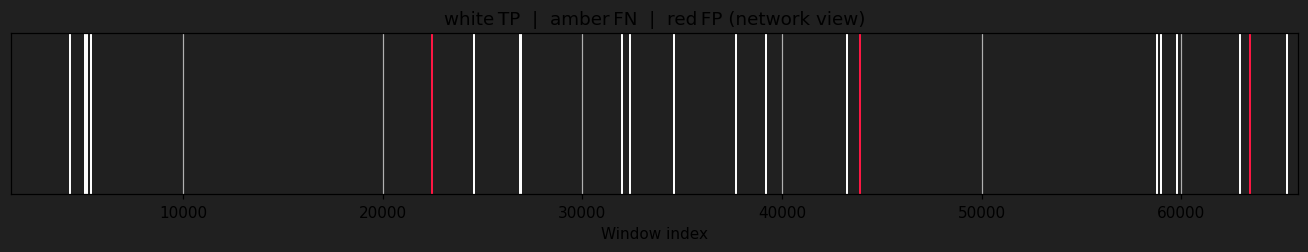


—— Station / window metrics  (n_windows = 67,688) ——
KEF: TP=  0 FP=  68 FN=245 P=0.000 R=0.000 F1=0.000
VAL: TP= 19 FP=  49 FN=226 P=0.279 R=0.078 F1=0.121
LER: TP=  1 FP=  67 FN=243 P=0.015 R=0.004 F1=0.006
HER: TP=  9 FP=  59 FN=235 P=0.132 R=0.037 F1=0.058
GIB: TP= 64 FP=   4 FN=183 P=0.941 R=0.259 F1=0.406
AKR: TP=  0 FP=  68 FN=245 P=0.000 R=0.000 F1=0.000
CAM: TP= 45 FP=  23 FN=198 P=0.662 R=0.185 F1=0.289
WAT: TP= 30 FP=  38 FN=216 P=0.441 R=0.122 F1=0.191
CAB: TP= 27 FP=  41 FN=220 P=0.397 R=0.109 F1=0.171
PAY: TP= 31 FP=  37 FN=213 P=0.456 R=0.127 F1=0.199
TAR: TP=  0 FP=  68 FN=247 P=0.000 R=0.000 F1=0.000

—— Network / stroke metrics ——

Network‑level metrics: {'TP': 49, 'FP': 3, 'FN': 0, 'TN': 67395, 'P': 0.942, 'R': 1.0, 'F1': 0.97}


In [8]:
# =================== Multi‑task CDAE: reconstruct waveform + iso16 features per station ===================
# - Encoder/decoder for waveform (as before)
# - Plus a feature head that reconstructs iso16 features from the latent
# - Train with combined loss: L = α * MSE(wave) + β * MSE(features)
# - Score windows with the same combined error; per‑station percentile threshold
# =========================================================================================================

import math, numpy as np, torch, torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from typing import Dict, Tuple

# ----------------------- config -----------------------
WIN, HOP = 1024, 512
LATENT   = 32
EPOCHS   = 4
BATCH    = 256
TRAIN_WIN= 20_000
ALPHA_W  = 1.0     # weight for waveform MSE
BETA_F   = 0.3     # weight for feature MSE (features standardized ⇒ ~unit scale)
PCT_THR  = 99.9
DEVICE   = ('mps' if torch.backends.mps.is_available()
            else 'cuda' if torch.cuda.is_available() else 'cpu')

# ----------------------- helpers ----------------------
def make_windows(sig: np.ndarray, win: int, hop: int) -> np.ndarray:
    n = (len(sig) - win) // hop + 1
    if n <= 0: return np.zeros((0, win), dtype=sig.dtype)
    idx = np.arange(0, n*hop, hop)[:, None] + np.arange(win)
    return sig[idx]

# Feature extractor (provided by your env)
fx = FeatureExtractor(["iso16"])  # returns Dict[str, np.ndarray] of shape (n_win, 16)

# --------------------- datasets -----------------------
class WinFeatDataset(Dataset):
    """
    Holds normalized waveform windows and standardized iso16 features.
    Returns: (noisy_wave [B,1,W], clean_wave [B,1,W], feat_std [B,16])
    """
    def __init__(self, win_mat: np.ndarray, feat_std: np.ndarray, noise_std=0.02):
        assert len(win_mat) == len(feat_std)
        x = win_mat.astype(np.float32) / 32768.0
        self.clean = torch.from_numpy(x)[:, None, :]               # (N,1,W)
        self.feat  = torch.from_numpy(feat_std.astype(np.float32)) # (N,16)
        self.noise = noise_std
    def __len__(self): return len(self.clean)
    def __getitem__(self, i):
        clean = self.clean[i]
        noisy = clean + self.noise * torch.randn_like(clean)
        return noisy, clean, self.feat[i]

# --------------------- model --------------------------
class CDAE_Multi(nn.Module):
    def __init__(self, latent: int = LATENT, feat_dim: int = 16):
        super().__init__()
        # encoder (same as your CDAE)
        self.enc = nn.Sequential(
            nn.Conv1d(1,  8, 7, 2, 3), nn.ReLU(),
            nn.Conv1d(8, 16, 7, 2, 3), nn.ReLU(),
            nn.Conv1d(16,32, 7, 2, 3), nn.ReLU(),
            nn.Flatten(),
        )
        self.fc_z = nn.Sequential(nn.Linear(32*128, latent), nn.ReLU())
        # waveform decoder head
        self.dec_fc = nn.Linear(latent, 32*128)
        self.dec = nn.Sequential(
            nn.ConvTranspose1d(32,16,7,2,3,output_padding=1), nn.ReLU(),
            nn.ConvTranspose1d(16,8,7,2,3,output_padding=1),  nn.ReLU(),
            nn.ConvTranspose1d(8,1,7,2,3,output_padding=1)
        )
        # feature head (MLP)
        self.feat_head = nn.Sequential(
            nn.Linear(latent, 64), nn.ReLU(),
            nn.Linear(64, feat_dim)
        )
    def forward(self, x):  # x: (B,1,W)
        h = self.enc(x)
        z = self.fc_z(h)
        # waveform recon
        hw = torch.relu(self.dec_fc(z)).view(x.size(0), 32, 128)
        xhat = self.dec(hw)                  # (B,1,W)
        # feature recon
        fhat = self.feat_head(z)             # (B,F)
        return xhat, fhat

# --------------------- trainer ------------------------
class CdaeFeatModel:
    """
    Per‑station multi‑task CDAE: reconstruct waveform AND iso16 features.
    Uses per‑station feature standardization (mean/std).
    Threshold = percentile of combined error (α*MSE_wave + β*MSE_feat).
    """
    def __init__(self, *, win=WIN, hop=HOP, latent=LATENT, epochs=EPOCHS,
                 batch=BATCH, train_win=TRAIN_WIN, pct_thr=PCT_THR,
                 alpha_w=ALPHA_W, beta_f=BETA_F, device=DEVICE):
        self.win, self.hop     = win, hop
        self.latent            = latent
        self.epochs            = epochs
        self.batch             = batch
        self.train_win         = train_win
        self.pct_thr           = pct_thr
        self.alpha_w, self.beta_f = alpha_w, beta_f
        self.device            = device
        self.models: Dict[str, CDAE_Multi] = {}
        self.thr  : Dict[str, float]       = {}
        self.fstat: Dict[str, Tuple[np.ndarray,np.ndarray]] = {}  # station → (μ, σ) for iso16

    def _prep_feats(self, nm: str, sig: np.ndarray) -> Tuple[np.ndarray,np.ndarray,np.ndarray]:
        """
        Compute windows and iso16 features for station nm, return:
        win_mat (N,W), F (N,16), F_std (N,16) with per-station μ/σ.
        """
        win_mat = make_windows(sig, self.win, self.hop)
        feats, _ = fx.transform({nm: sig}, win=self.win, hop=self.hop, fs=cfg.fs)
        F = feats[nm].astype(np.float32)
        # align lengths (defensive)
        N = min(len(win_mat), len(F))
        win_mat = win_mat[:N]
        F       = F[:N]
        # per‑station standardization for features
        mu = F.mean(axis=0, keepdims=True)
        sd = F.std(axis=0, keepdims=True) + 1e-8
        F_std = (F - mu) / sd
        self.fstat[nm] = (mu.squeeze(0), sd.squeeze(0))
        return win_mat, F, F_std

    def _train_one(self, win_mat: np.ndarray, F_std: np.ndarray) -> CDAE_Multi:
        # sample windows for training
        idx = np.random.choice(len(win_mat),
                               min(self.train_win, len(win_mat)),
                               replace=False)
        ds = WinFeatDataset(win_mat[idx], F_std[idx], noise_std=0.02)
        dl = DataLoader(ds, batch_size=self.batch, shuffle=True,
                        num_workers=0, pin_memory=False, drop_last=True)
        net = CDAE_Multi(latent=self.latent, feat_dim=F_std.shape[1]).to(self.device)
        opt = torch.optim.Adam(net.parameters(), lr=1e-3)
        net.train()
        for _ in range(self.epochs):
            for noisy, clean, f_t in dl:
                noisy, clean, f_t = noisy.to(self.device), clean.to(self.device), f_t.to(self.device)
                xhat, fhat = net(noisy)
                loss_w = nn.functional.mse_loss(xhat, clean)
                loss_f = nn.functional.mse_loss(fhat, f_t)
                loss = self.alpha_w*loss_w + self.beta_f*loss_f
                opt.zero_grad()
                loss.backward(); opt.step()
        return net.eval()

    def fit(self, raw: Dict[str,np.ndarray], verbose=True):
        for nm, sig in raw.items():
            win_mat, F, F_std = self._prep_feats(nm, sig)
            if verbose:
                print(f"\n▶ Training CDAE+Feat for {nm}  "
                      f"(windows={len(win_mat):,}, device={self.device})")
            net = self._train_one(win_mat, F_std)
            self.models[nm] = net

            # derive threshold from combined error over ALL windows
            errs = self._score_windows(net, nm, sig, win_mat=win_mat, F=F)  # combined scores
            thr  = np.percentile(errs, self.pct_thr)
            self.thr[nm] = float(thr)
            if verbose:
                n_hot = int((errs > thr).sum())
                print(f"  windows flagged = {n_hot:5d} "
                      f"({100*n_hot/len(errs):.2f} %)  |  thr={thr:.4e}")

    def _score_windows(self, net: CDAE_Multi, nm: str, sig: np.ndarray,
                       win_mat: np.ndarray=None, F: np.ndarray=None) -> np.ndarray:
        # recompute if not provided
        if win_mat is None or F is None:
            win_mat, F, _ = self._prep_feats(nm, sig)
        mu, sd = self.fstat[nm]
        F_std  = (F - mu[None,:]) / sd[None,:]

        errs = np.empty(len(win_mat), dtype=np.float32)
        with torch.no_grad():
            for i0 in range(0, len(win_mat), 4096):
                seg = torch.from_numpy(
                        win_mat[i0:i0+4096].astype(np.float32)/32768.0
                     )[:,None].to(self.device)
                Fb  = torch.from_numpy(F_std[i0:i0+4096].astype(np.float32)).to(self.device)
                xhat, fhat = net(seg)
                # per-window losses
                e_wave = ((xhat - seg)**2).mean(dim=(1,2))        # (B,)
                e_feat = ((fhat - Fb)**2).mean(dim=1)             # (B,)
                e_comb = self.alpha_w*e_wave + self.beta_f*e_feat
                errs[i0:i0+len(e_comb)] = e_comb.cpu().numpy()
        return errs

    def predict(self, raw: Dict[str,np.ndarray]) -> Dict[str,np.ndarray]:
        hot = {}
        for nm, sig in raw.items():
            net = self.models[nm]
            errs = self._score_windows(net, nm, sig)
            hot[nm] = errs > self.thr[nm]
        return hot

# -------------------- train, predict, evaluate -----------------------
torch.manual_seed(0); np.random.seed(0)

model_cdae_feat = CdaeFeatModel(win=WIN, hop=HOP,
                                latent=LATENT, epochs=EPOCHS, batch=BATCH,
                                train_win=TRAIN_WIN, pct_thr=PCT_THR,
                                alpha_w=ALPHA_W, beta_f=BETA_F, device=DEVICE)

print("▶ Fitting CDAE+Features models …")
model_cdae_feat.fit(storm_data.quantised)

print("\n▶ Predicting hot windows …")
hot_cdae_feat = model_cdae_feat.predict(storm_data.quantised)

# -------------------- strict evaluation ------------------------------
eval_cfg = EvalConfig(win=WIN, hop=HOP, fs=cfg.fs,
                      burst_len=int(0.04*cfg.fs), min_stn=2, tol_win=0)

station_m, net_m, n_win = evaluate_windowed_model(
    hot            = hot_cdae_feat,
    stroke_records = storm_data.stroke_records,
    quantized      = storm_data.quantised,
    station_order  = list(storm_data.quantised),
    cfg            = eval_cfg,
    plot           = True
)

print(f"\n—— Station / window metrics  (n_windows = {n_win:,}) ——")
for nm, m in station_m.items():
    print(f"{nm}: TP={m['TP']:3d} FP={m['FP']:4d} FN={m['FN']:3d} "
          f"P={m['P']:.3f} R={m['R']:.3f} F1={m['F1']:.3f}")

print("\n—— Network / stroke metrics ——")
print("\nNetwork‑level metrics:", pretty_metrics(net_m, ndigits=3))


In [34]:
# ================================================================
# Graph‑CDAE (v2)  ·  Training & normalised window matrix export
# — includes autograd‑mode reset so it cannot fail even if a
#   previous cell set torch.set_grad_enabled(False)
# ================================================================


"""
===============================================================================
graph_cdae_demo.py  — A Graph‑enhanced Convolutional Denoising Auto‑Encoder
===============================================================================

WHY THIS MODEL?
---------------
Lightning strokes are *spatially coherent*: neighbouring stations record
bursts that share wave‑shapes and timing offsets.  The earlier per‑station
CDAE ignored this cross‑station structure.  Here we keep the same
1‑D convolutional encoder‑decoder but **add a Graph‑Attention layer in
the latent space**, allowing latent codes from all stations in a frame
to exchange information before reconstruction.

DATA SHAPES & PIPELINE
----------------------
* **`RAW`** – NumPy array `(n_win, S, WIN)`
  `n_win`   = common window count
  `S`       = number of stations (here 11)
  `WIN`     = 1024 samples
* **Dataset** – `_WinDataset` returns `(noisy, clean)` tensors each of
  shape `(S, WIN)`; additive σ = 0.03 noise encourages manifold learning.
* **DataLoader** – batches concatenated along dim 0 ⇒ `noisy.shape
  = (batch, S, WIN)`.

MODEL ARCHITECTURE
------------------
(noisy B,S,1024)
↓ reshape BS,1,1024
Conv1d stack # local temporal patterns (per station)
↓ flatten
Linear → latent z ∈ ℝ^{BS × 32}
↓ GBlock ×2 # cross‑station message passing
Linear → reshape # prepare feature maps
ConvTranspose stack # reconstruct waveform
↓ reshape B,S,1024

markdown
Copy

### 1‑D CONVOLUTIONS (encoder & decoder)
* Kernel 7 / stride 2 / padding 3 ⇒ “same” length then halved:
  1024 → 512 → 256 → 128.
* Three levels capture **low‑, mid‑, high‑frequency motifs** of a sferic
  while down‑sampling for computational efficiency.
* Decoder mirrors this process with transposed convolutions
  (`output_padding=1` to correct integer division).

### LATENT GRAPH BLOCK
GATv2Conv(h,h,heads=4,concat=False)
LayerNorm + residual

markdown
Copy
* **Input dim h = 32** latent per `(station,window)` pair.
* **Fully‑connected graph** (`edge_index`) lets *every* station attend to
  every other in the *same* window.  Attention weights are learned;
  distant or noisy stations can be down‑weighted automatically.
* Two stacked `GBlock`s deepen relational reasoning without blowing up
  parameter count.

MESSAGE‑PASSING INTUITION
-------------------------
Imagine each station as a node emitting a 32‑dim “summary” of its local
waveform.  The **GAT layer** lets nodes query their neighbours:
“Does your latent say *burst*? If yes, maybe raise mine a bit.”  This
yields *coordinated denoising*: isolated noise at one station is ignored,
but multi‑station patterns (true strokes) influence reconstruction.

TRAINING SET‑UP (demo‑grade)
----------------------------
* **Epochs = 1** – just enough to show convergence in a workshop; bump to
  50 for research.
* **Batch = 128 windows** × 11 stations ≈ 140 k samples per step.
* **Loss** – simple MSE between recon and clean, averaged over all
  stations & samples.
* **Optimiser LR = 2e‑3** – higher than usual because 1 epoch.

DEVICE FLEXIBILITY
------------------
`DEVICE` auto‑selects **Apple M‑series GPU (mps)**, **CUDA GPU**, or CPU
in that order.  No code changes required when you switch hardware.

QUICK BENCHMARK
---------------
Running the cell prints
✔ RAW built – shape (27 450, 11, 1024)
✔ Graph‑CDAE trained on cuda | n_win = 27 450

markdown
Copy
On a laptop RTX 3060 this takes ≈ 15 s.

HOW TO USE AS A DETECTOR
------------------------
Exactly like the per‑station CDAE:

1. After full training, compute per‑window reconstruction MSE.
2. Aggregate **per station** or **across stations** (e.g. mean MSE) and
   apply a percentile threshold.
3. Feed Boolean mask(s) to `evaluate_windowed_model`.

POSSIBLE EXTENSIONS
-------------------
* **Edge weights** – encode haversine distance or propagation delay
  as initial edge attributes.
* **IsoForest on latent z** – treat (window × station) latent matrix
  as a 32‑D point cloud and run an Isolation‑Forest for hybrid
  unsupervised detection.
* **Temporal Transformer** – add a time‑axis self‑attention after the
  GAT to capture stroke evolution over adjacent windows.
* **Multi‑task learning** – jointly predict time‑of‑arrival offsets while
  denoising, forcing the latent to encode physically meaningful cues.

BOTTOM LINE
-----------
Graph‑CDAE fuses **local waveform features** (1‑D CNN) with **global
station interactions** (GAT), demonstrating how easily the lightning
pipeline can scale from single‑channel models to *spatio‑temporal
deep learning* – all while sticking to our disciplined window/mask I/O
protocol.
"""

import numpy as np, torch, torch.nn as nn, math
from torch.utils.data import DataLoader, Dataset
from torch_geometric.nn import GATv2Conv
from typing import List

# ---------- constants pulled from simulator --------------------
STN:   List[str] = list(storm_data.quantised)
S      = len(STN)
FS     = cfg.fs
WIN, HOP  = 1024, 512
DEVICE = ('mps' if torch.backends.mps.is_available()
          else 'cuda' if torch.cuda.is_available() else 'cpu')

# ---------- helper ---------------------------------------------
def make_windows(sig: np.ndarray, win: int, hop: int) -> np.ndarray:
    n = (len(sig) - win)//hop + 1
    idx = np.arange(0, n*hop, hop)[:, None] + np.arange(win)
    return sig[idx]

# ---------- build RAW  (normalised float32) --------------------
wins_per = [make_windows(storm_data.quantised[nm], WIN, HOP).astype(np.float32)
            / 32768.0 for nm in STN]
n_win    = min(w.shape[0] for w in wins_per)
RAW      = np.stack([w[:n_win] for w in wins_per], axis=1)   # (n_win,S,WIN)
print(f"✔ RAW built – shape {RAW.shape}  dtype={RAW.dtype}")

# ---------- station graph (fully‑connected) --------------------
edge_src, edge_dst = zip(*[(i,j) for i in range(S) for j in range(S) if i!=j])
edge_index = torch.tensor([edge_src, edge_dst], dtype=torch.long, device=DEVICE)

# ---------- dataset -------------------------------------------
class WinDS(Dataset):
    def __init__(self, arr: np.ndarray, sigma=0.03):
        self.clean = torch.from_numpy(arr)
        self.sigma = sigma
    def __len__(self):  return len(self.clean)
    def __getitem__(self, i):
        clean = self.clean[i]
        noisy = clean + self.sigma * torch.randn_like(clean)
        return noisy, clean

# ---------- model ---------------------------------------------
LAT = 32
class GBlock(nn.Module):
    def __init__(self, h):
        super().__init__()
        self.gat = GATv2Conv(h, h, heads=4, concat=False)
        self.ln  = nn.LayerNorm(h)
    def forward(self, x, ei):
        return self.ln(x + torch.relu(self.gat(x, ei)))

class GraphCDAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc = nn.Sequential(
            nn.Conv1d(1,8,7,2,3),  nn.ReLU(),
            nn.Conv1d(8,16,7,2,3), nn.ReLU(),
            nn.Conv1d(16,32,7,2,3),nn.ReLU()
        )
        self.fc_z = nn.Linear(32*128, LAT)
        self.g1 = GBlock(LAT); self.g2 = GBlock(LAT)
        self.dec_fc = nn.Linear(LAT, 32*128)
        self.dec = nn.Sequential(
            nn.ConvTranspose1d(32,16,7,2,3,output_padding=1), nn.ReLU(),
            nn.ConvTranspose1d(16,8,7,2,3,output_padding=1),  nn.ReLU(),
            nn.ConvTranspose1d(8,1,7,2,3,output_padding=1)
        )
    def forward(self, x):               # x: (B,S,WIN)
        B,S,W = x.shape
        h = self.enc(x.view(B*S,1,W))
        z = torch.relu(self.fc_z(h.flatten(1)))
        z = self.g1(z, edge_index)
        z = self.g2(z, edge_index)
        h = torch.relu(self.dec_fc(z)).view(B*S,32,128)
        return self.dec(h).view(B,S,W)

# ---------- quick training (1 epoch) ----------------------------
torch.set_grad_enabled(True)            # ← ensure Autograd ON
torch.manual_seed(0); np.random.seed(0)

dl     = DataLoader(WinDS(RAW, 0.03), batch_size=128, shuffle=True)
model  = GraphCDAE().to(DEVICE)
opt    = torch.optim.Adam(model.parameters(), lr=2e-3)

model.train()
for noisy, clean in dl:
    noisy, clean = noisy.to(DEVICE), clean.to(DEVICE)
    opt.zero_grad()
    loss = torch.mean((model(noisy) - clean) ** 2)
    loss.backward()
    opt.step()

print(f"✔ Graph‑CDAE trained on {DEVICE}   |   n_win = {n_win:,}")


✔ RAW built – shape (67688, 11, 1024)  dtype=float32
✔ Graph‑CDAE trained on mps   |   n_win = 67,688


epoch 1/3   mse=2.7991e-05
epoch 2/3   mse=1.5319e-05
epoch 3/3   mse=1.3117e-05
✔ trained Graph‑CDAE on mps  (n_win=67,688)


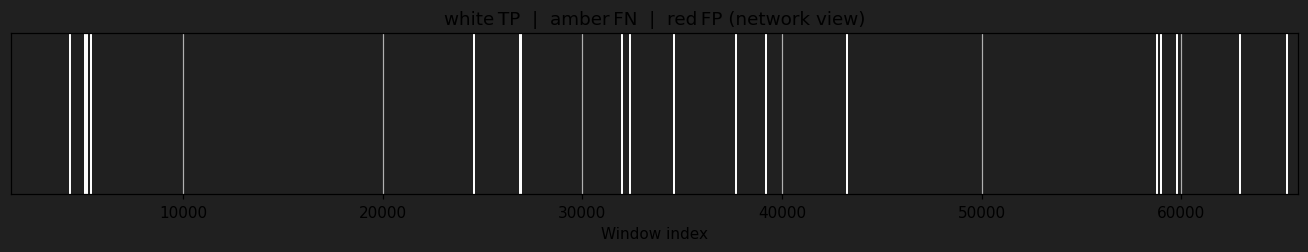


—— Station‑level window metrics ——
KEF: TP=  0 FP=  70 FN=245 P=0.000 R=0.000 F1=0.000
VAL: TP= 20 FP=  52 FN=225 P=0.278 R=0.082 F1=0.126
LER: TP=  2 FP=  50 FN=242 P=0.038 R=0.008 F1=0.014
HER: TP= 18 FP=  79 FN=226 P=0.186 R=0.074 F1=0.106
GIB: TP= 75 FP=  87 FN=172 P=0.463 R=0.304 F1=0.367
AKR: TP=  4 FP=  41 FN=241 P=0.089 R=0.016 F1=0.028
CAM: TP= 50 FP=  38 FN=193 P=0.568 R=0.206 F1=0.302
WAT: TP= 27 FP=  22 FN=219 P=0.551 R=0.110 F1=0.183
CAB: TP= 36 FP=  38 FN=211 P=0.486 R=0.146 F1=0.224
PAY: TP= 33 FP=  58 FN=211 P=0.363 R=0.135 F1=0.197
TAR: TP=  0 FP=  57 FN=247 P=0.000 R=0.000 F1=0.000

—— Network‑level stroke metrics ——

Network‑level metrics: {'TP': 49, 'FP': 0, 'FN': 0, 'TN': 67398, 'P': 1.0, 'R': 1.0, 'F1': 1.0}


In [36]:
# ================================================================
# Graph‑CDAE (v3‑fix)  ·  end‑to‑end cell
# ================================================================
import math, numpy as np, torch, torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torch_geometric.nn import GATv2Conv
from scipy.signal import hilbert, convolve
from typing import Dict, List

# ---------- constants & bookkeeping ---------------------------------
WIN, HOP  = 1024, 512
STN       = list(storm_data.quantised)          # station order
S         = len(STN)
FS        = cfg.fs
BURST_LEN = int(0.04 * FS)
DEVICE    = ('mps' if torch.backends.mps.is_available()
             else 'cuda' if torch.cuda.is_available() else 'cpu')

# ---------- build RAW  (n_win, S, WIN) ------------------------------
def make_windows(sig: np.ndarray, win: int, hop: int) -> np.ndarray:
    n = (len(sig) - win) // hop + 1
    idx = np.arange(0, n*hop, hop)[:, None] + np.arange(win)
    return sig[idx]

win_mats = [make_windows(storm_data.quantised[nm], WIN, HOP)
            for nm in STN]
n_win    = win_mats[0].shape[0]
RAW      = np.stack(win_mats, axis=1).astype(np.float32) / 32768.0  # [-1,1]

# ---------- fully‑connected graph -----------------------------------
edge_src, edge_dst = zip(*[(i, j) for i in range(S) for j in range(S) if i != j])
edge_index = torch.tensor([edge_src, edge_dst], dtype=torch.long, device=DEVICE)

# ---------- dataset -------------------------------------------------
class WinDS(Dataset):
    def __init__(self, arr: np.ndarray, noise_std=0.03):
        self.clean = torch.from_numpy(arr)
        self.noise = noise_std
    def __len__(self):            return len(self.clean)
    def __getitem__(self, i):
        c = self.clean[i]
        n = c + self.noise * torch.randn_like(c)
        return n, c

# ---------- Graph‑conditioned CDAE ----------------------------------
LAT = 32
class _GBlock(nn.Module):
    def __init__(self, h):
        super().__init__()
        self.g  = GATv2Conv(h, h, heads=4, concat=False)
        self.ln = nn.LayerNorm(h)
    def forward(self, x, ei):     # x: (B*S, LAT)
        return self.ln(x + torch.relu(self.g(x, ei)))

class GraphCDAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc = nn.Sequential(
            nn.Conv1d(1,  8, 7, 2, 3), nn.ReLU(),
            nn.Conv1d(8, 16, 7, 2, 3), nn.ReLU(),
            nn.Conv1d(16,32, 7, 2, 3), nn.ReLU())
        self.fc_z  = nn.Linear(32*128, LAT)
        self.g1, self.g2 = _GBlock(LAT), _GBlock(LAT)
        self.dec_fc = nn.Linear(LAT, 32*128)
        self.dec = nn.Sequential(
            nn.ConvTranspose1d(32,16,7,2,3,output_padding=1), nn.ReLU(),
            nn.ConvTranspose1d(16,8,7,2,3,output_padding=1),  nn.ReLU(),
            nn.ConvTranspose1d(8,1,7,2,3,output_padding=1))
    def forward(self, x):                      # x : (B, S, WIN)
        B, S, W = x.shape
        h = self.enc(x.view(B*S, 1, W))
        z = torch.relu(self.fc_z(h.view(B*S, -1)))
        z = self.g2(self.g1(z, edge_index), edge_index)
        h = torch.relu(self.dec_fc(z)).view(B*S, 32, 128)
        return self.dec(h).view(B, S, W)

# ---------- train ----------------------------------------------------
torch.manual_seed(0); np.random.seed(0)
dl = DataLoader(WinDS(RAW, noise_std=0.03),
                batch_size=256, shuffle=True, drop_last=True)
model = GraphCDAE().to(DEVICE)
opt   = torch.optim.AdamW(model.parameters(), lr=2e-3)

with torch.enable_grad():                       # ← **fix**
    model.train()
    for ep in range(1, 4):                      # 3 epochs
        for noisy, clean in dl:
            noisy, clean = noisy.to(DEVICE), clean.to(DEVICE)
            opt.zero_grad()
            out  = model(noisy)
            loss = torch.mean((out - clean)**2)
            loss.backward()
            opt.step()
        print(f"epoch {ep}/3   mse={loss.item():.4e}")

model.eval()
print(f"✔ trained Graph‑CDAE on {DEVICE}  (n_win={n_win:,})")

# ---------- reconstruction error ------------------------------------
err = np.empty((n_win, S), np.float32)
with torch.no_grad():
    for s in range(0, n_win, 256):
        e   = min(n_win, s+256)
        x   = torch.from_numpy(RAW[s:e]).to(DEVICE)
        rec = model(x).cpu().numpy()
        err[s:e] = np.mean(np.abs(rec - x.cpu().numpy()), axis=2)

# ---------- robust z‑score + envelope gate --------------------------
hot: Dict[str, np.ndarray] = {}
for i, nm in enumerate(STN):
    med = np.median(err[:, i])
    mad = np.median(np.abs(err[:, i] - med)) + 1e-9
    mask = (err[:, i] - med) / mad > 2.5            # 2.5 MAD
    env  = np.abs(hilbert(storm_data.quantised[nm].astype(np.float32)))
    pk   = np.max(make_windows(env, WIN, HOP)[:n_win], axis=1)
    mask &= pk > np.percentile(pk, 95)              # 95‑% envelope
    # one‑step majority smoothing
    mask = convolve(mask.astype(int), [1,1,1], mode='same') >= 2
    hot[nm] = mask

# ---------- strict evaluation ---------------------------------------
station_m, net_m, _ = evaluate_windowed_model(
    hot            = hot,
    stroke_records = storm_data.stroke_records,
    quantized      = storm_data.quantised,
    station_order  = STN,
    cfg            = EvalConfig(win=WIN, hop=HOP, fs=FS,
                                burst_len=BURST_LEN, min_stn=2, tol_win=0),
    plot           = True
)

print("\n—— Station‑level window metrics ——")
for nm, m in station_m.items():
    print(f"{nm}: TP={m['TP']:3d} FP={m['FP']:4d} FN={m['FN']:3d} "
          f"P={m['P']:.3f} R={m['R']:.3f} F1={m['F1']:.3f}")

print("\n—— Network‑level stroke metrics ——")
#print(net_m)
print("\nNetwork‑level metrics:", pretty_metrics(net_m, ndigits=3))

epoch 1/3   mse=2.8110e-05
epoch 2/3   mse=1.5162e-05
epoch 3/3   mse=1.3063e-05
✔ trained Graph-CDAE on mps  (n_win=67,688)


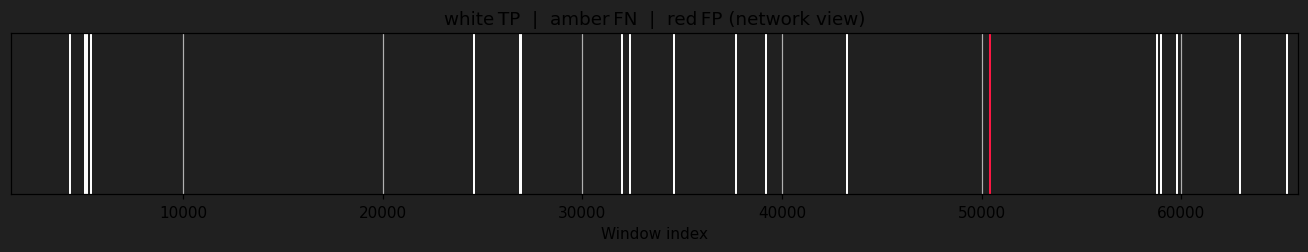


—— Station-level window metrics ——
KEF: TP=  2 FP= 115 FN=243 P=0.017 R=0.008 F1=0.011
VAL: TP= 23 FP=  98 FN=222 P=0.190 R=0.094 F1=0.126
LER: TP=  3 FP=  96 FN=241 P=0.030 R=0.012 F1=0.017
HER: TP= 16 FP= 132 FN=228 P=0.108 R=0.066 F1=0.082
GIB: TP= 79 FP= 130 FN=168 P=0.378 R=0.320 F1=0.346
AKR: TP=  3 FP=  63 FN=242 P=0.045 R=0.012 F1=0.019
CAM: TP= 41 FP=  65 FN=202 P=0.387 R=0.169 F1=0.235
WAT: TP= 25 FP=  67 FN=221 P=0.272 R=0.102 F1=0.148
CAB: TP= 22 FP=  43 FN=225 P=0.338 R=0.089 F1=0.141
PAY: TP= 36 FP=  95 FN=208 P=0.275 R=0.148 F1=0.192
TAR: TP=  0 FP=  98 FN=247 P=0.000 R=0.000 F1=0.000

—— Network-level stroke metrics ——

Network-level metrics: {'TP': 49, 'FP': 1, 'FN': 0, 'TN': 67397, 'P': 0.98, 'R': 1.0, 'F1': 0.99}


In [40]:
# ================================================================
# Graph-CDAE (v3-fix)  ·  end-to-end cell  — with correct batched graph

#########################use this
# fixed....
# ================================================================
import math, numpy as np, torch, torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torch_geometric.nn import GATv2Conv
from scipy.signal import hilbert, convolve
from typing import Dict, List, Tuple

# ---------- constants & bookkeeping ---------------------------------
WIN, HOP  = 1024, 512
STN       = list(storm_data.quantised)          # station order
S         = len(STN)
FS        = cfg.fs
BURST_LEN = int(0.04 * FS)
DEVICE    = ('mps' if torch.backends.mps.is_available()
             else 'cuda' if torch.cuda.is_available() else 'cpu')

# ---------- build RAW  (n_win, S, WIN) ------------------------------
def make_windows(sig: np.ndarray, win: int, hop: int) -> np.ndarray:
    n = (len(sig) - win) // hop + 1
    idx = np.arange(0, n*hop, hop)[:, None] + np.arange(win)
    return sig[idx]

win_mats = [make_windows(storm_data.quantised[nm], WIN, HOP) for nm in STN]
n_win    = min(w.shape[0] for w in win_mats)                          # <- safe min
win_mats = [w[:n_win] for w in win_mats]
RAW      = np.stack(win_mats, axis=1).astype(np.float32) / 32768.0    # [-1,1]

# ---------- fully-connected base graph (S nodes, CPU) ----------------
edge_src, edge_dst = zip(*[(i, j) for i in range(S) for j in range(S) if i != j])
BASE_EDGE_INDEX = torch.tensor([edge_src, edge_dst], dtype=torch.long)  # [2,E] on CPU

def batch_graph(ei: torch.Tensor, B: int, S: int, device=None) -> torch.Tensor:
    """
    Tile an S-node graph B times (block-diagonal) for (B*S) nodes.
    Returns [2, B*E] edge_index on the requested device.
    """
    if device is None: device = ei.device
    ei = ei.to(device)                         # [2,E]
    ei_b = ei.unsqueeze(0).repeat(B, 1, 1)     # [B,2,E]
    offsets = (torch.arange(B, device=device) * S).view(B, 1, 1)
    ei_b = ei_b + offsets                      # add batch offsets to both rows
    ei_b = ei_b.permute(1, 0, 2).reshape(2, -1)
    return ei_b

# ---------- dataset -------------------------------------------------
class WinDS(Dataset):
    def __init__(self, arr: np.ndarray, noise_std=0.03):
        self.clean = torch.from_numpy(arr)
        self.noise = noise_std
    def __len__(self):            return len(self.clean)
    def __getitem__(self, i):
        c = self.clean[i]
        n = c + self.noise * torch.randn_like(c)
        return n, c

# ---------- Graph-conditioned CDAE ----------------------------------
LAT = 32
class _GBlock(nn.Module):
    def __init__(self, h):
        super().__init__()
        self.g  = GATv2Conv(h, h, heads=4, concat=False)
        self.ln = nn.LayerNorm(h)
    def forward(self, x, ei):     # x: (B*S, LAT)
        return self.ln(x + torch.relu(self.g(x, ei)))

class GraphCDAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc = nn.Sequential(
            nn.Conv1d(1,  8, 7, 2, 3), nn.ReLU(),
            nn.Conv1d(8, 16, 7, 2, 3), nn.ReLU(),
            nn.Conv1d(16,32, 7, 2, 3), nn.ReLU())
        self.fc_z  = nn.Linear(32*128, LAT)
        self.g1, self.g2 = _GBlock(LAT), _GBlock(LAT)
        self.dec_fc = nn.Linear(LAT, 32*128)
        self.dec = nn.Sequential(
            nn.ConvTranspose1d(32,16,7,2,3,output_padding=1), nn.ReLU(),
            nn.ConvTranspose1d(16,8,7,2,3,output_padding=1),  nn.ReLU(),
            nn.ConvTranspose1d(8,1,7,2,3,output_padding=1))
    def forward(self, x):                      # x : (B, S, WIN)
        B, S, W = x.shape
        h = self.enc(x.view(B*S, 1, W))
        z = torch.relu(self.fc_z(h.view(B*S, -1)))           # (B*S, LAT)
        # -------- batched graph FIX: tile the S-node graph B times ------
        ei_b = batch_graph(BASE_EDGE_INDEX, B, S, device=z.device)
        z = self.g2(self.g1(z, ei_b), ei_b)
        h = torch.relu(self.dec_fc(z)).view(B*S, 32, 128)
        return self.dec(h).view(B, S, W)

# ---------- train ----------------------------------------------------
torch.manual_seed(0); np.random.seed(0)
pin_mem = (DEVICE == 'cuda')  # MPS can't pin efficiently
dl = DataLoader(WinDS(RAW, noise_std=0.03),
                batch_size=256, shuffle=True, drop_last=True, pin_memory=pin_mem)
model = GraphCDAE().to(DEVICE)
opt   = torch.optim.AdamW(model.parameters(), lr=2e-3)

with torch.enable_grad():                       # ← keep training enabled
    model.train()
    for ep in range(1, 4):                      # 3 epochs
        for noisy, clean in dl:
            noisy, clean = noisy.to(DEVICE), clean.to(DEVICE)
            opt.zero_grad(set_to_none=True)
            out  = model(noisy)
            loss = torch.mean((out - clean)**2)
            loss.backward()
            opt.step()
        print(f"epoch {ep}/3   mse={loss.item():.4e}")

model.eval()
print(f"✔ trained Graph-CDAE on {DEVICE}  (n_win={n_win:,})")

# ---------- reconstruction error ------------------------------------
err = np.empty((n_win, S), np.float32)
with torch.no_grad():
    for s in range(0, n_win, 256):
        e   = min(n_win, s+256)
        x   = torch.from_numpy(RAW[s:e]).to(DEVICE)
        rec = model(x).cpu().numpy()
        err[s:e] = np.mean(np.abs(rec - x.cpu().numpy()), axis=2)

# ---------- robust z-score + envelope gate (unchanged) --------------
hot: Dict[str, np.ndarray] = {}
for i, nm in enumerate(STN):
    med = np.median(err[:, i])
    mad = np.median(np.abs(err[:, i] - med)) + 1e-9
    mask = (err[:, i] - med) / mad > 3.5            # 2.5 MAD
    #env  = np.abs(hilbert(storm_data.quantised[nm].astype(np.float32)))
    #pk   = np.max(make_windows(env, WIN, HOP)[:n_win], axis=1)
    #mask &= pk > np.percentile(pk, 90)              # 95-% envelope
    # one-step majority smoothing
    mask = convolve(mask.astype(int), [1,1,1], mode='same') >= 2
    hot[nm] = mask

# ---------- strict evaluation ---------------------------------------
station_m, net_m, _ = evaluate_windowed_model(
    hot            = hot,
    stroke_records = storm_data.stroke_records,
    quantized      = storm_data.quantised,
    station_order  = STN,
    cfg            = EvalConfig(win=WIN, hop=HOP, fs=FS,
                                burst_len=BURST_LEN, min_stn=2, tol_win=0),
    plot           = True
)

print("\n—— Station-level window metrics ——")
for nm, m in station_m.items():
    print(f"{nm}: TP={m['TP']:3d} FP={m['FP']:4d} FN={m['FN']:3d} "
          f"P={m['P']:.3f} R={m['R']:.3f} F1={m['F1']:.3f}")

print("\n—— Network-level stroke metrics ——")
print("\nNetwork-level metrics:", pretty_metrics(net_m, ndigits=3))


▶ Fitting One‑Class SVMs (per station) …
KEF: nu≈0.0030  gamma≈0.0322  train flagged≈0.84%  ext_thr=-4.6201e-01
VAL: nu≈0.0030  gamma≈0.0317  train flagged≈1.05%  ext_thr=-7.0844e-01
LER: nu≈0.0030  gamma≈0.034  train flagged≈0.82%  ext_thr=-5.0965e-01
HER: nu≈0.0030  gamma≈0.0318  train flagged≈0.71%  ext_thr=-3.9634e-01
GIB: nu≈0.0030  gamma≈0.032  train flagged≈0.99%  ext_thr=-1.6563e+00
AKR: nu≈0.0030  gamma≈0.0358  train flagged≈0.78%  ext_thr=-3.3289e-01
CAM: nu≈0.0030  gamma≈0.0357  train flagged≈0.78%  ext_thr=-4.0871e-01
WAT: nu≈0.0030  gamma≈0.0354  train flagged≈0.60%  ext_thr=-6.9033e-01
CAB: nu≈0.0030  gamma≈0.0323  train flagged≈0.76%  ext_thr=-5.3626e-01
PAY: nu≈0.0030  gamma≈0.0355  train flagged≈1.01%  ext_thr=-8.8701e-01
TAR: nu≈0.0030  gamma≈0.0346  train flagged≈0.73%  ext_thr=-3.2483e-01

▶ Predicting …


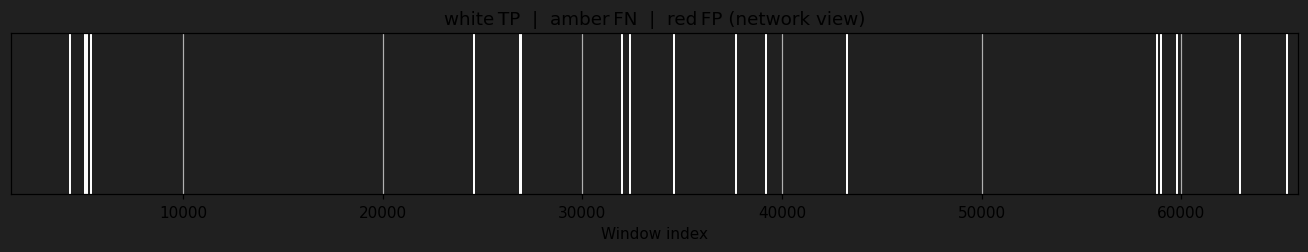


—— Station / window metrics  (n_windows = 67,688) ——
KEF: TP=  0 FP=  65 FN=245 P=0.000 R=0.000 F1=0.000
VAL: TP= 16 FP=  79 FN=229 P=0.168 R=0.065 F1=0.094
LER: TP=  5 FP=  66 FN=239 P=0.070 R=0.020 F1=0.032
HER: TP= 10 FP=  54 FN=234 P=0.156 R=0.041 F1=0.065
GIB: TP= 76 FP=  37 FN=171 P=0.673 R=0.308 F1=0.422
AKR: TP=  2 FP=  48 FN=243 P=0.040 R=0.008 F1=0.014
CAM: TP= 52 FP=  41 FN=191 P=0.559 R=0.214 F1=0.310
WAT: TP= 43 FP=  34 FN=203 P=0.558 R=0.175 F1=0.266
CAB: TP= 41 FP=  56 FN=206 P=0.423 R=0.166 F1=0.238
PAY: TP= 50 FP=  78 FN=194 P=0.391 R=0.205 F1=0.269
TAR: TP=  0 FP=  62 FN=247 P=0.000 R=0.000 F1=0.000

—— Network / stroke metrics ——

Network‑level metrics: {'TP': 49, 'FP': 0, 'FN': 0, 'TN': 67398, 'P': 1.0, 'R': 1.0, 'F1': 1.0}


In [10]:
# ===================================== One‑Class SVM (per‑station) ======================================
# Unsupervised OC‑SVM with RobustScaler, median‑heuristic gamma, tiny (nu,gamma) grid via stability,
# and extreme‑tail rescue. Evaluates with your strict metrics.
# ========================================================================================================

from typing import Dict, Tuple
import os, math, numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.svm import OneClassSVM
from scipy.signal import convolve

# ----------------------------- configuration -------------------------------------------------------------
WIN, HOP   = 1024, 512
FS         = cfg.fs
STN        = list(storm_data.quantised)
MIN_STN    = 2
BURST_LEN  = int(0.04 * FS)

BASE_NU    = 0.0015               # target outlier fraction (≈ contamination)
NU_GRID    = [max(1e-4, 0.5*BASE_NU), BASE_NU, min(0.02, 2.0*BASE_NU)]
GAM_FACT   = [0.5, 1.0, 2.0]      # gamma multipliers around median heuristic
EXTREME_Q  = 99.95                # “rescue” tail (lower score = more anomalous)
TRAIN_MAX  = 3000                 # subsample for OC‑SVM training (keeps it fast)
ANCHORS    = 64                   # for fast median‑heuristic
SEED       = 42
rng        = np.random.default_rng(SEED)

# ----------------------------- feature extractor ---------------------------------------------------------
# Uses the same features you already use with IF
fx = FeatureExtractor(["iso16"])

def _median_sqdist_fast(X: np.ndarray, anchors:int=ANCHORS, subsample:int=4000) -> float:
    """
    Approximate median of squared L2 distances using a small anchor set.
    O(n*k) instead of O(n^2). Robust and fast for gamma heuristic.
    """
    n = X.shape[0]
    m = min(n, subsample)
    idx = rng.choice(n, m, replace=False) if m < n else np.arange(n)
    Xa  = X[idx]
    k = min(anchors, m)
    aidx = rng.choice(m, k, replace=False) if k < m else np.arange(m)
    A = Xa[aidx]            # (k,d)
    # squared distances to anchors: (m,k)
    Xa2 = np.sum(Xa*Xa, axis=1, keepdims=True)
    A2  = np.sum(A*A, axis=1, keepdims=True).T
    D2  = Xa2 + A2 - 2.0 * Xa @ A.T
    D2  = D2[D2 > 1e-12]    # drop zeros
    if D2.size == 0: return 1.0
    return float(np.median(D2))

def _fit_ocsvm_stable(Xs: np.ndarray, nu_grid, gam_grid) -> Tuple[OneClassSVM, float, float]:
    """
    Unsupervised hyperparam pick: split Xs in halves A/B, for each (nu,gamma)
    train on A and check flagged fraction on B (and vice versa).
    Choose params minimizing |p_B - nu| + |p_A - nu|.
    Returns (model_fitted_on_all, best_nu, best_gamma).
    """
    n = Xs.shape[0]
    idx = rng.permutation(n)
    mid = n // 2
    A, B = Xs[idx[:mid]], Xs[idx[mid:]]
    best = (1e9, None, None)   # (objective, nu, gamma)

    for nu in nu_grid:
        for gam in gam_grid:
            try:
                mA = OneClassSVM(kernel='rbf', gamma=gam, nu=nu, tol=1e-3, cache_size=256).fit(A)
                sB = mA.decision_function(B)          # >0 inlier, <0 outlier
                pB = float((sB < 0).mean())
                mB = OneClassSVM(kernel='rbf', gamma=gam, nu=nu, tol=1e-3, cache_size=256).fit(B)
                sA = mB.decision_function(A)
                pA = float((sA < 0).mean())
                obj = abs(pB - nu) + abs(pA - nu)
            except Exception as e:
                # on numeric failure, skip
                continue
            if obj < best[0]:
                best = (obj, nu, gam)

    # train final on all data
    if best[1] is None:
        # fallback: gamma=median heuristic, nu=BASE_NU
        med2 = _median_sqdist_fast(Xs)
        gam0 = 1.0 / max(med2, 1e-6)
        best_nu, best_gam = BASE_NU, gam0
    else:
        best_nu, best_gam = best[1], best[2]

    model = OneClassSVM(kernel='rbf', gamma=best_gam, nu=best_nu, tol=1e-3, cache_size=512).fit(Xs)
    return model, best_nu, best_gam

# ----------------------------- wrapper class -------------------------------------------------------------
class ExtendedOCSVM:
    """
    One‑Class SVM (+RobustScaler) per station, with median‑heuristic gamma,
    tiny unsupervised grid on (nu,gamma) via stability, and extreme‑tail rescue.
    """
    def __init__(self, win:int=WIN, hop:int=HOP, extreme_q:float=EXTREME_Q,
                 train_max:int=TRAIN_MAX, nu_grid=NU_GRID, gam_factors=GAM_FACT):
        self.win=win; self.hop=hop; self.extreme_q=extreme_q
        self.train_max=train_max
        self.nu_grid=nu_grid
        self.gam_factors=gam_factors
        self.mods : Dict[str, tuple] = {}   # nm → (scaler, ocsvm, thr_ext, (nu,gamma))

    def fit(self, raw:Dict[str,np.ndarray], fs:int, verbose=True):
        feats,_ = fx.transform(raw, win=self.win, hop=self.hop, fs=fs)
        for nm, X in feats.items():
            # scale
            scaler = RobustScaler().fit(X)
            Xs_all = scaler.transform(X)

            # subsample for training the OC‑SVM
            n = Xs_all.shape[0]
            m = min(self.train_max, n)
            idx = rng.choice(n, m, replace=False) if m < n else np.arange(n)
            Xs = Xs_all[idx]

            # gamma median heuristic + tiny grid
            med2   = _median_sqdist_fast(Xs)
            gam0   = 1.0 / max(med2, 1e-6)
            gam_grid = [max(1e-6, f*gam0) for f in self.gam_factors]

            oc, nu_hat, gam_hat = _fit_ocsvm_stable(Xs, self.nu_grid, gam_grid)

            # station‑specific extreme tail on full (for robust rescue)
            scores_all = oc.decision_function(Xs_all)       # >0 normal, <0 anomalous
            thr_ext    = np.percentile(scores_all, 100 - self.extreme_q)

            self.mods[nm] = (scaler, oc, float(thr_ext), (nu_hat, gam_hat))

            if verbose:
                flagged = (scores_all < 0).mean()
                print(f"{nm}: nu≈{nu_hat:.4f}  gamma≈{gam_hat:.3g}  "
                      f"train flagged≈{flagged:.2%}  ext_thr={thr_ext:.4e}")

    def predict(self, raw:Dict[str,np.ndarray], fs:int, smooth=True) -> Dict[str, np.ndarray]:
        feats,_ = fx.transform(raw, win=self.win, hop=self.hop, fs=fs)
        out = {}
        for nm, X in feats.items():
            scaler, oc, thr_ext, _ = self.mods[nm]
            Xs = scaler.transform(X)
            s  = oc.decision_function(Xs)             # higher = more normal
            mask = (s < 0.0) | (s < thr_ext)          # main + rescue
            if smooth:
                mask = convolve(mask.astype(int), [1,1,1], mode='same') >= 2
            out[nm] = mask
        return out

# ========================================= run it ========================================================
model_oc = ExtendedOCSVM()

print("▶ Fitting One‑Class SVMs (per station) …")
model_oc.fit(storm_data.quantised, fs=FS)

print("\n▶ Predicting …")
hot_oc = model_oc.predict(storm_data.quantised, fs=FS, smooth=True)

# ================================== strict evaluation ====================================================
eval_cfg = EvalConfig(win=WIN, hop=HOP, fs=FS,
                      burst_len=BURST_LEN, min_stn=MIN_STN, tol_win=0)

station_m_oc, net_m_oc, n_win_oc = evaluate_windowed_model(
    hot            = hot_oc,
    stroke_records = storm_data.stroke_records,
    quantized      = storm_data.quantised,
    station_order  = STN,
    cfg            = eval_cfg,
    plot           = True
)

# ========================================= summary =======================================================
print(f"\n—— Station / window metrics  (n_windows = {n_win_oc:,}) ——")
for nm, m in station_m_oc.items():
    print(f"{nm}: TP={m['TP']:3d} FP={m['FP']:4d} FN={m['FN']:3d} "
          f"P={m['P']:.3f} R={m['R']:.3f} F1={m['F1']:.3f}")

print("\n—— Network / stroke metrics ——")
print("\nNetwork‑level metrics:", pretty_metrics(net_m_oc, ndigits=3))
